In [3]:
SRC_DIR = '../../src'
DATA_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/data'
EXP_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/experiments'

import numpy as np
import os
import sys
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load project packages
src_path = os.path.abspath(os.path.join(SRC_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from pipeline import train_pipeline
from helper import date_util as du
from helper.multidata_wrapper import MultidataWrapper


ModuleNotFoundError: No module named 'src'

In [2]:
# === Load data ===

# Load grid data
file_str = os.path.join(DATA_DIR, 'processed/grid/grid_ds_era_4_modis_alaska_2007-01-01_2016-12-31_interpolate_0roff_%dk.nc')
in_files = {k: file_str % k for k in range(1,6)}

start_date = dt.date(2007,1,1)
end_date = dt.date(2016,12,31)
forecast_horizon = 5

params = {'covariates': ('temperature', 'humidity', 'rain', 'wind', 'vpd'),
 'active_model_type': '',
 'ignition_covariates_exclude': (),
 'memory_type': 'decay',
 'memory_covariates': ('temperature', 'humidity', 'rain', 'wind', 'vpd'),
 'memory_log_covariates': ('num_det',),
 'memory_length': 10,
 'decay_method': 'fixed',
 'decay_values': {'default': .05, 'num_det': .05, 'temperature': .25, 'humidity': .5, 'rain': .25},
 'active_check_days': 2,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'forecast_method': 'separate',
 'fill_method': 'integrate_interp',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': forecast_horizon,
 'normalize_params': False,
 'rain_offset': 0,
 'exposure': False,
 'use_era': True,
 'filter_mask': 'no_ocean',
 'large_fire_split_percent': .9}

X_grid_dict_nw, y_grid_dict, _, _, _ = train_pipeline.setup_data(in_files, start_date, end_date, forecast_horizon, params)

# Load Modis
modis_df = pd.read_pickle(os.path.join(DATA_DIR, 'interim/modis/fire/fire_modis_alaska_2007-2016.pkl'))
modis_df = modis_df.assign(datetime_local=list(map(lambda x: du.utc_to_local_time(x[0], x[1], du.round_to_nearest_quarter_hour), zip(modis_df.datetime_utc, modis_df.lon))))

large [ 145.]
large [ 145.]
large [ 145.]
large [ 145.]
large [ 145.]
380 300


In [2]:
# === Load data ===
reload(train_pipeline)
# Load grid data
file_str = os.path.join(DATA_DIR, 'processed/grid/grid_ds_era_4_modis_alaska_2007-01-01_2016-12-31_interpolate_0roff_%dk.nc')
in_files = {k: file_str % k for k in range(1,6)}

start_date = dt.date(2007,1,1)
end_date = dt.date(2016,12,31)
forecast_horizon = 5

params = {'covariates': ('temperature', 'humidity', 'rain', 'wind', 'vpd'),
 'ignition_covariates_exclude': (),
 'active_model_type': '',
 'memory_type': 'decay',
 'memory_covariates': ('temperature', 'humidity', 'rain', 'wind', 'vpd'),
 'memory_log_covariates': ('num_det',),
 'memory_length': 10,
 'decay_method': 'fixed',
 'decay_values': {'default': .05, 'num_det': .05, 'temperature': .25, 'humidity': .5, 'rain': .25},
 'active_check_days': 2,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'forecast_method': 'separate',
 'fill_method': 'integrate_interp',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': forecast_horizon,
 'normalize_params': False,
 'rain_offset': 0,
 'exposure': False,
 'use_era': True,
 'filter_mask': 'no_ocean',
 'large_fire_split_percent': .9}

X_grid_dict_nw_ocean, y_grid_dict, _, _, _ = train_pipeline.setup_data(in_files, start_date, end_date, forecast_horizon, params)

# Load Modis
modis_df = pd.read_pickle(os.path.join(DATA_DIR, 'interim/modis/fire/fire_modis_alaska_2007-2016.pkl'))
modis_df = modis_df.assign(datetime_local=list(map(lambda x: du.utc_to_local_time(x[0], x[1], du.round_to_nearest_quarter_hour), zip(modis_df.datetime_utc, modis_df.lon))))

NameError: name 'reload' is not defined

In [9]:
land_cover_src = os.path.join(DATA_DIR, 'raw/land_mcd12c1/land_cover.pkl')
land_cover = load.load_pickle(land_cover_src)

In [60]:
temp = X_grid_dict_nw[1][0].temperature_1.values
humid = X_grid_dict_nw[1][0].humidity_1.values
det = X_grid_dict_nw[1][0].num_det.values
rain = X_grid_dict_nw[1][0].rain_1.values

In [486]:
from matplotlib import gridspec
import xarray as xr
from tabulate import tabulate


from visualization import mapping as vmap
from helper.geometry import get_default_bounding_box
import helper.loaders as load

In [1257]:
X_grid_dict_nw[1][0]

<xarray.Dataset>
Dimensions:            (time: 1100, x: 55, y: 33)
Coordinates:
  * time               (time) datetime64[ns] 2007-05-14 2007-05-15 ...
Dimensions without coordinates: x, y
Data variables:
    num_det            (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    num_det_target     (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    active             (y, x, time) bool False False False False False False ...
    temperature        (y, x, time) float32 264.687 267.243 269.273 269.217 ...
    humidity           (y, x, time) float32 85.8478 88.3131 90.076 94.0556 ...
    wind               (y, x, time) float32 4.78804 5.8777 1.64065 4.53513 ...
    rain               (y, x, time) float32 2.05111e-05 0.0 0.0 0.0 ...
    in_filled          (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    interpolated       (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    vpd                (y, x, time) float64 0.04567 0.04596 0.04553 0.02716 ...
   

7094
1438306
0.0468519909842
11.1088119369
0.00735047220362
1438306
7094


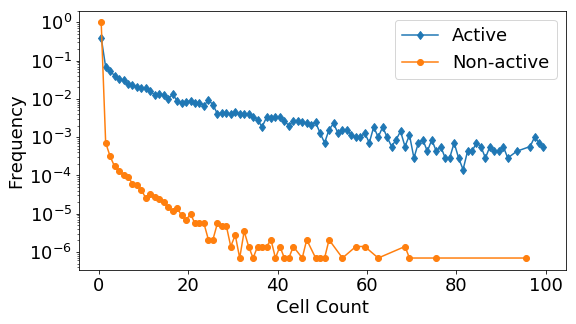

In [1273]:
plt.rcParams['figure.figsize'] = [8,4.5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

BINS = 100

fig = plt.figure()

ocean = X_grid_dict_nw[1][0].filter_mask.values.flatten()
values_flat = X_grid_dict_nw[1][0].num_det_target.values.flatten()[ocean]
ign = (X_grid_dict_nw[1][0].num_det.values.flatten()==0)[ocean]


# Plot a KDE of the unconditional cell counts
#ax = fig.add_subplot(311)
#ax.set_title("Distribution of Cell Counts")
#sb.distplot(values_flat, kde=False, bins=BINS)


#_ = plt.xlabel('Cell Count')
#_ = plt.ylabel('Probability')

# Plot a KDE of the active cell counts
#ax = fig.add_subplot(211)
#ax.set_title("Distribution of Active Cell Counts")




#_ = plt.xlabel('Cell Count')
#_ = plt.ylabel('Probability')

# Plot a KDE of the active cell counts
#ax = fig.add_subplot(212)
#ax.set_title("Distribution of Inactive Cell Counts")




#values_shift = np.concatenate([np.zeros(values.shape[:-1]+(1,)), values[:,:,:-1]], axis=2)
values_active_flat = values_flat[~ign]


#plt.hist(values_active_flat, alpha=.5, bins=BINS, normed=True, label='Active')
print(values_active_flat.size)
y,binEdges=np.histogram(values_active_flat,bins=BINS, density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'d-', label='Active')

values_inactive_flat = values_flat[ign]

#plt.hist(values_inactive_flat, alpha=.5, bins=BINS//2, normed=True, label='Ignition')
print(values_inactive_flat.size)
y,binEdges=np.histogram(values_inactive_flat,bins=BINS,density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'o-', label='Non-active')

_ = plt.xlabel('Cell Count')
_ = plt.ylabel('Frequency')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

map(lambda x: x.set_yscale('log'), fig.get_axes())
plt.legend()

print( np.mean(values))
print( np.mean(values_active))
print( np.mean(values_inactive))

print(len(values_inactive_flat))
print(len(values_active_flat))

1445400
0.0468519909842
11.1088119369
0.00735047220362
1438306
7104


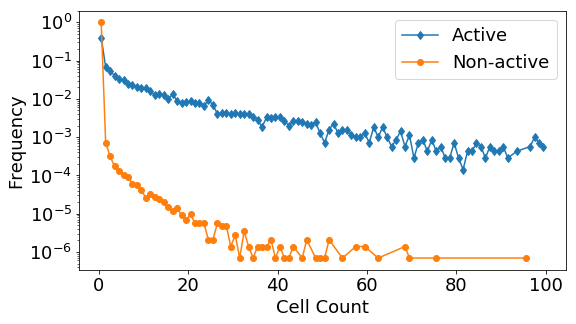

In [1265]:
plt.rcParams['figure.figsize'] = [8,4.5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

BINS = 100

fig = plt.figure()

ocean = X_grid_dict_nw[1][0].filter_mask.values.flatten()
values_flat = X_grid_dict_nw[1][0].num_det_target.values.flatten()[ocean]
ign = X_grid_dict_nw[1][0].num_det.values.flatten()[ocean]==0

print(values_flat.size)

# Plot a KDE of the unconditional cell counts
#ax = fig.add_subplot(311)
#ax.set_title("Distribution of Cell Counts")
#sb.distplot(values_flat, kde=False, bins=BINS)


#_ = plt.xlabel('Cell Count')
#_ = plt.ylabel('Probability')

# Plot a KDE of the active cell counts
#ax = fig.add_subplot(211)
#ax.set_title("Distribution of Active Cell Counts")




#_ = plt.xlabel('Cell Count')
#_ = plt.ylabel('Probability')

# Plot a KDE of the active cell counts
#ax = fig.add_subplot(212)
#ax.set_title("Distribution of Inactive Cell Counts")




values_shift = np.concatenate([np.zeros(values.shape[:-1]+(1,)), values[:,:,:-1]], axis=2)
values_active = values[values_shift!=0]

values_active_flat = values_active.flatten()

#plt.hist(values_active_flat, alpha=.5, bins=BINS, normed=True, label='Active')
y,binEdges=np.histogram(values_active_flat,bins=BINS, density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'d-', label='Active')

values_inactive_flat = values_flat[ign]

#plt.hist(values_inactive_flat, alpha=.5, bins=BINS//2, normed=True, label='Ignition')

y,binEdges=np.histogram(values_inactive_flat,bins=BINS,density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'o-', label='Non-active')

_ = plt.xlabel('Cell Count')
_ = plt.ylabel('Frequency')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

map(lambda x: x.set_yscale('log'), fig.get_axes())
plt.legend()

print( np.mean(values))
print( np.mean(values_active))
print( np.mean(values_inactive))

print(len(values_inactive_flat))
print(len(values_active_flat))

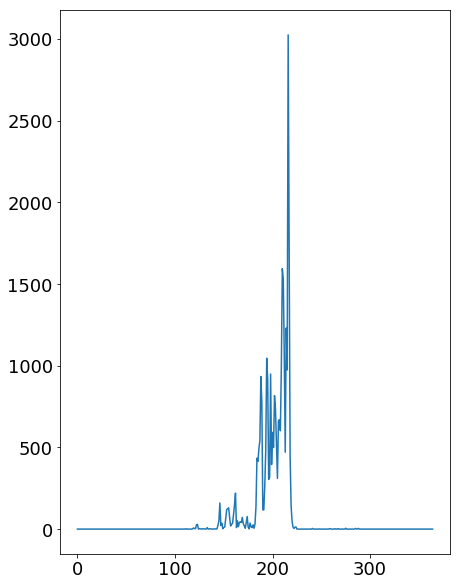

In [687]:
num = []
for d in range(0, 365):
    sel_df = modis_df[(modis_df.datetime_utc.dt.year==2009) & (modis_df.datetime_utc.dt.dayofyear==d)]
    num.append(len(sel_df))
    
plt.plot(num)

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/_

Text(0.5,1,'MODIS Active Fire Detections (08/04/2009)')

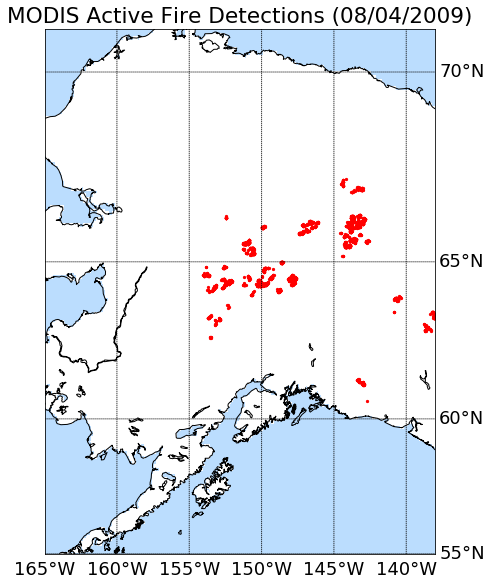

In [5]:
plt.rcParams['figure.figsize'] = [7,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

ALASKA_BB = get_default_bounding_box()


mp = vmap.make_map(ALASKA_BB, (5,0,5,0))
_ = mp.drawlsmask(land_color='w', ocean_color=(30./256,144./256,255./256,.3))

sel_df = modis_df[(modis_df.datetime_utc.dt.year==2009) & (modis_df.datetime_utc.dt.dayofyear==216)]

_ = mp.scatter(list(sel_df.lon), list(sel_df.lat), 5, latlon=True, marker='o', color='r')

plt.title('MODIS Active Fire Detections (08/04/2009)')

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/_

Text(0.5,1,'MODIS Active Fire Detections (08/05/2009)')

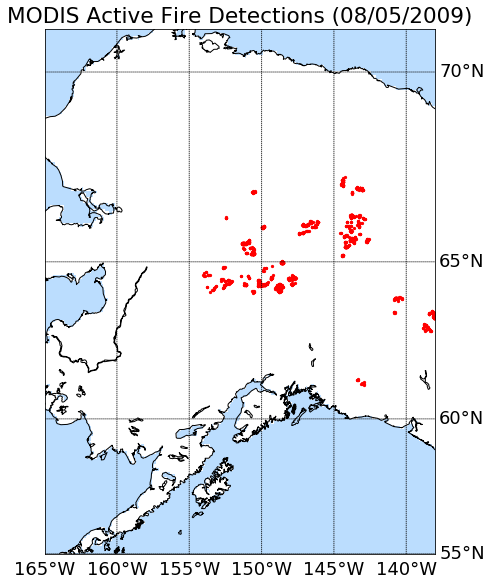

In [696]:
plt.rcParams['figure.figsize'] = [7,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

ALASKA_BB = get_default_bounding_box()


mp = vmap.make_map(ALASKA_BB, (5,0,5,0))
_ = mp.drawlsmask(land_color='w', ocean_color=(30./256,144./256,255./256,.3))

sel_df = modis_df[(modis_df.datetime_utc.dt.year==2009) & (modis_df.datetime_utc.dt.dayofyear==217)]

_ = mp.scatter(list(sel_df.lon), list(sel_df.lat), 5, latlon=True, marker='o', color='r')

plt.title('MODIS Active Fire Detections (08/05/2009)')

In [932]:
alaska_interior_mask_src = os.path.join('/extra/graffc0/fire_prediction/data', 'processed/masks/alaska_interior_mask_05.nc')
alaska_interior_mask = xr.open_dataset(alaska_interior_mask_src)

weather_proc_region_src = os.path.join('/extra/graffc0/fire_prediction/data', 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')
weather_proc_region = load.load_pickle(weather_proc_region_src)

mask = np.zeros(X_grid_dict_nw[1][0].temperature_1.values.shape[0:2], dtype=bool)

lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)
for i in range(alaska_interior_mask.mask_Int_05.shape[0]):
    for j in range(alaska_interior_mask.mask_Int_05.shape[1]):
        lat = alaska_interior_mask.Lat_AK_05.values[i,j] + .25
        lon = alaska_interior_mask.Lon_AK_05.values[i,j] - .25

        if alaska_interior_mask.mask_Int_05[i,j] == 1:
            u = np.where(lats[:,0]==lat)[0][0]
            v = np.where(lons[0,:]==lon)[0][0]
            mask[u,v] = 1

alaska_interior_mask = mask

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


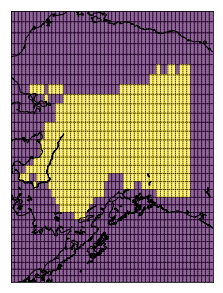

In [38]:
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
#mp.shadedrelief()

values = alaska_interior_mask
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.6)

In [63]:
years = np.arange(2007, 2017)
num_det = [np.sum(det[:,:,y_grid_dict[1].time.dt.year==year]) for year in years] 

#num_det = [num_det[k] for k in keys]

# Add climate
temp_years = []
humid_years = []
for year in years:
    temp_years.append(np.mean(temp[mask][:,110*(year-2007):110*(1+year-2007)])-273.15)
    
    humid_years.append(np.mean(humid[mask][:, 110*(year-2007):110*(1+year-2007)]))
    
temp_a = list(temp_years - np.mean(temp_years))
humid_a = list(humid_years - np.mean(humid_years))

# Add means and std dev
num_det += [np.mean(num_det), np.std(num_det)]
#temp += [np.mean(temp), np.std(temp)]
#humid += [np.mean(humid), np.std(humid)]
temp_a += [np.mean(temp_years), np.std(temp_years)]
humid_a += [np.mean(humid_years), np.std(humid_years)]

# Round values
num_det = list(map(lambda x: round(x), num_det))
temp_a = list(map(lambda x: round(x, 1), temp_a))
humid_a = list(map(lambda x: round(x, 1), humid_a))

headers = ['Year', '# of Detections', 'Temp. Anomaly', 'Humid. Anomaly (%)']
list(years) + ['Mean', 'Std.']

rows = []
for i,year in enumerate(years):
    row = [year, num_det[i], temp_a[i], humid_a[i]]
    rows.append(row)

rows.append(['Mean', num_det[i+1], temp_a[i+1], humid_a[i+1]])
rows.append(['Std. Dev.', num_det[i+2], temp_a[i+2], humid_a[i+2]])

print(tabulate(rows, headers=headers, tablefmt='latex'))

\begin{tabular}{lrrr}
\hline
 Year      &   \# of Detections &   Temp. Anomaly &   Humid. Anomaly (\%) \\
\hline
 2007      &              3973 &             1   &                  1.2 \\
 2008      &               887 &            -1.4 &                  0.7 \\
 2009      &             29310 &             0.1 &                 -3   \\
 2010      &              7386 &             0.3 &                  2.8 \\
 2011      &              1635 &            -0.5 &                  1.1 \\
 2012      &              1334 &            -0.6 &                  1.3 \\
 2013      &              9310 &             0.8 &                 -3.9 \\
 2014      &              1103 &            -0.7 &                 -0.9 \\
 2015      &             34805 &             0.5 &                 -1.7 \\
 2016      &              3710 &             0.5 &                  2.4 \\
 Mean      &              9345 &            13.2 &                 68.2 \\
 Std. Dev. &             11723 &             0.7 &            

In [232]:
get_default_bounding_box().get()

(55.0, 71.0, -165.0, -138.0)

In [233]:
int(np.round(180+(-165) / .05))

-3120

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


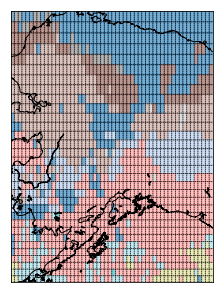

In [252]:

def downsample_land_cover(lc, target_shape, target_bb):
    num_classes = np.max(lc) + 1
    land_cover_ds = np.zeros(target_shape+(num_classes,))
    
    lat_min, lat_max, lon_min, lon_max = target_bb.get()
    
    ul_lat_ind = int(np.round((90 -lat_max) /.05))
    ul_lon_ind = int(np.round((180+lon_min) / .05))
    
    print(ul_lat_ind, ul_lon_ind)
    
    lc = lc[ul_lat_ind:,ul_lon_ind:]
    
    LAND_COVER_RES = .05
    TARGET_RES = .5
    res_ratio = int(TARGET_RES / LAND_COVER_RES)
    print(res_ratio)
    for i in range(target_shape[0]):
        for j in range(target_shape[1]):
            lc_box = lc[i*res_ratio:(i+1)*res_ratio, j*res_ratio:(j+1)*res_ratio]
            
            print(lc_box)
            
            unique, counts = np.unique(lc_box, return_counts=True)
            box_counts = dict(zip(unique, counts))
            
            print(box_counts)
            land_cover_ds[i,j,:] = [box_counts[k] if k in box_counts else 0 for k in range(num_classes)]
    
    return land_cover_ds

In [253]:
lc_down = downsample_land_cover(land_cover, (33,55), get_default_bounding_box())
ocean_frac = lc_down[:,:,0]/100
ocean_mask = ocean_frac!=1

380 300
10
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 

 [7 7 7 7 7 7 7 7 7 7]]
{7: 100}
[[7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]]
{7: 100}
[[7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]]
{7: 100}
[[7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]]
{7: 100}
[[7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7]]
{7: 100}
[[7 7 7

{7: 22, 8: 78}
[[8 8 8 8 8 8 8 8 8 7]
 [8 8 8 8 8 8 8 7 7 7]
 [8 8 8 8 7 7 8 7 7 7]
 [8 8 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 7 7 7]
 [8 8 8 8 8 8 7 8 7 8]
 [7 8 8 8 8 8 7 8 8 8]
 [7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 8 8 8]
 [7 7 7 7 7 8 8 7 7 8]]
{7: 48, 8: 52}
[[ 7  7  7  7  7  7  7  7  7  7]
 [ 8  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  8  7  7  7  7  7  8  8  7]
 [ 7  7  8  8  8  7  7  8  8  8]
 [ 7  8  8  7 10  7  7  7  7  7]
 [ 7  7  8  7  7  7  7 10 10  7]
 [ 8  8  7  7  7  7 10  7  7 10]]
{7: 80, 8: 15, 10: 5}
[[ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  8  8  8  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  8  7  7  7]
 [ 7  7  7  7  8  7  8  8  7  7]
 [ 8  8  8  7  7  7  7  8  8  8]
 [ 8  8  8  8  7  7  7  7  8  8]
 [ 7  7  7  7  8  8  8  8  8  8]
 [10  7  7  8  8  8  8  8  8  8]]
{7: 67, 8: 32, 10: 1}
[[ 7  7  7  7 10  7 10 10  7  7]


 [ 7  7  7  7  8  8  7  7  7 10]]
{7: 31, 8: 68, 10: 1}
[[8 8 8 8 8 8 8 7 7 7]
 [8 8 8 8 8 8 7 7 7 7]
 [8 8 8 8 8 8 7 7 7 7]
 [8 8 8 8 8 8 7 8 8 8]
 [8 8 8 7 7 7 7 8 8 8]
 [8 8 8 8 7 8 8 8 8 8]
 [8 8 8 8 7 7 8 8 8 8]
 [8 8 7 7 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 7 8 8 8 8 8 8]]
{7: 22, 8: 78}
[[ 7  7  8  8  8  7  7  8  8  8]
 [ 7  8  8  8  7  7 10  8  8  8]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8  8  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8  8  1  8]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 8  1  1  1  1  8  8  8  8  8]
 [ 8  8  8  1  8  8  8  8  8  8]]
{1: 6, 7: 9, 8: 84, 10: 1}
[[8 8 8 8 8 8 8 8 8 7]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 1 1 8 8 8 8 1]
 [8 8 8 8 8 8 8 8 1 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 7 8 7]]
{1: 4, 7: 3, 8: 93}
[[7 7 7 8 8 8 8 8 8 7]
 [7 7 7 8 8 8 8 7 7 7]
 [8 8 7 7 7 7 7 7 7 7]
 [8 8 8 7 7 8 8 7 7 

{0: 1, 7: 83, 8: 3, 10: 13}
[[ 7  7  8  8  7  7  7  7  7  7]
 [ 7  7  7  8  7  7  7  7  7 10]
 [ 7  7  7  7  8  7  7  7  7  7]
 [ 7  7  7  7  7  8  7  7  7  7]
 [ 7  7  7  7  7  7  8  7  7 10]
 [ 8  8  7  7  7  7  7  7  7  7]
 [ 7  8  8  7  7  7  7  7  7  7]
 [ 8  8  8  8  7  7  7  8  7  7]
 [ 7  7  8  8  7  7  7  7  7  7]
 [ 7  7  8  7  7  7  8  7  7  7]]
{7: 79, 8: 19, 10: 2}
[[ 7  7  7  7  7  7  7  7  7  7]
 [10 10  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]
 [10 10  7  7  7  7  7  7 10 10]
 [ 7  7  7  7  7  7  7  7 10 10]
 [ 7  7  7  7 10  7  7  7  7  7]
 [ 7  7  7  7  7  7 10  7  7  7]
 [ 7  7  7  7  7 10 10  7  7  7]
 [ 7  7  7  7  7  7  7  7  7  7]]
{7: 88, 10: 12}
[[ 7  7  7  7  8  8  8  8  8  8]
 [ 7  7  7  7  7  8  8  7  7  7]
 [ 7  7  7  8  8  8  8  8  8  8]
 [10 10  7  8  8  8  8  8  8  7]
 [10  7  8  8  8  8  7  7 10  7]
 [ 7  7  8  8  8  7 10 10 10 10]
 [ 7  7  7  7  7  7  7  7  8  7]
 [ 7  7  7  7  7  7 10  7  7  7]
 [ 7  7 

 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[ 0  0

 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
{0: 100}
[[0 0 0

In [250]:
ocean_mask.shape

(33, 55)

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


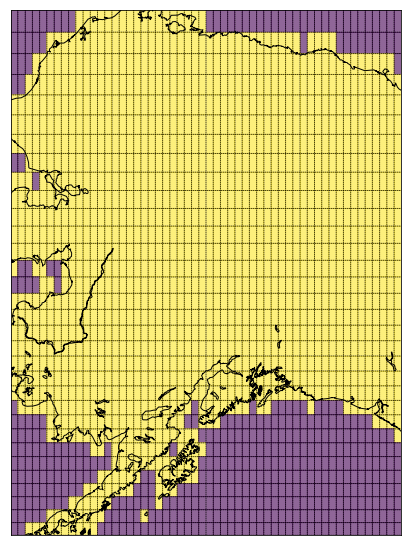

In [255]:
plt.rcParams['figure.figsize'] = [7,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

mp = vmap.make_map(BOUNDING_BOX, (0, .5, 0, .5))
#mp.shadedrelief()

values = ocean_mask
lats, lons = BOUNDING_BOX.make_grid(inclusive_lon=True)


cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.6)

[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.]


In [ ]:
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)
for i in range(land_cover.shape[0]):
    for j in range(land_cover.shape[1]):
        lat = alaska_interior_mask.Lat_AK_05.values[i,j] + .25
        lon = alaska_interior_mask.Lon_AK_05.values[i,j] - .25

        if alaska_interior_mask.mask_Int_05[i,j] == 1:
            u = np.where(lats[:,0]==lat)[0][0]
            v = np.where(lons[0,:]==lon)[0][0]
            mask[u,v] = 1

alaska_interior_mask = mask

In [12]:
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
#mp.shadedrelief()

values = land_cover
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.6)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8)

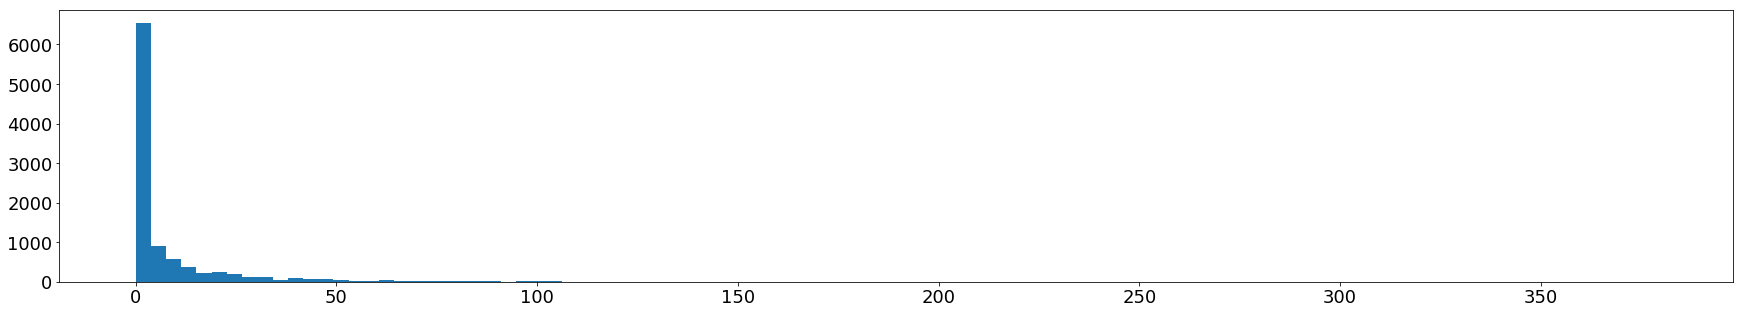

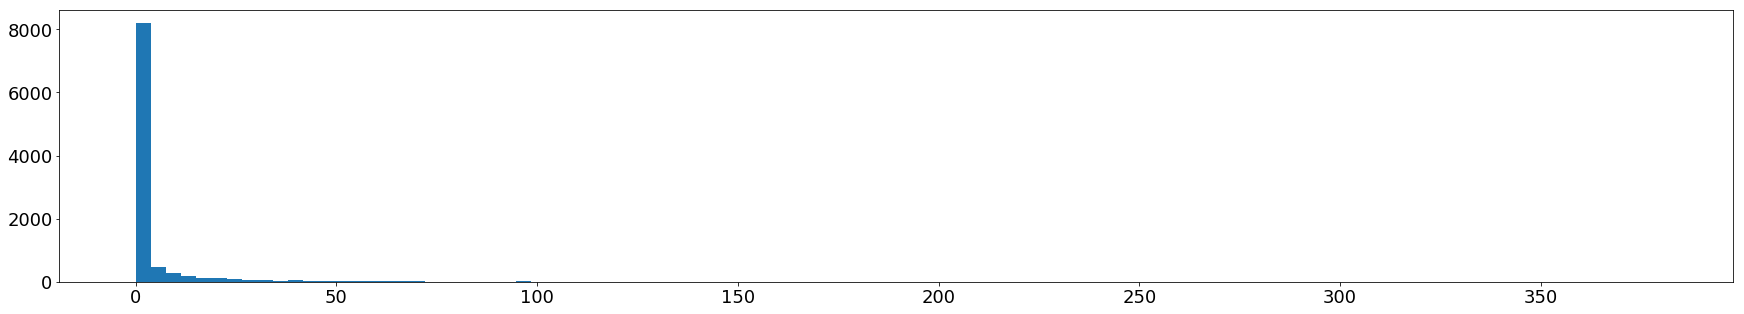

In [636]:
ind = X_grid_dict_nw[1][0].active.values==True
dist1 = X_grid_dict_nw[1][0].num_det_target.values[ind]

ind = X_grid_dict_nw[1][0].active.values==True
dist2 = X_grid_dict_nw[5][0].num_det_target.values[ind]

_ = plt.hist(dist1,bins=100)
plt.show()
_ = plt.hist(dist2,bins=100)

In [65]:
num_det

[3973.0,
 887.0,
 29310.0,
 7386.0,
 1635.0,
 1334.0,
 9310.0,
 1103.0,
 34805.0,
 3710.0,
 9345.0,
 11723.0]

In [944]:
print(X_grid_dict_nw[1][0].num_det.values.shape)
total_year = np.sum(X_grid_dict_nw[1][0].num_det.values[:,:,start_ind:end_ind])
total_month = np.sum(X_grid_dict_nw[1][0].num_det.values[:,:,start_ind-OFF1:end_ind-OFF2])
print(total_year,total_month, total_year/total_month)

(33, 55, 1100)
29668.0 34805.0 0.852406263468


0.532487015744


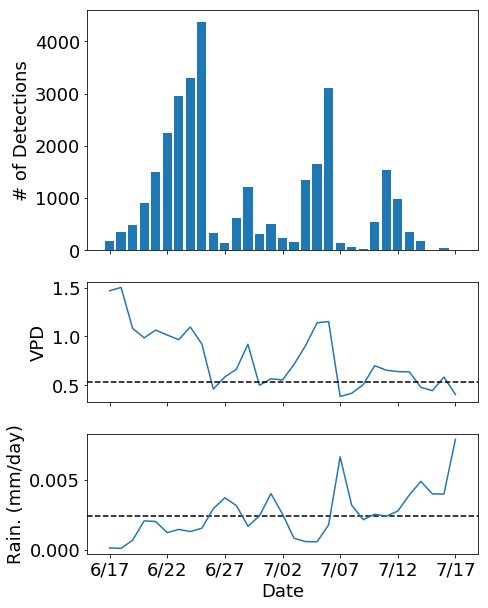

In [938]:
plt.rcParams['figure.figsize'] = [7,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)


YEAR = 2015

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)+OFF1
end_ind = 110*(1+(YEAR-2007))+OFF2

fig = plt.figure()
gs = gridspec.GridSpec(3,1, height_ratios=[2,1,1])

# === Num. of Detections
ax = plt.subplot(gs[0])
num_det = X_grid_dict_nw[1][0].num_det.values
ax.bar(np.arange(start_ind,end_ind), np.sum(num_det, axis=(0,1))[start_ind:end_ind])

#plt.title('Daily Detections vs. Weather Variables')
plt.ylabel('# of Detections')

ticks_pos = np.arange(start_ind,end_ind,5)
months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
plt.setp(ax.get_xticklabels(), visible=False)

# === Temperature
"""
ax = plt.subplot(gs[1], sharex=ax)
plt.plot(np.arange(start_ind,end_ind), np.mean(temp[mask], axis=(0))[start_ind:end_ind]-273.15)

plt.ylabel('Temp. ($\degree$C)')
plt.setp(ax.get_xticklabels(), visible=False)




# === Humidity
ax = plt.subplot(gs[2], sharex=ax)
ax.plot(np.arange(start_ind,end_ind), np.mean(humid[mask], axis=(0))[start_ind:end_ind])

plt.ylabel('Rel. Humid. (%)')
plt.setp(ax.get_xticklabels(), visible=False)
"""

# === VPD
vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask][:,start_ind-OFF1:end_ind-OFF2], axis=(0))[OFF1:OFF2]


mean_vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask])#[:,start_ind:end_ind])
print(mean_vpd)


ax = plt.subplot(gs[1], sharex=ax)
ax.plot(np.arange(start_ind,end_ind), vpd, label='Observed')
plt.axhline(y=mean_vpd, color='black', linestyle='--', label='Mean')
plt.ylabel('VPD')
plt.setp(ax.get_xticklabels(), visible=False)

# === Rain
ax = plt.subplot(gs[2], sharex=ax)
mean_rain = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask])#[:,start_ind:end_ind])
plt.axhline(y=mean_rain, color='black', linestyle='--', label='Mean')
rain = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask][:,start_ind-OFF1:end_ind-OFF2], axis=(0))[OFF1:OFF2]

plt.plot(np.arange(start_ind,end_ind), rain)

plt.ylabel('Rain. (mm/day)')


plt.xlabel('Date')
_ = plt.xticks(ticks_pos, date_strings[start_ind:end_ind:5])
#plt.tight_layout()

In [477]:
import pickle

In [1078]:
%%capture
with open(os.path.join(EXP_DIR, '91455269492246045788535481126337285483.pkl'), 'rb') as fin:
    persistence = pickle.load(fin)

In [1079]:
%%capture
with open(os.path.join(EXP_DIR, '141080293610030773791424963941843642381.pkl'), 'rb') as fin:
    persistence_aug = pickle.load(fin)

In [344]:
%%capture
with open(os.path.join(EXP_DIR, '198109454153346733476145213117816421273.pkl'), 'rb') as fin:
    linear_vpd_active = pickle.load(fin)

In [581]:
%%capture
with open(os.path.join(EXP_DIR, '29580615128848507312233443782752346353.pkl'), 'rb') as fin:
    poisson_ar = pickle.load(fin)

In [308]:
%%capture
with open(os.path.join(EXP_DIR, '165145797120341678742880775724869013454.pkl'), 'rb') as fin:
    poisson_weather_only = pickle.load(fin)

In [582]:
%%capture
with open(os.path.join(EXP_DIR, '292580277933232457361449128119134496409.pkl'), 'rb') as fin:
    poisson_weather = pickle.load(fin)

In [583]:
%%capture
with open(os.path.join(EXP_DIR, '112093329456171467511525516603043040343.pkl'), 'rb') as fin:
    poisson_ar_weather = pickle.load(fin)

In [348]:
%%capture
with open(os.path.join(EXP_DIR, '274324452498160447707462533692333231045.pkl'), 'rb') as fin:
    poisson_ar_weather_in_sample = pickle.load(fin)

In [1095]:
%%capture
with open(os.path.join(EXP_DIR, '77714774083669969022381709249055889243.pkl'), 'rb') as fin:
    poisson_all = pickle.load(fin)

In [182]:
%%capture
with open(os.path.join(EXP_DIR, '310601559258543185989114044734556322397.pkl'), 'rb') as fin:
    linear_ar_weather = pickle.load(fin)

In [1096]:
%%capture
with open(os.path.join(EXP_DIR, '206472475638473108620710791014280079384.pkl'), 'rb') as fin:
    hurdle_active_all = pickle.load(fin)

In [288]:
%%capture
with open(os.path.join(EXP_DIR, '126358178646047290788610190719869339242.pkl'), 'rb') as fin:
    hurdle_joint = pickle.load(fin)

In [289]:
%%capture
with open(os.path.join(EXP_DIR, '198800023483458274264846511337969179308.pkl'), 'rb') as fin:
    poisson_separated = pickle.load(fin)

In [290]:
%%capture
with open(os.path.join(EXP_DIR, '228288546025916070238297956471292386650.pkl'), 'rb') as fin:
    hurdle_poisson_separated = pickle.load(fin)

In [291]:
%%capture
with open(os.path.join(EXP_DIR, '71812211663899782680016854689619963225.pkl'), 'rb') as fin:
    poisson_hurdle_separated = pickle.load(fin)

In [856]:
%%capture
with open(os.path.join(EXP_DIR, '200181594781015361570354605167829621782.pkl'), 'rb') as fin:
    loglinear_all = pickle.load(fin)

In [701]:
%%capture
with open(os.path.join(EXP_DIR, '179397934958876054251385263679544438611.pkl'), 'rb') as fin:
    mean_model = pickle.load(fin)

In [519]:
%%capture
with open(os.path.join(EXP_DIR, '141112377290945553580514954065380253495.pkl'), 'rb') as fin:
    hurdle_vpd_ar_seperated = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/141112377290945553580514954065380253495.pkl'

In [41]:
%%capture
with open(os.path.join(EXP_DIR, '139686716257614196254929956881743659984.pkl'), 'rb') as fin:
    hurdle_ig_poisson_vpd_ar_seperated = pickle.load(fin)

In [57]:
%%capture
with open(os.path.join(EXP_DIR, '284796333561657568494107997665046793139.pkl'), 'rb') as fin:
    hurdle_vpd_ar_seperated_in_sample = pickle.load(fin)

In [80]:
%%capture
with open(os.path.join(EXP_DIR, '51628111918315245654247320148785340859.pkl'), 'rb') as fin:
    hurdle_ig_mean_vpd_ar_seperated = pickle.load(fin)

In [141]:
%%capture
with open(os.path.join(EXP_DIR, '253118166310511793903589956242495685776.pkl'), 'rb') as fin:
    mlp_64_vpd_ar_active = pickle.load(fin)

In [149]:
%%capture
with open(os.path.join(EXP_DIR, '283499202975987306111042531303376932908.pkl'), 'rb') as fin:
    mlp_64_weather_ar_active = pickle.load(fin)

In [155]:
%%capture
with open(os.path.join(EXP_DIR, '73588572023458868112639764762014512153.pkl'), 'rb') as fin:
    mlp_64_weather_ar_active_es = pickle.load(fin)

In [158]:
%%capture
with open(os.path.join(EXP_DIR, '168793600878772482568661941306758420646.pkl'), 'rb') as fin:
    mlp_32_16_weather_ar_active = pickle.load(fin)

In [160]:
%%capture
with open(os.path.join(EXP_DIR, '29035426733305614120988178644447326969.pkl'), 'rb') as fin:
    mlp_16_8_weather_ar_active = pickle.load(fin)

In [167]:
%%capture
with open(os.path.join(EXP_DIR, '249658527627901202510391620481536250169.pkl'), 'rb') as fin:
    mlp_32_vpd_rain_ar_active = pickle.load(fin)

In [964]:
hurdle_poisson_temp_humid_rain_wind_seperated = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.4430719458209891, 1.3960247296906152, 1.4202408479427024, 1.4500942285234015, 1.4654065546093615, 1.4835933683388645]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.071124818701884238, 0.060566888503226682, 0.067450832656915927, 0.072883125586415701, 0.076096616752508062, 0.078626630010354873])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.457878761082545, 1.4085017277349616, 1.4346007603186137, 1.4652501084631231, 1.4813423645191217, 1.4996988443769046]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.071620060068073421, 0.060499590629041679, 0.067750312101236984, 0.073612439044325892, 0.076888577483964007, 0.079349381081798578]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [17.508258623109427, 19.437211857401724, 18.337194418996315, 17.178571791433587, 16.555723793461294, 16.032591254254211], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [7.8079188464516367, 9.8655650459523478, 8.5981377773021812, 7.5239975715206162, 6.8235943441227178, 6.2282994933603195], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.73523843959664692, 0.32509982693634054, 0.6228353109665502, 0.82637323387389516, 0.91408550065149874, 0.98779832555494973], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.032957492413230788, 0.011498250712617931, 0.025119243730941293, 0.03637874019262316, 0.043171553962445784, 0.048619673467525777], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [28.786376403245423, 26.840023326888346, 28.130299645088293, 28.827493045677073, 29.794941940663421, 30.339124057909981], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [14.704903966717458, 13.903819689884942, 14.57546127034534, 14.824477612337672, 15.13539401360876, 15.085367247410574], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.571937322873687, 9.4114745109369853, 15.257629460819139, 18.445977941018931, 19.402207655631596, 20.342397045961789], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.2398467874324854, 4.795375574113196, 7.4664608578600067, 8.9862205208098391, 9.6818358996781058, 10.269341084701276], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.10169478376575283, 0.025357759656394498, 0.076124859307072662, 0.1186747731612922, 0.13457252062694572, 0.15374400607705913], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.016939282832357311, 0.0058180148038601293, 0.012884039567965931, 0.018751406831392987, 0.022194870812514089, 0.025048082146053422], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [6.4247463732046644, 7.9791787372570253, 6.9460024475219795, 6.237885605124962, 5.7272389338198346, 5.2334261422995203], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [4.3458739726859354, 6.1625970397666165, 4.8151211981525002, 4.0340703106804234, 3.5553284622956212, 3.1622528525345173], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}

In [263]:
hurdle_poisson_temp_humid_rain_wind_ar_seperated = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.3921882727850035, 1.2676493518049738, 1.3690193180672627, 1.4210100593324138, 1.4402489588710421, 1.4630136758493242]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.067991449639420984, 0.052839149225218464, 0.064479348010699267, 0.071042440388041431, 0.074334186723917506, 0.077262123849228231])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.4085857411185763, 1.2788224524276035, 1.3856902323427882, 1.4393438846032929, 1.4570228473725533, 1.4820492888466434]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.068623823330341838, 0.052991433081127685, 0.064965413409082615, 0.071787285909259951, 0.075235394291371549, 0.078139589960867381]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [16.730782091774966, 17.542079272103923, 17.564534373193993, 16.732342998896289, 16.115880671659625, 15.699073143021012], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [7.2053819158632866, 8.3556902932921684, 8.0381004849083393, 7.1569630999090927, 6.491142667651034, 5.9850130335558003], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.73523843959664692, 0.32509982693634054, 0.6228353109665502, 0.82637323387389516, 0.91408550065149874, 0.98779832555494973], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.032957492413230788, 0.011498250712617931, 0.025119243730941293, 0.03637874019262316, 0.043171553962445784, 0.048619673467525777], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [27.610451618083726, 24.356490928989295, 26.933582268966116, 28.089142763970258, 29.022656799035872, 29.650385329457094], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [14.48097861341299, 13.275674156064346, 14.462689404651222, 14.765202823600717, 14.969644999853614, 14.931681682895046], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.571937322873687, 9.4114745109369853, 15.257629460819139, 18.445977941018931, 19.402207655631596, 20.342397045961789], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.2398467874324854, 4.795375574113196, 7.4664608578600067, 8.9862205208098391, 9.6818358996781058, 10.269341084701276], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.10169478376575283, 0.025357759656394498, 0.076124859307072662, 0.1186747731612922, 0.13457252062694572, 0.15374400607705913], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.016939282832357311, 0.0058180148038601293, 0.012884039567965931, 0.018751406831392987, 0.022194870812514089, 0.025048082146053422], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [6.0571127316372833, 6.7761341640340769, 6.6825067367135507, 6.0526728387362274, 5.5354673993475387, 5.2387825193550199], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [3.4762808667008955, 3.8442009393039318, 3.9720119712289614, 3.5199141565156418, 3.1573279700883585, 2.8879492963675832], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}

In [970]:
hurdle_poisson_temp_humid_rain_wind_ar_mem_seperated = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.3803100285548, 1.2621816947726587, 1.3472868537202978, 1.4050791204164239, 1.4289535034086824, 1.458048970455937]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.066932690789679769, 0.05259746883211075, 0.063051466767670816, 0.069707351923794306, 0.073073599426804844, 0.076233566998018143])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.4054192330738453, 1.3042886555812903, 1.3655215368825295, 1.4253848966134974, 1.4495764569794496, 1.4823246193124602]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.067854226035711063, 0.053098911230564524, 0.063635960713400067, 0.07068710875830371, 0.074291320370625774, 0.077557829105661294]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [16.608031601584063, 17.541258952405837, 17.252438636200317, 16.532943804410269, 16.025905619680138, 15.687610995223755], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [7.0899333285617887, 8.3348282239445872, 7.8172886341507706, 7.0229946143832898, 6.3786876467126863, 5.8958675236176088], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.75152660183899067, 0.41466191808461123, 0.62166126394703725, 0.82210296856250364, 0.9100841628380878, 0.98912269576271306], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.032761009515051905, 0.011710525299108248, 0.024886666078276692, 0.03594257953115023, 0.042784761973586036, 0.04848051469313832], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [27.425966794407241, 24.375193791733246, 26.467404355149064, 27.763667634336365, 28.876591927669072, 29.646976263148481], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [14.434009775532729, 13.295137647036073, 14.287741022340773, 14.645961280020678, 14.980319689574431, 14.960889238691692], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.601038904212444, 9.827329959722757, 15.215556215707178, 18.334550638641691, 19.296643698569934, 20.331114008420652], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.2187951021080998, 4.8572868233345883, 7.4290568288350567, 8.9245491628370672, 9.6391844429539404, 10.24389825257985], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.14969467856965779, 0.23974290573020224, 0.080246860436541445, 0.12289182489279085, 0.14030471447222942, 0.16528708731652514], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.016794560539816837, 0.0059570298338103306, 0.012712579966340745, 0.018435853132915101, 0.021900059667554615, 0.024967280098463412], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [5.9745447920723924, 6.7100727106145381, 6.5320745669831748, 5.959954603893622, 5.4715333473187613, 5.1990887315518677], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [3.3283462681175329, 3.78636144459308, 3.7221733726778874, 3.3789055919980506, 2.9964573654751594, 2.7578335658434878], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}

In [977]:
hurdle_poisson_vpd_ar_active['summary_results']['test']['root_mean_squared_error']

(['Avg.', 1, 2, 3, 4, 5],
 [1.4041362041059595,
  1.2743086279630915,
  1.3804198148893538,
  1.4378210678935501,
  1.4519492933992471,
  1.476182216384555])

In [978]:
hurdle_poisson_temp_humid_rain_wind_ar_seperated['test']['root_mean_squared_error']

(['Avg.', 1, 2, 3, 4, 5],
 [1.4085857411185763,
  1.2788224524276035,
  1.3856902323427882,
  1.4393438846032929,
  1.4570228473725533,
  1.4820492888466434])

In [1301]:
p_vpd = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6791562936206237, 1.669404890631818, 1.6496482533356422, 1.6868939110938381, 1.6707649343079949, 1.7190694787338257]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.05929449478643041, 0.05263587336271551, 0.057729812529017578, 0.060502886044449644, 0.061486514379056972, 0.064117387616912352])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6791562936206244, 1.6694048906318188, 1.6496482533356431, 1.6868939110938372, 1.6707649343079947, 1.7190694787338272]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.059294494786430382, 0.052635873362715489, 0.057729812529017654, 0.060502886044449644, 0.061486514379056931, 0.064117387616912241]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [21.13526323451579, 23.222655289752552, 21.679980590193733, 20.89317177685577, 19.876005230779263, 20.004503284997622], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [8.645030100836852, 9.4347825512350383, 9.1163951162554131, 8.5598319890958656, 8.0627342826135315, 8.0514065649844149], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.7333040757127034, 0.32511717534932794, 0.62127407772608678, 0.82357571081962411, 0.91164382752251272, 0.98490958714596566], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.016386821116979401, 0.0057480926943498647, 0.012458647358364057, 0.01802703350293873, 0.021499849992852007, 0.024200482036392339], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [32.834497802155923, 32.255860033129579, 31.180347024677712, 33.31559425724155, 33.165997108762888, 34.254690586967882], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [17.700560325113777, 16.358095481060523, 17.162183636204524, 18.086238809205454, 18.20629887973001, 18.68998481936837], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.687416759396218, 9.4394909721468974, 15.332960010388062, 18.574313490380323, 19.561423297126538, 20.528896026939272], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.3907605840069355, 4.8382852292020377, 7.5786568537258514, 9.1572343149807942, 9.8843300880853029, 10.495296434040691], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.010710623272590144, 0.0052167786071629805, 0.0077784884776003534, 0.010068693937956459, 0.011884992884243597, 0.018604162455987332], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [2.834781784485013e-05, 1.0079547791167896e-05, 1.8151464898848442e-05, 2.6731670018212843e-05, 3.5313263964630236e-05, 5.1463142551391242e-05], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [10.868212946179264, 8.93040412272547, 12.33639248454034, 10.705603800611758, 10.856903880937328, 11.511760442081428], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [3.9118467528669782, 3.086295757695511, 4.0242579082349916, 4.005820927703593, 4.0742038305899051, 4.368655340110891], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}
p_param_vpd = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6169484564139254, 1.5695380117139317, 1.5685821946826515, 1.6411836113495053, 1.6843619353896437, 1.621076528933894]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.058182776810849379, 0.049171876186810258, 0.055512737073801673, 0.060501692843572805, 0.064557045155425222, 0.061170532794636953])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6155660020399683, 1.5580348156160742, 1.5681938932370163, 1.6446396984778209, 1.6864037742467806, 1.62055782862215]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.058195614576031299, 0.048525904610289758, 0.055685126541690867, 0.060694214370763534, 0.064675478433885297, 0.061397348923527002]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [20.13180962125524, 21.610392108963936, 20.428223979052976, 20.20435120134708, 20.13985280978908, 18.27622800712313], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [8.4240475927726131, 8.6082764458545018, 8.705213047994139, 8.5983077146685556, 8.7040282728900049, 7.504412482455856], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.7333040757127034, 0.32511717534932794, 0.62127407772608678, 0.82357571081962411, 0.91164382752251272, 0.98490958714596566], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.016386821116979401, 0.0057480926943498647, 0.012458647358364057, 0.01802703350293873, 0.021499849992852007, 0.024200482036392339], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [33.487469283208632, 31.219124534889261, 32.142430898727781, 33.939523872186598, 35.53238687540285, 34.603880234836694], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [18.992706724854905, 17.078785994640139, 18.426187698138389, 19.523965642186973, 20.501627268544237, 19.432967020764792], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.687416759396218, 9.4394909721468974, 15.332960010388062, 18.574313490380323, 19.561423297126538, 20.528896026939272], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.3907605840069355, 4.8382852292020377, 7.5786568537258514, 9.1572343149807942, 9.8843300880853029, 10.495296434040691], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.010710623272590144, 0.0052167786071629805, 0.0077784884776003534, 0.010068693937956459, 0.011884992884243597, 0.018604162455987332], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [2.834781784485013e-05, 1.0079547791167896e-05, 1.8151464898848442e-05, 2.6731670018212843e-05, 3.5313263964630236e-05, 5.1463142551391242e-05], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [5.5921811798668468, 1.2374259586769514, 5.2498442378226438, 7.2600685431484822, 8.2860891212182803, 5.9274780384678758], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [2.8419078216839546, 0.84105307316035571, 2.5528593549423189, 3.375397545655364, 4.0651183113655653, 3.3751108232961675], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}
p_param_vpd_int = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6770506674086412, 1.5955624034626836, 1.6280673307633962, 1.7051839959597552, 1.7490626686713311, 1.7073769381860404]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.065590801759775663, 0.053094805348824936, 0.06179878685185853, 0.06791389872304715, 0.072074637231906269, 0.073071880643241452])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6742784600651355, 1.5863156349785483, 1.6269881216669781, 1.7070823251472309, 1.7481330662395762, 1.702873152293344]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.065414673842059096, 0.052786379313533464, 0.061887914124899995, 0.067892009665969449, 0.071897435474776242, 0.072609630631116293]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [21.093861523246794, 22.020255209854138, 21.33284410712044, 21.220359416143904, 21.171885726013997, 19.723963157101487], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [9.8757852866308387, 9.4650489826218323, 9.9525806356126942, 10.045769268544316, 10.156348703202136, 9.7591788431732134], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.7333040757127034, 0.32511717534932794, 0.62127407772608678, 0.82357571081962411, 0.91164382752251272, 0.98490958714596566], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.016386821116979401, 0.0057480926943498647, 0.012458647358364057, 0.01802703350293873, 0.021499849992852007, 0.024200482036392339], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [34.962247716932055, 31.783300994510611, 33.472547378884101, 35.510831019695864, 37.212899870921085, 36.831659320648598], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [21.384698579836943, 18.08650797919103, 20.539218198615664, 22.065239658144858, 23.234550186093447, 22.997976877139699], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.687416759396218, 9.4394909721468974, 15.332960010388062, 18.574313490380323, 19.561423297126538, 20.528896026939272], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.3907605840069355, 4.8382852292020377, 7.5786568537258514, 9.1572343149807942, 9.8843300880853029, 10.495296434040691], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.010710623272590144, 0.0052167786071629805, 0.0077784884776003534, 0.010068693937956459, 0.011884992884243597, 0.018604162455987332], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [2.834781784485013e-05, 1.0079547791167896e-05, 1.8151464898848442e-05, 2.6731670018212843e-05, 3.5313263964630236e-05, 5.1463142551391242e-05], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [6.3693027527223407, 1.7939752554279595, 5.8319771970972596, 7.9214007789147578, 8.9436770652075257, 7.355483466964202], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [3.8603882389647568, 1.5594091342520422, 3.2523534411331814, 4.2999721238357642, 5.0138956362555378, 5.1763108593472555], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}
poisson_vpd = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.4466272315895616, 1.4007717977158676, 1.4234462818729448, 1.4541251564687692, 1.4686291184233899, 1.486163803466837]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.055614118316193215, 0.05543139455655411, 0.055783379515749604, 0.055827409763722878, 0.055599820940546357, 0.05542858680439313])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.455264605858521, 1.4078270290507202, 1.4314944143820749, 1.4631622686888395, 1.4782089298283241, 1.4956303873426458]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.055384584343563525, 0.055075518292561347, 0.05546237653722557, 0.055661944512543089, 0.055467878056892704, 0.05525520431859493]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [17.482781848807235, 19.427321657078153, 18.298933492229406, 17.169665428394328, 16.526315378531731, 15.991673287802561], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [7.8587553023695209, 9.9253900353645044, 8.6604184887762692, 7.5863287892115467, 6.8523991277786402, 6.2692400707166431], [0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763, 0.0049727022289005763]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.7333040757127034, 0.32511717534932794, 0.62127407772608678, 0.82357571081962411, 0.91164382752251272, 0.98490958714596566], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.016386821116979401, 0.0057480926943498647, 0.012458647358364057, 0.01802703350293873, 0.021499849992852007, 0.024200482036392339], [0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944, 0.99502729777109944]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [28.740820732801222, 26.777427000459131, 28.075657192414816, 28.803277853337779, 29.76642154725673, 30.281320070537657], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [14.723664769830052, 13.874495073889848, 14.585976336117163, 14.876009254990084, 15.169480252927558, 15.112362931225604], [0.002378662659654395, 0.0019273729025795141, 0.0016083145504633108, 0.0014034560480841473, 0.0012787377911344855]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [16.687416759396218, 9.4394909721468974, 15.332960010388062, 18.574313490380323, 19.561423297126538, 20.528896026939272], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.3907605840069355, 4.8382852292020377, 7.5786568537258514, 9.1572343149807942, 9.8843300880853029, 10.495296434040691], [0.0011800651139494114, 0.0016333583771600301, 0.0019559228650137743, 0.0021607813673929378, 0.0022895066366140746]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.010710623272590144, 0.0052167786071629805, 0.0077784884776003534, 0.010068693937956459, 0.011884992884243597, 0.018604162455987332], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [2.834781784485013e-05, 1.0079547791167896e-05, 1.8151464898848442e-05, 2.6731670018212843e-05, 3.5313263964630236e-05, 5.1463142551391242e-05], [0.99384723265715003, 0.99339393939393938, 0.99307137490608566, 0.99286651640370649, 0.99273779113448535]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [6.4296325526937341, 8.124533513864229, 6.9211151562535997, 6.2550925552353549, 5.6669017047815951, 5.1805198333338911], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [4.4211950595968066, 6.304169755782179, 4.9101641143407813, 4.1015641657762529, 3.5820565354874154, 3.2080207265974066], [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908])}}

In [1287]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [1285]:

def plot_active_ignition(results_dict, measurements, scale=False, markers=None, sample='test', label=None,
                         baseline=None, colors=None,
                         min_y=None, y_labels=None, col_len=2, marker_size=10, legend_func=None, rescale=False,
                         skill_score=True):
    axs = []
    num_plots = len(measurements)
    gs = gridspec.GridSpec(int(np.ceil(num_plots/col_len)), 4)
    fig = plt.figure()
    
    ax = None
    for i, (name,meas,share,use_baseline) in enumerate(measurements):            
        row = i//col_len
        col = int(np.remainder(i,col_len))
        col_ind1 = col*col_len
        col_ind2 = (col+1)*col_len
    
        if (i == len(measurements)-1) and (np.remainder(i,2)==0) and col_len > 1:
            col_ind1 = col*col_len + 1
            col_ind2 = (col+1)*col_len + 1
        if scale and share:
            ax = fig.add_subplot(gs[row, col_ind1:col_ind2], sharey=ax)
        else:
            ax = fig.add_subplot(gs[row, col_ind1:col_ind2])
        
        
        axs.append(ax)
        
        if colors:
            all_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
            all_colors[:len(colors)] = colors
            plt.gca().set_color_cycle(all_colors)
    
        if i == len(measurements)-1:
            plt.xlabel('Forecast Horizon')
        plt.title(name)
        if y_labels:
            plt.ylabel(y_labels[i])
        elif np.remainder(i,col_len)==0:
            if label:
                plt.ylabel(label)
            elif scale:
                plt.ylabel('MSE')
            else:
                plt.ylabel('RMSE')
                
        for j,(k,v) in enumerate(results_dict.items()):
            marker = '-'
            if markers is not None:
                marker += markers[j]
                
            results = v[sample][meas][1][1:]  
            if scale:                
                try:
                    scale_factor = v[sample][meas][2] 
                except:
                    scale_factor = [1] * len(results)
                    
                if rescale:
                    scale_factor = list(np.array(scale_factor) / np.array(rescale))
                #results = np.sqrt(np.array(results)**2 * scale[name])
                results = np.array(results)**2 * np.array(scale_factor)
            else:
                results = np.array(results)**2
            
            if baseline is not None and use_baseline:
                if k == baseline:
                    # Skip color for baseline
                    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
                    plt.gca().set_color_cycle(colors[1:])
                    continue
                baseline_results = results_dict[baseline][sample][meas][1][1:]  
                if scale:                
                    try:
                        scale_factor = results_dict[baseline][sample][meas][2] 
                    except:
                        scale_factor = [1] * len(baseline_results)
                    baseline_results = np.array(baseline_results)**2 * np.array(scale_factor)
                else:
                    baseline_results = np.array(baseline_results)**2
                
                print('B', baseline_results)
                print('R', results)
            
                if skill_score:
                    results = ((baseline_results - results) / baseline_results) * 100
                else:
                    results = baseline_results - results
                #results = 100 - results
                #plt.ylabel('100 - MSE SS %')
                
            x = range(1,len(results)+1)
            plt.plot(x, results, marker, label=k, markersize=marker_size)
            print(results,k)
            plt.xticks(x)
            
        if min_y is not None:
            y_min,y_max = plt.ylim()
            plt.ylim(min_y, y_max)
            
        
            
        if 'MSE SS' in y_labels[i]:
            ticks, _ = plt.yticks()
            ticks = list(map(int, ticks[1:-1]))
            plt.yticks(ticks,list(map(lambda x: str(x)+'%', ticks)))
            
        if (i==(col_len-1)) or (len(measurements)==1):
        #if (i==(col_len)) or (len(measurements)==1):
            #_ = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            #
            if legend_func:
                legend_func()
            else:
                _ = plt.legend()
                
    gs.tight_layout(fig)
    
    return axs
    

In [497]:
hurdle_active_all['summary_results']

defaultdict(dict,
            {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3832180722046836,
                1.2587955224160334,
                1.3497031202066059,
                1.4127605682055087,
                1.4345827678960208,
                1.460248382299248]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.051287644204597069,
                0.04676459151959976,
                0.051096414402932201,
                0.052744672191305506,
                0.052765649525840577,
                0.053066893383307313])},
             'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.4019614874296225,
                1.2782239643332851,
                1.3693868351934246,
                1.4314226525605307,
                1.4515414081875624,
                1.4792325768733088]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.051657793701414725,
  

In [536]:
a = persistence_aug['summary_results']['test']['root_mean_squared_error_extinction_target'][1][1:]
a_ = persistence_aug['summary_results']['test']['root_mean_squared_error_extinction_target'][2]
b = hurdle_poisson_vpd_ar_active['summary_results']['test']['root_mean_squared_error_extinction_target'][1][1:]
b_ = hurdle_poisson_vpd_ar_active['summary_results']['test']['root_mean_squared_error_extinction_target'][2]
print(a,b)
print(a_,b_)

[8.93040412272547, 12.33639248454034, 10.705603800611758, 10.856903880937328, 11.511760442081428] [6.8166090257607745, 6.5649900131859891, 5.9343031723842339, 5.3685828242980493, 5.1122101228275403]
[0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908] [0.0025940395692461808, 0.003045329326321062, 0.0033643876784372651, 0.0035692461808164285, 0.0036939644377660908]


In [516]:
a[0]**2,b[0]**2,a[4]**2,b[4]**2

(79.752117795192078,
 45.373979300600141,
 132.52062847587081,
 27.537264479295917)

In [537]:
[(b**2/a**2) for a,b,c in zip(a,b,a_)]

[0.58263228481795259,
 0.28319904426259124,
 0.30726785328137074,
 0.24451602633288591,
 0.19721225774822634]

[ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636] Persistence
[ 539.29171871  470.02155839  436.5246269   395.05558393  400.18015168] Persistence Aug (VPD)
[ 305.40475825  305.9698101   280.01381885  257.64564389  244.11089577] Hurdle (VPD + AR)
B [ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636]
R [ 539.29171871  470.02155839  436.5246269   395.05558393  400.18015168]
[-19.80841226  16.425377    26.94456392  34.32511795  32.45297161] Persistence Aug (VPD)
B [ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636]
R [ 305.40475825  305.9698101   280.01381885  257.64564389  244.11089577]
[ 32.15163906  45.59544967  53.13773752  57.16843917  58.79614334] Hurdle (VPD + AR)


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


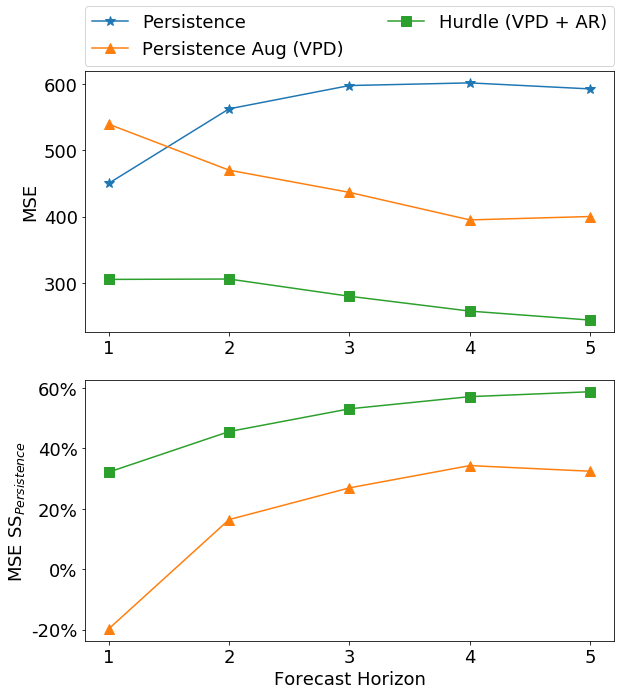

In [1218]:
plt.rcParams['figure.figsize'] = [32,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {'Persistence': persistence['summary_results'],
                'Persistence Aug (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Hurdle (VPD + AR)': hurdle_poisson_vpd_ar_active['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
}
measurements = [('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error_active', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_active_all['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS$_{Persistence}$'], col_len=1, legend_func=legend_func)

In [549]:
persistence['summary_results']['test']['root_mean_squared_error_active_target']

(['Avg.', 1, 2, 3, 4, 5],
 [32.594718874299687,
  30.412291894036414,
  32.028256127615826,
  32.978853135555894,
  33.535617392673394,
  34.018575821616913],
 [0.002144252441773103,
  0.002147257700976709,
  0.002149261207112447,
  0.0021507638367142499,
  0.0021517655897821189])

In [550]:
persistence_aug['summary_results']['test']['root_mean_squared_error_active_target']

(['Avg.', 1, 2, 3, 4, 5],
 [32.834497802155923,
  32.255860033129579,
  31.180347024677712,
  33.31559425724155,
  33.165997108762888,
  34.254690586967882],
 [0.002378662659654395,
  0.0019273729025795141,
  0.0016083145504633108,
  0.0014034560480841473,
  0.0012787377911344855])

In [551]:
hurdle_poisson_vpd_active['summary_results']['test']['root_mean_squared_error_active_target']

(['Avg.', 1, 2, 3, 4, 5],
 [28.740820732801218,
  26.777427000459131,
  28.075657192414809,
  28.803277853337775,
  29.76642154725673,
  30.281320070537657],
 [0.002378662659654395,
  0.0019273729025795141,
  0.0016083145504633108,
  0.0014034560480841473,
  0.0012787377911344855])

[ 312.27506231  339.59894003  316.89987363  298.67254401  276.95369332] AR-only
[ 377.42082677  334.85096695  294.79741092  273.11909999  255.73361454] VPD-only
[ 305.40475825  305.9698101   280.01381885  257.64564389  244.11089577] VPD + AR


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


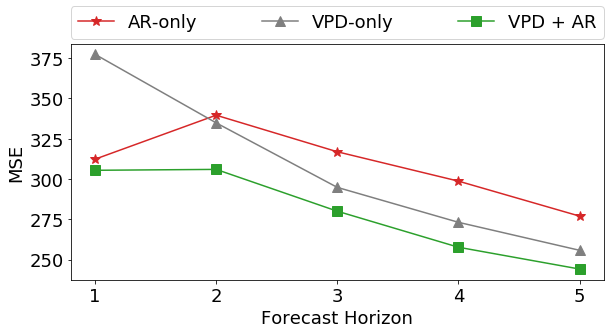

In [1297]:
plt.rcParams['figure.figsize'] = [32,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                #'Persistence Aug (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],    
                'AR-only': hurdle_poisson_ar_active['summary_results'],
                'VPD-only': hurdle_poisson_vpd_active['summary_results'],
                'VPD + AR': hurdle_poisson_vpd_ar_active['summary_results'],
}
measurements = [('','root_mean_squared_error_active', False, False),
                #('','root_mean_squared_error_extinction_target', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_active_all['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     colors=['#d62728', '#7f7f7f'],
                     y_labels = ['MSE', 'MSE SS$_{Persistence}$'], col_len=1, legend_func=legend_func)

In [ ]:
hurdle_poisson_vpd_ar_active['summary_results']['test'][]

[  850.09496736  1019.75675676  1161.11180318  1346.96930764  1402.6737172 ] Persistence
[ 1040.44050648   972.21404058  1109.92882071  1099.98336422  1173.38382721] Mod. Persistence (VPD)
[ 587.78905127  721.31647191  792.09954208  839.58695572  873.79146775] Poisson Hurdle (VPD + AR)
[  83.37014868  272.93717105  328.10778621  308.42043222  311.97084746] Persistence
[  79.7521178   152.18657953  114.60995274  117.87236188  132.52062848] Mod. Persistence (VPD)
[ 46.46615861  43.09909387  35.21595414  28.82168154  26.13469234] Poisson Hurdle (VPD + AR)


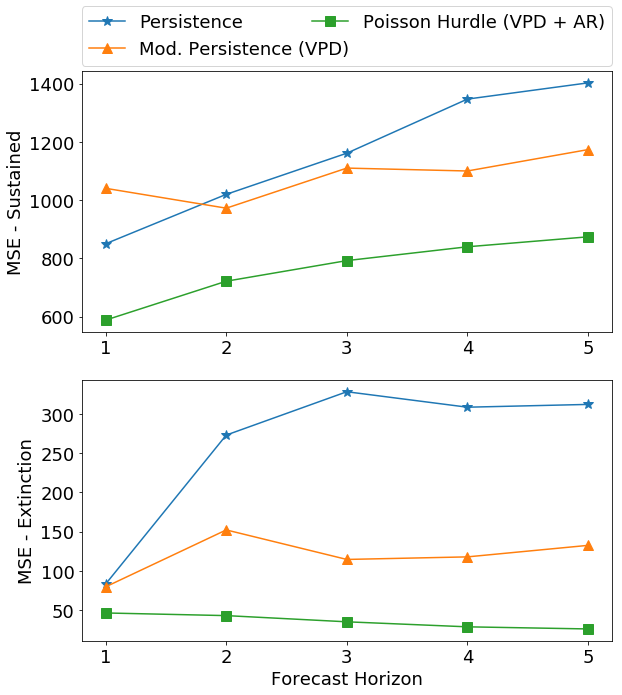

In [1303]:
plt.rcParams['figure.figsize'] = [32,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {'Persistence': persistence['summary_results'],
                'Mod. Persistence (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Poisson Hurdle (VPD + AR)': hurdle_poisson_vpd_ar_active['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
}
measurements = [('','root_mean_squared_error_active_target', False, False),
                ('','root_mean_squared_error_extinction_target', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_active_all['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE - Sustained', 'MSE - Extinction'], col_len=1, legend_func=legend_func)

In [1299]:
hurdle_vpd_ar_seperated_in_sample['models'][0][0].afm.model.fit_result_inflated.params

NameError: name 'hurdle_vpd_ar_seperated_in_sample' is not defined

In [78]:
def print_afm_igm_coeff(models, ks):
    for k in ks:
        print('k=', k)
        model = models[k-1][0]
        
        afm = model.afm.model
        
        print('afm')
        print(afm.fit_result_positive.params)
        print(afm.fit_result_inflated.params)
        
        
        igm = model.igm.model
        
        print('igm')
        print(igm.fit_result_positive.params)
        print(igm.fit_result_inflated.params)

In [79]:
print_afm_igm_coeff(hurdle_vpd_ar_seperated_in_sample['models'], [1,5])

k= 1
afm
Intercept    2.183428
vpd          0.165285
num_det      0.625756
dtype: float64
Intercept    0.061667
vpd         -0.447273
num_det     -1.106788
dtype: float64
igm
Intercept    0.999723
vpd          0.173210
dtype: float64
Intercept    7.151376
vpd         -0.668256
dtype: float64
k= 5
afm
Intercept    2.349245
vpd          0.354210
num_det      0.258101
dtype: float64
Intercept    1.299546
vpd         -0.960849
num_det     -0.489082
dtype: float64
igm
Intercept    1.70142
vpd          0.23096
dtype: float64
Intercept    6.599795
vpd         -0.734293
dtype: float64


In [95]:
import math
1 / (1 + math.exp(-(1.5-1.4)))

0.52497918747894

In [90]:
print_afm_igm_coeff(hurdle_vpd_ar_seperated['models'], [1,5])

k= 1
afm
Intercept    1.525788
vpd          0.346773
num_det      0.398424
dtype: float64
Intercept    1.538801
vpd         -0.951828
num_det     -0.712025
dtype: float64
igm
Intercept    0.848184
vpd          0.571297
dtype: float64
Intercept    7.896150
vpd         -2.300662
dtype: float64
k= 5
afm
Intercept    1.720676
vpd          0.801348
num_det      0.160988
dtype: float64
Intercept    3.089773
vpd         -2.333160
num_det     -0.320725
dtype: float64
igm
Intercept    1.496237
vpd          0.771152
dtype: float64
Intercept    7.390095
vpd         -2.523134
dtype: float64


[ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636] Persistence
[ 539.29171871  470.02155839  436.5246269   395.05558393  400.18015168] Mod. Persistence (VPD)
[ 377.42082677  334.85096695  294.79741092  273.11909999  255.73361454] Poisson Hurdle (VPD + AR)
B [ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636]
R [ 539.29171871  470.02155839  436.5246269   395.05558393  400.18015168]
[-19.80841226  16.425377    26.94456392  34.32511795  32.45297161] Mod. Persistence (VPD)
B [ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636]
R [ 377.42082677  334.85096695  294.79741092  273.11909999  255.73361454]
[ 16.15263421  40.46008566  50.66360044  54.59609886  56.83432662] Poisson Hurdle (VPD + AR)


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


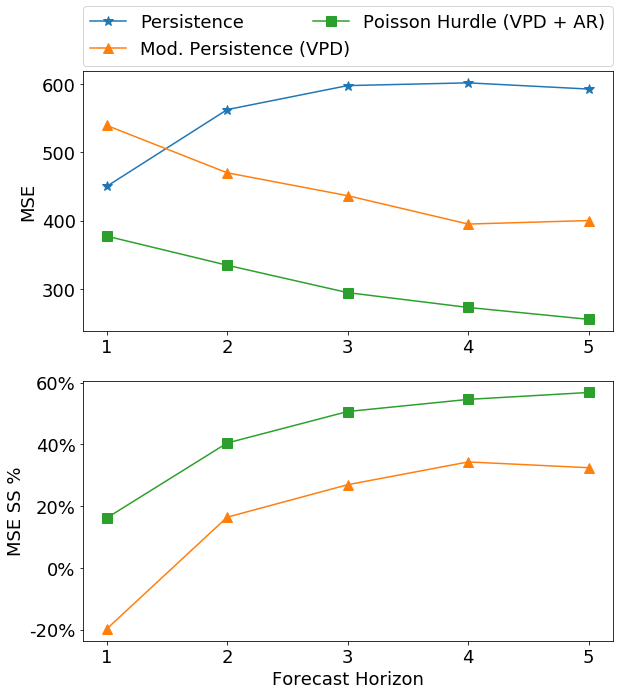

In [1305]:
plt.rcParams['figure.figsize'] = [32,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                'Persistence': persistence['summary_results'],
                'Mod. Persistence (VPD)': p_vpd,
                #'Linear (VPD)': linear_vpd_active['summary_results'],
                'Poisson Hurdle (VPD + AR)': hurdle_poisson_vpd_active['summary_results'],
                
                
}
measurements = [('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error_active', False, True),]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS %'], col_len=1,
                    legend_func=legend_func)

B [ 412.71926401  377.10880038  332.50078343  309.48972069  286.61285011]
R [ 450.12842466  562.39746172  597.52518131  601.53223207  592.44671636]
B [ 412.71926401  377.10880038  332.50078343  309.48972069  286.61285011]
R [ 539.29171871  470.02155839  436.5246269   395.05558393  400.18015168]
B [ 412.71926401  377.10880038  332.50078343  309.48972069  286.61285011]
R [ 377.42082677  334.85096695  294.79741092  273.11909999  255.73361454]


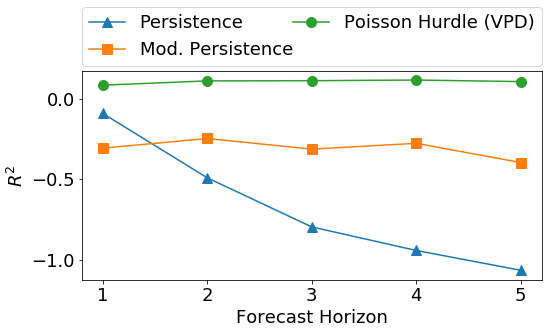

In [735]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {'Mean': mean_model['summary_results'],
                'Persistence': persistence['summary_results'],
                'Mod. Persistence': p_vpd,
                #'Linear (VPD)': linear_vpd_active['summary_results'],
                'Poisson Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                
                
}
measurements = [('','root_mean_squared_error_active', False, True),]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Mean', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['$R^2$', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

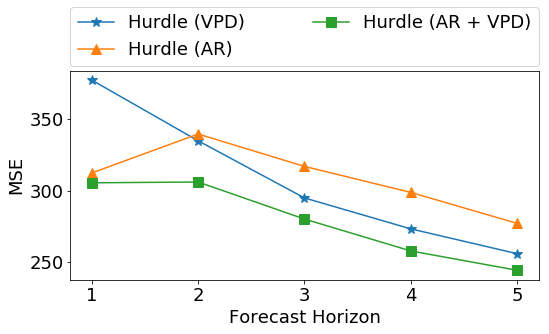

In [896]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Linear (VPD)': linear_vpd_active['summary_results'],
                #'Mean': hurdle_poisson_none_active['summary_results'],
                'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Hurdle (AR)': hurdle_poisson_ar_active['summary_results'],
                'Hurdle (AR + VPD)': hurdle_poisson_vpd_ar_active['summary_results'],    
                
                
}
measurements = [('','root_mean_squared_error_active', False, False),]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

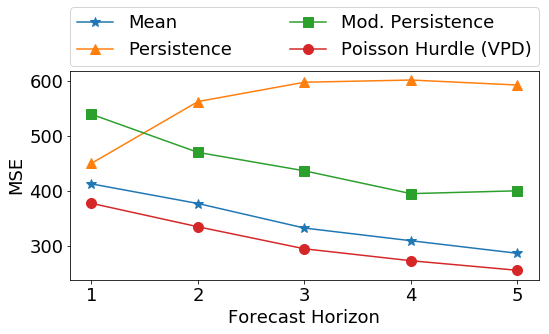

In [734]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {'Mean': mean_model['summary_results'],
                'Persistence': persistence['summary_results'],
                'Mod. Persistence': p_vpd,
                #'Linear (VPD)': linear_vpd_active['summary_results'],
                'Poisson Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                
                
}
measurements = [('','root_mean_squared_error_active', False, False),]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

[None, None, None, None, None, None, None, None, None, None]

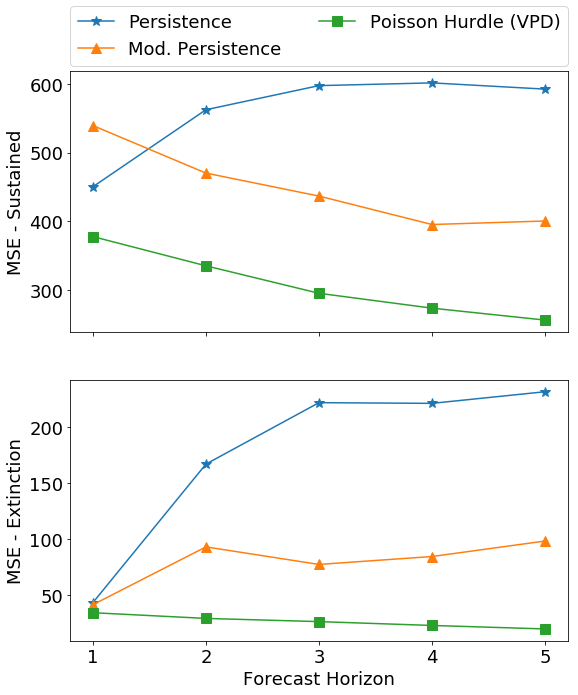

In [175]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

persistence['summary_results']['test']['root_mean_squared_error_zero_zero_target']

results_dict = {#'Mean': mean_model['summary_results'],
                'Persistence': persistence['summary_results'],                
                'Mod. Persistence': p_vpd,
                #'Linear (VPD)': linear_vpd_active['summary_results'],
                'Poisson Hurdle (VPD)': poisson_vpd,
                #'Hurdle - Separated': hurdle_active_all['summary_results'],                
                #'Poisson - Separated': poisson_separated['summary_results'], 
                #'Poisson Hurdle (VPD + AR)': hurdle_poisson_vpd_ar_active['summary_results']
                }
measurements = [(r'','root_mean_squared_error_active_target', False, False), #Sustained (Active $\rightarrow$ Active)
                #(r'Ignition (Zero $\rightarrow$ Active)', 'root_mean_squared_error_ignition_target', False, False),
                (r'','root_mean_squared_error_extinction_target', False, False), #Extinction (Active $\rightarrow$ Zero)
                #(r'Inactive (Zero $\rightarrow$ Zero)','root_mean_squared_error_zero_zero_target', False, False)
               ]

alpha = 0.0049727
legend_test = lambda i,j: i==0
legend_func = legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

axs = plot_active_ignition(results_dict, measurements, y_labels=['MSE - Sustained', 'MSE - Extinction'], scale=True,
                     markers=['*', '^', 's', 'o', 'x'],col_len=1, rescale=poisson_vpd['test']['root_mean_squared_error_active'][2],
                    legend_func=legend_func)

plt.setp(axs[0].get_xticklabels(), visible=False)


In [71]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '174333146375825885684023236112246884915.pkl'), 'rb') as fin:
    a = pickle.load(fin)

with open(os.path.join(EXP_DIR, '311244469891035665516162189277714113641.pkl'), 'rb') as fin:
    b = pickle.load(fin)

with open(os.path.join(EXP_DIR, '80597834044250398358464967283858868856.pkl'), 'rb') as fin:
    c = pickle.load(fin)


In [144]:
with open(os.path.join(EXP_DIR, '142281510133765895484302910074415808119.pkl'), 'rb') as fin:
    d = pickle.load(fin)
with open(os.path.join(EXP_DIR, '155972313908098833276127002473691666274.pkl'), 'rb') as fin:
    e = pickle.load(fin)

not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3
not in depth 2
not in depth 3


In [22]:
a['summary_results']

defaultdict(dict,
            {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3952553314521379,
                1.2698315562288331,
                1.3727482548786514,
                1.4268407492075559,
                1.4430292376974148,
                1.4638268592482333]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.08023485368642401,
                0.055636121042732051,
                0.073372896212593852,
                0.085303617879628188,
                0.090879032890773551,
                0.095982600406392435])},
             'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3952553314521379,
                1.2698315562288331,
                1.3727482548786514,
                1.4268407492075559,
                1.4430292376974148,
                1.4638268592482333]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.08023485368642401,
  

In [13]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                'Zero-only': hurdle_poisson_vpd_ar_active['summary_results'],
                'Two-Poisson Hurdle (VPD + AR)': hurdle_vpd_ar_seperated['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error_ignition', False, False),
                #('','root_mean_squared_error_ignition', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS %'], col_len=1,
                    legend_func=legend_func)

NameError: name 'hurdle_poisson_vpd_ar_active' is not defined

In [63]:
pred_dict_a = {k: a['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [59]:
pred_dict_b = {k: b['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [60]:
pred_dict_c = {k: c['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [148]:
pred_dict_d = {k: d['models'][k-1][0].predict(X_grid_dict_nw_int[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [124]:
def compute_mse(pred_dict, X):
    res = {}
    vals = []
    for k in range(1,6):       
        pred = pred_dict[k]
        ign = X[k][0].num_det==0
        y = X[k][0].num_det_target.values
        
        ign_target = ign & (y>0)
    
        #print(np.mean((y-pred)**2))
        
        #pred_ign = pred#[alaska_interior_mask]
        #y_ign = y#[alaska_interior_mask]
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        pred_ign = pred[ign & alaska_interior_mask[:,:,None]]
        y_ign = y[ign & alaska_interior_mask[:,:,None]]
        
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals.append(np.mean((y_ign-pred_ign)**2))
        
    res['test'] = {'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5],
           [np.mean(vals)] + vals,
           [0.99502729777109944,
            0.99502729777109944,
            0.99502729777109944,
            0.99502729777109944,
            0.99502729777109944]),}
    
    return res
        

In [149]:
res_a = compute_mse(pred_dict_a, X_grid_dict_nw)
res_b = compute_mse(pred_dict_b, X_grid_dict_nw)
res_c = compute_mse(pred_dict_c, X_grid_dict_nw)
res_d = compute_mse(pred_dict_d, X_grid_dict_nw)

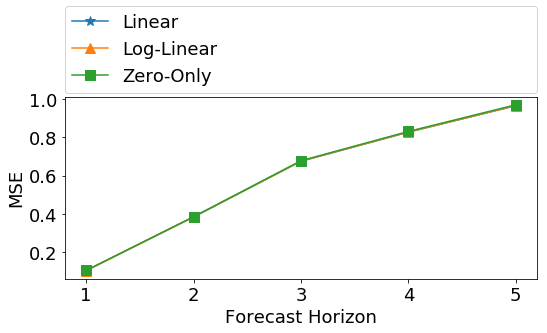

In [27]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                'Linear': a['summary_results'],
                'Log-Linear': b['summary_results'],
                'Zero-Only': c['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error_ignition', False, False),
                #('','root_mean_squared_error_ignition', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS %'], col_len=1,
                    legend_func=legend_func)

In [281]:
hurdle_zero['models'][0][0].afm.model.fit_result_positive.params

Intercept    1.483121
vpd          0.357620
num_det      0.405156
dtype: float64

In [282]:
ocean_hurdle_zero['models'][0][0].afm.model.fit_result_positive.params

Intercept    1.483937
vpd          0.357215
num_det      0.405109
dtype: float64

In [431]:
def compute_ignition_rankings(y_pred, X, mask=np.ones((33,55), dtype=bool)):
    for k in range(1,5):       
        pred = y_pred[k][mask].flatten()   
        
        #print(pred[:10])
        y = X[k][0].num_det_target.values[mask].flatten()
        ign = (X[k][0].num_det.values[mask].flatten()==0) & (X[k][0].num_det_1.values[mask].flatten()==0)
        
        print(np.sum(y[ign]>0), len(y), np.sum(y[ign]>0)/len(y))
        #NUM = np.sum(y[ign]>0)
        NUM = 100
        
        vals = list(zip(pred[ign],y[ign]))
        
        #print(vals[-10:])
        
        vals.sort(key=lambda x: x[0])
        
        num_igns = np.sum([v[1]>0 for v in vals[-NUM:]])
        
        print('Results (k=%d)' % k, num_igns, num_igns/NUM, np.sum(y[ign]>0)/len(y)*NUM)
    
        print(vals[:10])
        print(vals[-10:])
    

In [432]:
compute_ignition_rankings(pred_dict_hurdle_hurdle_ocean, X_grid_dict_nw_ocean, ocean_mask)

2348 1445400 0.00162446381624
Results (k=1) 1 0.01 0.162446381624
[(0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0), (0.0017198272513867813, 0.0)]
[(7.6895580022813821, 0.0), (8.4521919931651119, 0.0), (8.5186357973953442, 0.0), (8.6056621823334538, 0.0), (8.7691733281349897, 0.0), (8.9163815560866482, 0.0), (9.1022207283271896, 0.0), (9.1235011654034679, 0.0), (10.092239268346276, 0.0), (11.164890042573131, 0.0)]
3252 1445400 0.0022498962225
Results (k=2) 1 0.01 0.22498962225
[(0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0), (0.0026822089198646377, 0.0

In [433]:
compute_ignition_rankings(pred_dict_hurdle_log_ocean, X_grid_dict_nw_ocean, ocean_mask)

2348 1445400 0.00162446381624
Results (k=1) 1 0.01 0.162446381624
[(0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0), (0.0055538453219657414, 0.0)]
[(0.71969935238434457, 0.0), (0.77634772601460533, 0.0), (0.78132049395786818, 0.0), (0.78784372909237588, 0.0), (0.80013179423841951, 0.0), (0.81123150742176897, 0.0), (0.82529614799558515, 0.0), (0.82691051218403766, 0.0), (0.90130998671321827, 0.0), (0.98605920234666078, 0.0)]
3252 1445400 0.0022498962225
Results (k=2) 1 0.01 0.22498962225
[(0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0), (0.012889829737368635, 0.0

In [404]:
compute_ignition_rankings(pred_dict_hurdle_zero_ocean, X_grid_dict_nw_ocean, ocean_mask)

2348 1445400 0.00162446381624
3.24892763249
0


In [340]:
def compute_mse(pred_dict, X, ocean_mask=np.ones((33,55), dtype=bool)):
    res = {}
    vals = []
    vals2 = []
    vals3 = []
    vals4 = []
    for k in range(1,6):       
        pred = pred_dict[k]
        ign = X[k][0].num_det.values==0
        y = X[k][0].num_det_target.values
        
        pred_ign = pred[ocean_mask]
        y_ign = y[ocean_mask]
        
        vals.append(np.mean((y_ign-pred_ign)**2))
        
        active = ign==False
        
        pred_ign = pred[active & ocean_mask[:,:,None]]
        y_ign = y[active & ocean_mask[:,:,None]]
        
        vals3.append(np.mean((y_ign-pred_ign)**2))
    
        #print(np.mean((y-pred)**2))
        
        #pred_ign = pred#[alaska_interior_mask]
        #y_ign = y#[alaska_interior_mask]
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        pred_ign = pred[ign & ocean_mask[:,:,None]]
        y_ign = y[ign & ocean_mask[:,:,None]]
        
        print(np.mean(pred_ign))
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals2.append(np.mean((y_ign-pred_ign)**2))
        ign_target = ign & (y>0)

        pred_ign = pred[ign_target & ocean_mask[:,:,None]]
        y_ign = y[ign_target & ocean_mask[:,:,None]]
        
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals4.append(np.mean((y_ign-pred_ign)**2))
        
        #print('Ign %:', np.sum(ign) / pred.size)
        #print('Active %:', np.sum(active) / pred.size)
        
        #print('Ocean Ign %:', np.sum(ign[ocean_mask]) / pred[ocean_mask].size)
        #print('Ocean Active %:', np.sum(active[ocean_mask]) / pred[ocean_mask].size)
      
    res['test'] = {}
    res['test']['root_mean_squared_error'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals)] + vals,
       [0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944])
    
    res['test']['root_mean_squared_error_active'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals3)] + vals3,
       [0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944])

    res['test']['root_mean_squared_error_ignition'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals2)] + vals2,
       [0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944])
    
    res['test']['root_mean_squared_error_ignition_target'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals4)] + vals4,
       [0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944,
        0.99502729777109944])
    
    return res
        

In [182]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '107958959613830976009746516597577134576.pkl'), 'rb') as fin:
    ocean_hurdle_zero = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '210618988875609876927669285125356079471.pkl'), 'rb') as fin:
    ocean_hurdle_log = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '142329472272979438058715055753737537258.pkl'), 'rb') as fin:
    ocean_hurdle_hurdle = pickle.load(fin)

In [289]:
pred_dict_hurdle_zero_ocean = {k: ocean_hurdle_zero['models'][k-1][0].predict(X_grid_dict_nw_ocean[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [291]:
pred_dict_hurdle_log_ocean = {k: ocean_hurdle_log['models'][k-1][0].predict(X_grid_dict_nw_ocean[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [292]:
pred_dict_hurdle_hurdle_ocean = {k: ocean_hurdle_hurdle['models'][k-1][0].predict(X_grid_dict_nw_ocean[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [380]:
ocean_hurdle_zero_results = compute_mse(pred_dict_hurdle_zero_ocean, X_grid_dict_nw_ocean)
ocean_hurdle_log_results = compute_mse(pred_dict_hurdle_log_ocean, X_grid_dict_nw_ocean)
ocean_hurdle_hurdle_results = compute_mse(pred_dict_hurdle_hurdle_ocean, X_grid_dict_nw_ocean)


0.00138327360795
0.00232242154715
0.00275874256363
0.00291779072159
0.00264340990136
0.0110878871685
0.025475626518
0.0375748745995
0.0443734502833
0.049486897437
0.0080465889632
0.0169130161458
0.0240255709321
0.0281659730572
0.0313095220107


In [92]:
ocean_hurdle_hurdle['summary_results']['train']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4071483512798058,
   1.2703524109821709,
   1.3784768481136496,
   1.4405272728258847,
   1.4594975390510749,
   1.4868876854262483]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.071081396220230866,
   0.053936668346586614,
   0.066953069112066887,
   0.074639764576636361,
   0.078191824189754205,
   0.081685654876110264])}

In [104]:
ocean_hurdle_zero['summary_results']['train']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.3961106250003084,
   1.2698981839645658,
   1.3731593671675377,
   1.4277488516598758,
   1.4443044113992058,
   1.4654423108103569]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052410565657146836,
   0.047378531564805676,
   0.052733247426291319,
   0.054054548052898076,
   0.053824300712746756,
   0.054062200528992375])}

In [120]:
num_det = X_grid_dict_nw[5][0].num_det.values
num_det_target = X_grid_dict_nw[5][0].num_det_target.values
ign = X_grid_dict_nw[5][0].num_det.values==0
ign_target = ign & (X_grid_dict_nw[5][0].num_det_target.values!=0)


In [129]:
print(np.mean(num_det_target))
print(np.mean(num_det_target[~ign]))
print(np.std(num_det_target[~ign]))
print('R', np.std(num_det_target[~ign])/np.mean(num_det_target[~ign]))

print(np.mean(num_det_target[ign]))
print(np.std(num_det_target[ign]))
print('R', np.std(num_det_target[ign])/np.mean(num_det_target[ign]))



0.046923115452
5.65962837838
18.8590036529
R 3.33219822788
0.0268805205198
1.04796329543
R 38.9859747937


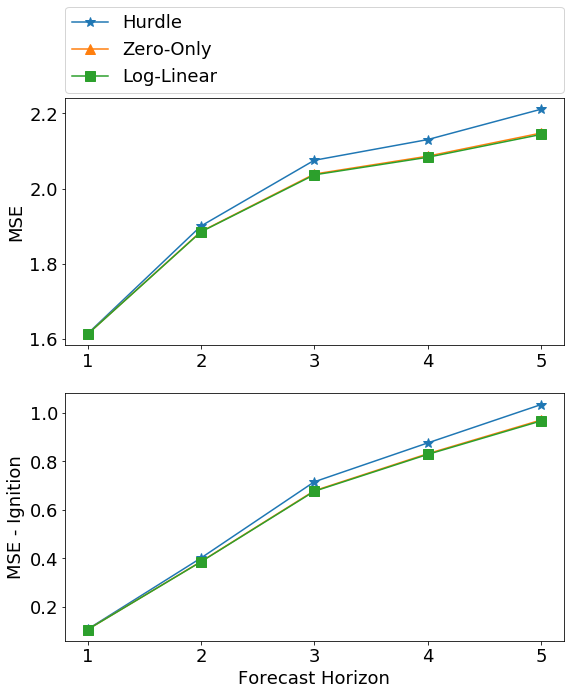

In [102]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': a['summary_results'],
                #'Log-Linear': b['summary_results'],
                'Hurdle': ocean_hurdle_hurdle['summary_results'],
                'Zero-Only': ocean_hurdle_zero['summary_results'],
                'Log-Linear': ocean_hurdle_log['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [#('','root_mean_squared_error', False, False),
                #('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error', False, False),
                ('','root_mean_squared_error_ignition', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

In [343]:
ocean_hurdle_zero_results = compute_mse(pred_dict_hurdle_zero_ocean, X_grid_dict_nw_ocean, ocean_mask)
ocean_hurdle_log_results = compute_mse(pred_dict_hurdle_log_ocean, X_grid_dict_nw_ocean, ocean_mask)
ocean_hurdle_hurdle_results = compute_mse(pred_dict_hurdle_hurdle_ocean, X_grid_dict_nw_ocean, ocean_mask)


0.00190900753781
0.00320796682707
0.00381240952186
0.00403317979438
0.00365335511393
0.012661226466
0.0289736727132
0.0426488946571
0.0502267458779
0.0558340093463
0.0101230204486
0.0217274015997
0.0310540913438
0.0363406790431
0.0404300567988


In [101]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': a['summary_results'],
                #'Log-Linear': b['summary_results'],
                'Hurdle': ocean_hurdle_hurdle_results,
                'Zero-Only': ocean_hurdle_zero_results,
                'Log-Linear': ocean_hurdle_log_results,
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [#('','root_mean_squared_error', False, False),
                #('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error_ignition', False, False),
                ('','root_mean_squared_error_ignition_target', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition',], col_len=1,
                    legend_func=legend_func)

NameError: name 'ocean_hurdle_hurdle_results' is not defined

In [145]:
d['models'][0][0].igm.model.fit_result.params

Intercept   -4.695988
vpd          1.206139
dtype: float64

In [143]:
b['models'][0][0].igm.model.fit_result.params

Intercept   -5.359729
vpd          1.468123
dtype: float64

In [116]:
np.mean(pred_dict_b[1])

0.049860903230437813

In [134]:
print(res_a)
print(res_b)
print(res_c)
print(res_d)

{'test': {'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [2.0972875181306967, 0.44442552203062968, 1.2676364021271018, 2.3956077404314069, 3.0590559897118017, 3.3197119363525429], [0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994])}}
{'test': {'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [2.0991185386118505, 0.44457738015338871, 1.2685694229753366, 2.397466465996418, 3.0617808611935877, 3.3231985627405218], [0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994])}}
{'test': {'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [2.1072129950182203, 0.4459565859691294, 1.2720746729412282, 2.4047930349920028, 3.0731944793524351, 3.3400462018363042], [0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994, 0.9950272977710994])}}
{'test': {'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [2.0991185386118505, 0.4445773801

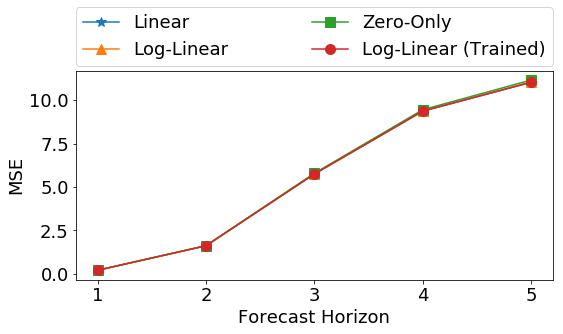

In [150]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                'Linear': res_a,
                'Log-Linear': res_b,
                'Zero-Only': res_c,
                'Log-Linear (Trained)': res_d,
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error_ignition', False, False),
                #('','root_mean_squared_error_ignition', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS %'], col_len=1,
                    legend_func=legend_func)

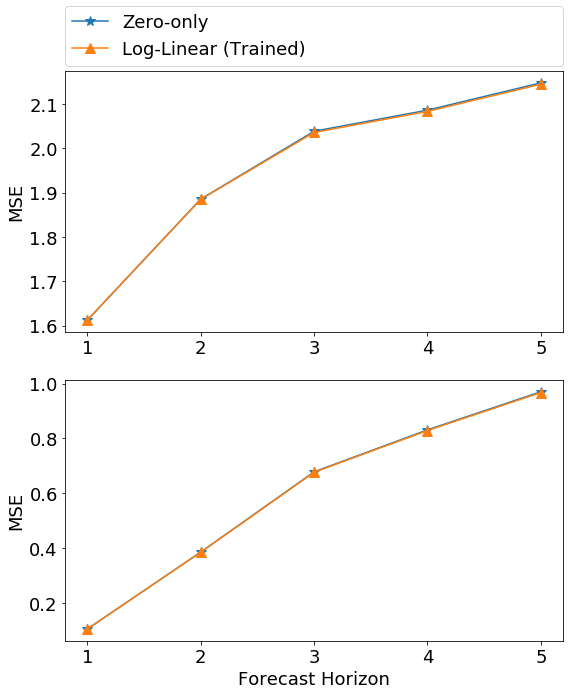

In [147]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': res_a,
                #'Log-Linear': res_b,
                #'Zero-Only': res_c,
                'Zero-only': e['summary_results'],
                'Log-Linear (Trained)': d['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error', False, False),
                ('','root_mean_squared_error_ignition', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE'], col_len=1,
                    legend_func=legend_func)

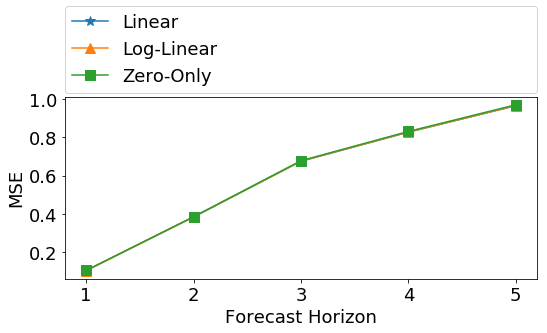

In [93]:
plt.rcParams['figure.figsize'] = [30,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                'Linear': a['summary_results'],
                'Log-Linear': b['summary_results'],
                'Zero-Only': c['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error_ignition', False, False),
                #('','root_mean_squared_error_ignition', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE SS %'], col_len=1,
                    legend_func=legend_func)

In [88]:
hurdle_ig_mean_vpd_ar_seperated['models'][0][0].igm.model.mean

0.005834220865814039

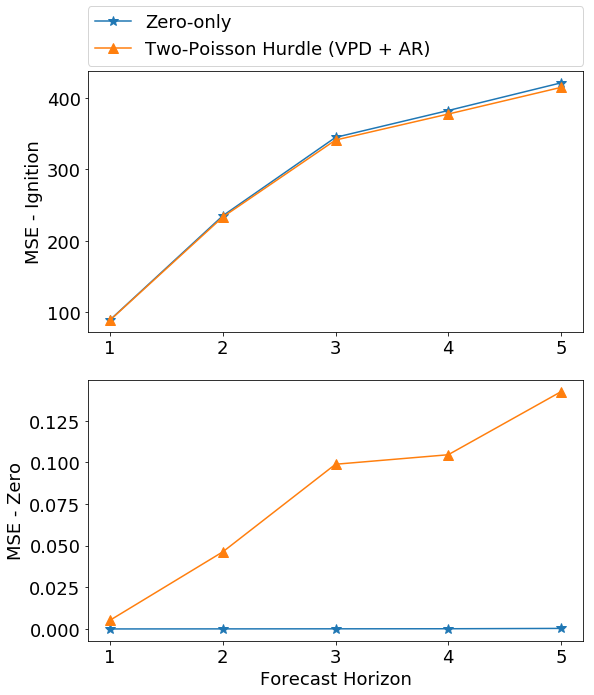

In [56]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                'Zero-only': hurdle_poisson_vpd_ar_active['summary_results'],
                'Two-Poisson Hurdle (VPD + AR)': hurdle_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [('','root_mean_squared_error_ignition_target', False, False),
                ('','root_mean_squared_error_zero_zero_target', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline=None, scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE - Ignition', 'MSE - Zero'], col_len=1,
                    legend_func=legend_func)

In [170]:
hurdle_poisson_vpd_ar_active['summary_results']['train']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.3957060569071211,
   1.2696723283004476,
   1.3728176957201303,
   1.4271530534917842,
   1.443926716348384,
   1.4649604906748595]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052382592115254624,
   0.047361062213582168,
   0.05270759252684299,
   0.054017664194395139,
   0.053796457552766352,
   0.054030184088686449])}

In [165]:
mlp_64_vpd_ar_active['summary_results']['train']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4066660329190681,
   1.2766178200463434,
   1.3858731797263193,
   1.4343151632110438,
   1.4572139318781749,
   1.4793100697334589]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.054099335106231529,
   0.047308527305771876,
   0.054040319118083657,
   0.056166152919157573,
   0.056286378441985307,
   0.056695297746159237])}

In [169]:
mlp_32_vpd_rain_ar_active['summary_results']['train']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4069790849394304,
   1.2763050263305389,
   1.3856884962710725,
   1.4352574782621432,
   1.4580629219175298,
   1.4795815019158667]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.054279721913920956,
   0.047666464857329963,
   0.054761480874690627,
   0.056192523853708508,
   0.056413846261835342,
   0.056364293722040347])}

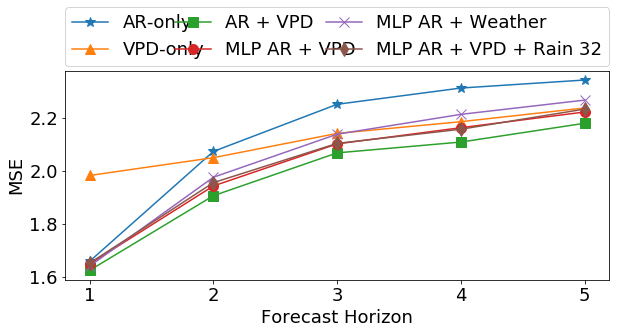

In [168]:
plt.rcParams['figure.figsize'] = [34,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                'AR-only': hurdle_poisson_ar_active['summary_results'],
                'VPD-only': hurdle_poisson_vpd_active['summary_results'],
                'AR + VPD': hurdle_poisson_vpd_ar_active['summary_results'],
                'MLP AR + VPD': mlp_64_vpd_ar_active['summary_results'], 
                'MLP AR + Weather': mlp_64_weather_ar_active['summary_results'], 
                'MLP AR + VPD + Rain 32': mlp_32_vpd_rain_ar_active['summary_results'], 
    
    
                #'AR + Weather': hurdle_poisson_vpd_rain_wind_ar_active['summary_results'],  
                #'Mod. Persistence': p_vpd,
                #'Mean': mean_model['summary_results'],
                #'Poisson (A,W,M)': poisson_all['summary_results'],                  
                #'Log-Linear': loglinear_all['summary_results'],
                #'Linear (Weather + AR)' : linear_ar_weather['summary_results'],  
                #'Hurdle (Weather + AR + Mem)' : hurdle_active_all['summary_results'],
                #'Weather (Sep)': hurdle_poisson_temp_humid_rain_wind_seperated,
                #'AR + Weather (Sep)': hurdle_poisson_temp_humid_rain_wind_ar_seperated,
                #'AR + Weather + Mem (Sep)': hurdle_poisson_temp_humid_rain_wind_ar_mem_seperated,
    
    
                
                
}
measurements = [('','root_mean_squared_error', False, False),]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)

plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=True, 
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'], 
                     y_labels = ['MSE', 'MSE SS %'], col_len=1, legend_func=legend_func)

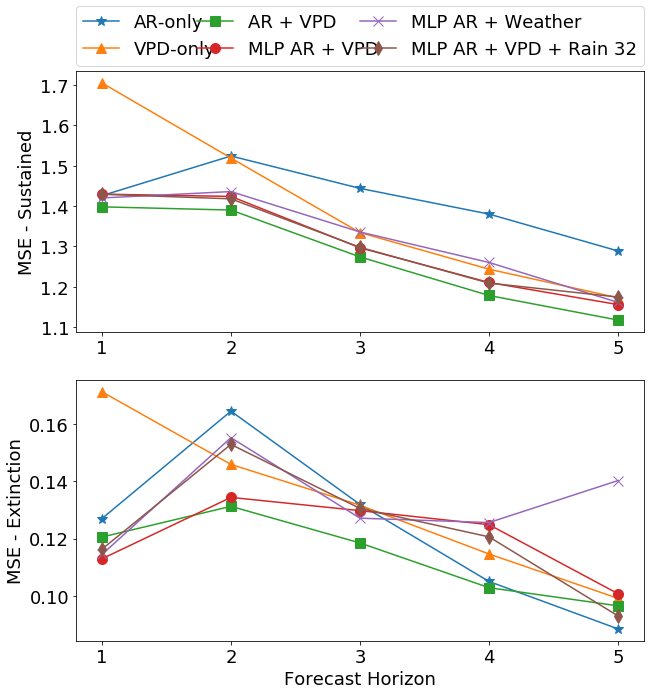

In [174]:
plt.rcParams['figure.figsize'] = [34,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                'AR-only': hurdle_poisson_ar_active['summary_results'],
                'VPD-only': hurdle_poisson_vpd_active['summary_results'],
                'AR + VPD': hurdle_poisson_vpd_ar_active['summary_results'],
                'MLP AR + VPD': mlp_64_vpd_ar_active['summary_results'], 
                'MLP AR + Weather': mlp_64_weather_ar_active['summary_results'], 
                'MLP AR + VPD + Rain 32': mlp_32_vpd_rain_ar_active['summary_results'], 
    
    
                #'AR + Weather': hurdle_poisson_vpd_rain_wind_ar_active['summary_results'],  
                #'Mod. Persistence': p_vpd,
                #'Mean': mean_model['summary_results'],
                #'Poisson (A,W,M)': poisson_all['summary_results'],                  
                #'Log-Linear': loglinear_all['summary_results'],
                #'Linear (Weather + AR)' : linear_ar_weather['summary_results'],  
                #'Hurdle (Weather + AR + Mem)' : hurdle_active_all['summary_results'],
                #'Weather (Sep)': hurdle_poisson_temp_humid_rain_wind_seperated,
                #'AR + Weather (Sep)': hurdle_poisson_temp_humid_rain_wind_ar_seperated,
                #'AR + Weather + Mem (Sep)': hurdle_poisson_temp_humid_rain_wind_ar_mem_seperated,
    
    
                
                
}
measurements = [(r'','root_mean_squared_error_active_target', False, False), #Sustained (Active $\rightarrow$ Active)
                #(r'Ignition (Zero $\rightarrow$ Active)', 'root_mean_squared_error_ignition_target', False, False),
                (r'','root_mean_squared_error_extinction_target', False, False), #Extinction (Active $\rightarrow$ Zero)
                #(r'Inactive (Zero $\rightarrow$ Zero)','root_mean_squared_error_zero_zero_target', False, False)
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)

plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=True, 
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'], 
                     y_labels = ['MSE - Sustained', 'MSE - Extinction'], col_len=1, legend_func=legend_func)

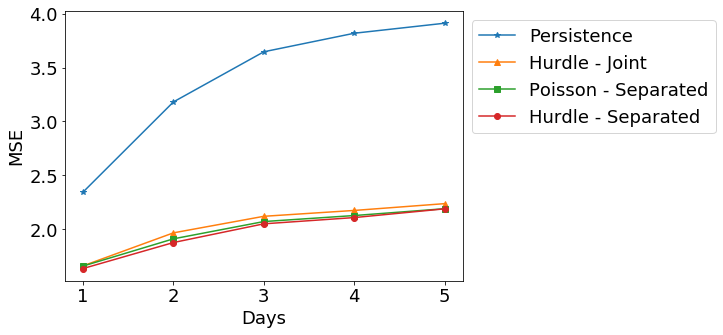

In [339]:
plt.rcParams['figure.figsize'] = [34,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {'Persistence': persistence['summary_results'],
                #'Poisson - Active': poisson_ar_weather['summary_results'],                 
                'Hurdle - Joint': hurdle_joint['summary_results'], 
                'Poisson - Separated': poisson_separated['summary_results'],  
                'Hurdle - Separated': hurdle_active_all['summary_results'],
                #'Poisson Hurdle Ign - Separated': poisson_hurdle_separated['summary_results'],
                #'Poisson Hurdle Act - Separated': hurdle_poisson_separated['summary_results'],
}
measurements = [('','root_mean_squared_error', False, False),]

alpha = 0.0049727
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=True, markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'], y_labels = ['MSE', 'MSE SS %'], col_len=1)

In [636]:
a = list(persistence['summary_results']['test']['root_mean_squared_error_zero_zero_target'])
a[1] = [0]*6
persistence['summary_results']['test']['root_mean_squared_error_zero_zero_target'] = a

a = list(p_vpd['test']['root_mean_squared_error_zero_zero_target'])
a[1] = [0]*6
p_vpd['test']['root_mean_squared_error_zero_zero_target'] = a
p_vpd['test']['root_mean_squared_error_ignition_target'] = persistence['summary_results']['test']['root_mean_squared_error_ignition_target']

In [640]:
poisson_vpd['test']['root_mean_squared_error_active_target']

(['Avg.', 1, 2, 3, 4, 5],
 [28.74082073280122,
  26.77742700045913,
  28.075657192414816,
  28.80327785333778,
  29.76642154725673,
  30.281320070537657],
 [0.002378662659654395,
  0.001927372902579514,
  0.0016083145504633108,
  0.0014034560480841473,
  0.0012787377911344855])

In [641]:
poisson_vpd['test']['root_mean_squared_error_extinction_target']

(['Avg.', 1, 2, 3, 4, 5],
 [6.429632552693734,
  8.124533513864229,
  6.9211151562536,
  6.255092555235355,
  5.666901704781595,
  5.180519833333891],
 [0.002594039569246181,
  0.003045329326321062,
  0.003364387678437265,
  0.0035692461808164285,
  0.003693964437766091])

In [15]:
%%capture
with open(os.path.join(EXP_DIR, '9124994750523637727354149796289650366.pkl'), 'rb') as fin:
    hurdle_poisson_none_active = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/9124994750523637727354149796289650366.pkl'

In [661]:
%%capture
with open(os.path.join(EXP_DIR, '142053636272903477854657158046914875017.pkl'), 'rb') as fin:
    hurdle_poisson_temp_active = pickle.load(fin)

In [664]:
%%capture
with open(os.path.join(EXP_DIR, '164509690186221222742410485595762413480.pkl'), 'rb') as fin:
    hurdle_poisson_humid_active = pickle.load(fin)

In [521]:
%%capture
with open(os.path.join(EXP_DIR, '80213958531142110325830101177993090119.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_active = pickle.load(fin)

In [749]:
%%capture
with open(os.path.join(EXP_DIR, '24997533704244970354289799694167445264.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_active = pickle.load(fin)

In [768]:
%%capture
with open(os.path.join(EXP_DIR, '277354675961379328209768143116386515464.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_wind_active = pickle.load(fin)

In [676]:
%%capture
with open(os.path.join(EXP_DIR, '298526856731137564274580380216943261763.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_active = pickle.load(fin)

In [677]:
%%capture
with open(os.path.join(EXP_DIR, '48158037526688998866063580786446741186.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_rain_active = pickle.load(fin)

In [678]:
%%capture
with open(os.path.join(EXP_DIR, '181226067171785042911392034060208263708.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_rain_wind_active = pickle.load(fin)

In [539]:
%%capture
with open(os.path.join(EXP_DIR, '257478515835063504587872535502890799792.pkl'), 'rb') as fin:
    hurdle_poisson_ar_active = pickle.load(fin)

In [680]:
%%capture
with open(os.path.join(EXP_DIR, '19391810262729005977541489921235920636.pkl'), 'rb') as fin:
    hurdle_poisson_temp_ar_active = pickle.load(fin)

In [681]:
%%capture
with open(os.path.join(EXP_DIR, '99218640209233600736458382644042579278.pkl'), 'rb') as fin:
    hurdle_poisson_humid_ar_active = pickle.load(fin)

In [6]:
%%capture
with open(os.path.join(EXP_DIR, '14598545507168966397436525387159749822.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_active = pickle.load(fin)

AttributeError: Can't get attribute 'active_filter_func' on <module 'models.grid_models' from '/home/graffc/Documents/dev/deployed/fire_prediction/src/models/grid_models.py'>

In [5]:
%%capture
with open(os.path.join(EXP_DIR, '105050458147126476489993075970352479530.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_ar_active = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/105050458147126476489993075970352479530.pkl'

In [766]:
%%capture
with open(os.path.join(EXP_DIR, '304057135081056844995032292680612013068.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_wind_ar_active = pickle.load(fin)

In [687]:
%%capture
with open(os.path.join(EXP_DIR, '93847965893929562084474901975052343169.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_ar_active = pickle.load(fin)

In [688]:
%%capture
with open(os.path.join(EXP_DIR, '139732990654489703614584641617819655787.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_rain_ar_active = pickle.load(fin)

In [686]:
%%capture
with open(os.path.join(EXP_DIR, '321789080305739808099074942455063015289.pkl'), 'rb') as fin:
    hurdle_poisson_humid_temp_rain_wind_ar_active = pickle.load(fin)

In [670]:
hurdle_poisson_temp_active['summary_results']['test']['root_mean_squared_error_active'][1][1]

19.555748825822228

In [746]:
hurdle_poisson_vpd_ar_active['summary_results']['test']['root_mean_squared_error_active']

(['Avg.', 1, 2, 3, 4, 5],
 [16.675366472101437,
  17.475833549559056,
  17.4919927423283,
  16.733613442807439,
  16.05134399026571,
  15.624048635546693],
 [0.0049727022289005763,
  0.0049727022289005763,
  0.0049727022289005763,
  0.0049727022289005763,
  0.0049727022289005763])

In [744]:
hurdle_poisson_ar_active['summary_results']['test']['root_mean_squared_error_active'][1][1]

17.671306185718439

In [769]:
no_ar = [hurdle_poisson_none_active, hurdle_poisson_temp_active , hurdle_poisson_humid_active, hurdle_poisson_vpd_active, 
         hurdle_poisson_vpd_rain_active, hurdle_poisson_vpd_rain_wind_active,
         hurdle_poisson_humid_temp_active, hurdle_poisson_humid_temp_rain_active, hurdle_poisson_humid_temp_rain_wind_active]
ar =    [hurdle_poisson_ar_active, hurdle_poisson_temp_ar_active , hurdle_poisson_humid_ar_active, hurdle_poisson_vpd_ar_active, 
         hurdle_poisson_vpd_rain_ar_active, hurdle_poisson_vpd_rain_wind_ar_active,
         hurdle_poisson_humid_temp_ar_active, hurdle_poisson_humid_temp_rain_ar_active, hurdle_poisson_humid_temp_rain_wind_ar_active]
names = ['None', 'Temp', 'Humid', 'VPD', 'VPD, Rain', 'VPD, Rain, Wind', 'Temp, Humid', 'Temp, Humid, Rain', 'Temp, Humid, Rain, Wind']
table = []
for n,v,v2 in zip(names,no_ar,ar):
    table.append((n,np.round(v['summary_results']['test']['root_mean_squared_error_active'][1][0]**2,2),np.round(v2['summary_results']['test']['root_mean_squared_error_active'][1][0]**2,2)))
    
table = tabulate(table,tablefmt='latex')
print(table)

\begin{tabular}{lrr}
\hline
 None                    & 342.19 & 308.53 \\
 Temp                    & 309.71 & 282.4  \\
 Humid                   & 316.39 & 286.58 \\
 VPD                     & 305.65 & 278.07 \\
 VPD, Rain               & 304.67 & 277.04 \\
 VPD, Rain, Wind         & 304.63 & 276.96 \\
 Temp, Humid             & 306.69 & 280.38 \\
 Temp, Humid, Rain       & 306.49 & 280.09 \\
 Temp, Humid, Rain, Wind & 306.54 & 279.92 \\
\hline
\end{tabular}


[None, None, None, None, None, None, None, None, None, None]

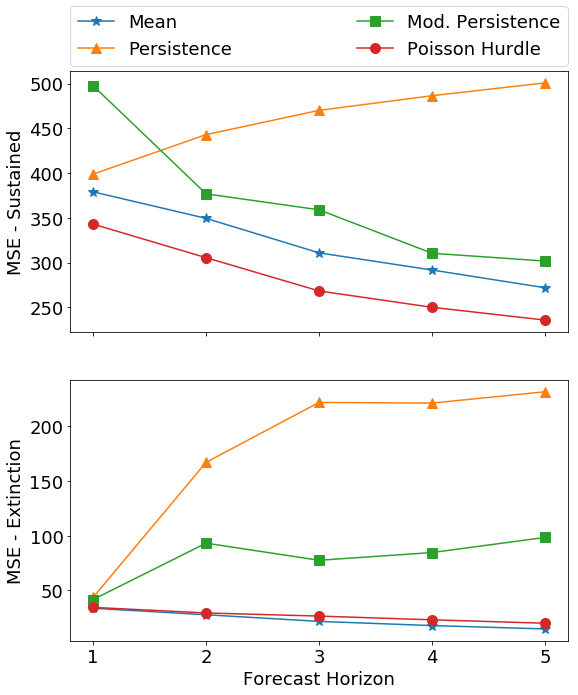

In [128]:
def make_weather_box_plot(X, var_name, num_boxes=5):
    ind = X.num_det.values>0
    vals = X[var_name].values[ind]
    det = X.num_det_target.values[ind]
    
    min_val, max_val = np.min(vals), np.max(vals)
    cutoffs = np.linspace(min_val, max_val, num_boxes+1)
    
    comb = list(zip(vals.flatten(), det.flatten()))
    
    boxes = []
    labels = []
    for i in range(num_boxes):
        low,hi = cutoffs[i], cutoffs[i+1]
        vals_filt = [d for (v,d) in comb if v >= low and v <= hi]
        
        print(len(vals_filt)/len(comb))
        
        boxes.append(vals_filt)
        labels.append('%.2f - %.2f' % (low,hi))
    
    plt.xlabel('%s' % var_name)
    plt.ylabel('# of Detections')
    plt.boxplot(boxes, labels=labels, showfliers=False)

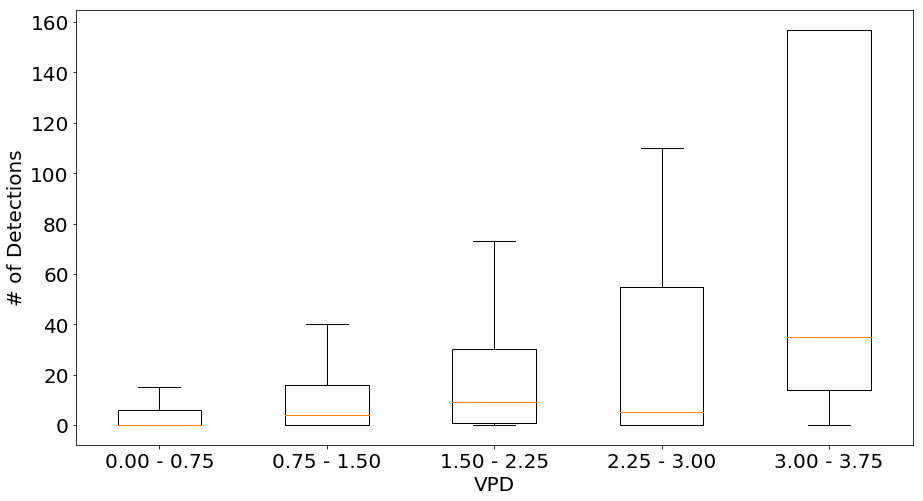

In [120]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
make_weather_box_plot(X_grid_dict_nw[1][0], 'vpd', 5)

0.23465653153153154
0.43426238738738737
0.26182432432432434
0.06278153153153153
0.005208333333333333
0.0007038288288288288
0.0005630630630630631


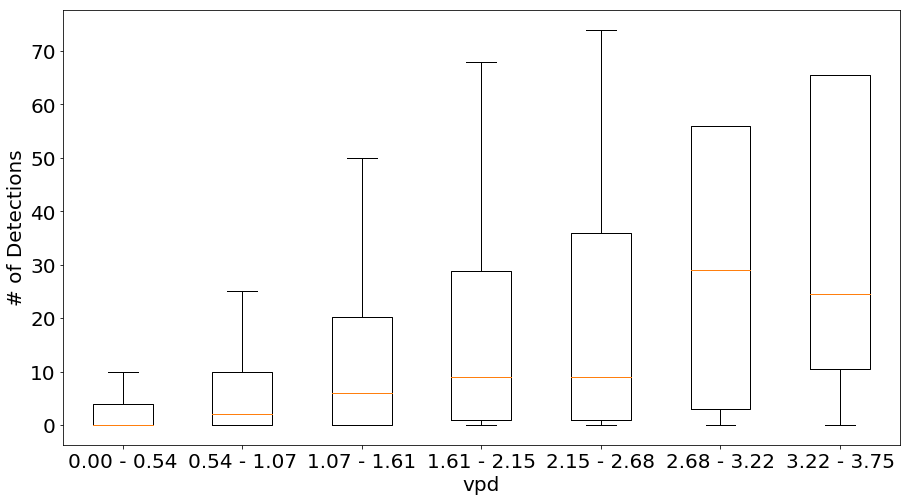

In [129]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
make_weather_box_plot(X_grid_dict_nw[1][0], 'vpd', 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f28549b9cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28549c55f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f28549b9ba8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f28549c5dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f28549ce240>,
 'means': []}

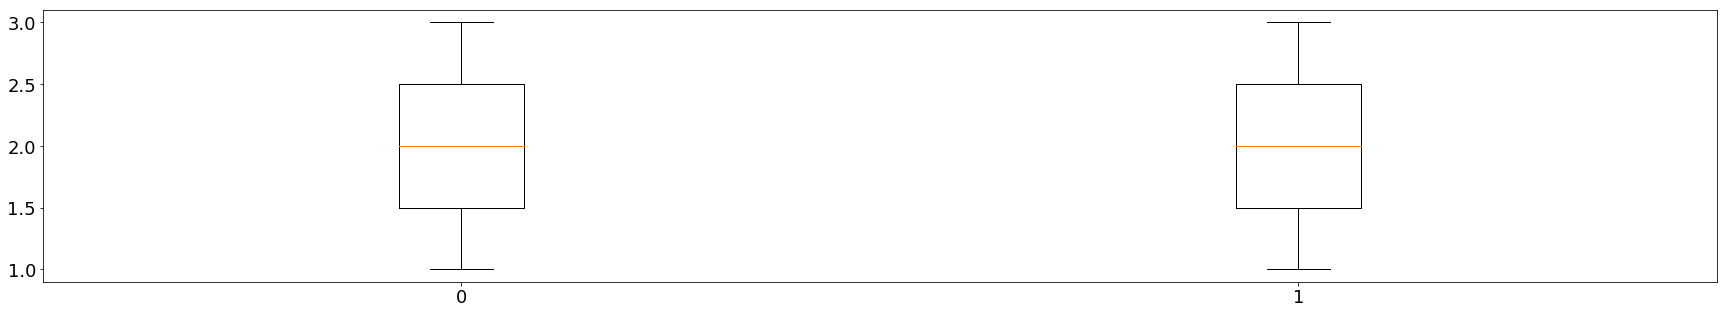

In [98]:
plt.boxplot([[1,2,3],[1,2,3]], labels=[0,1])

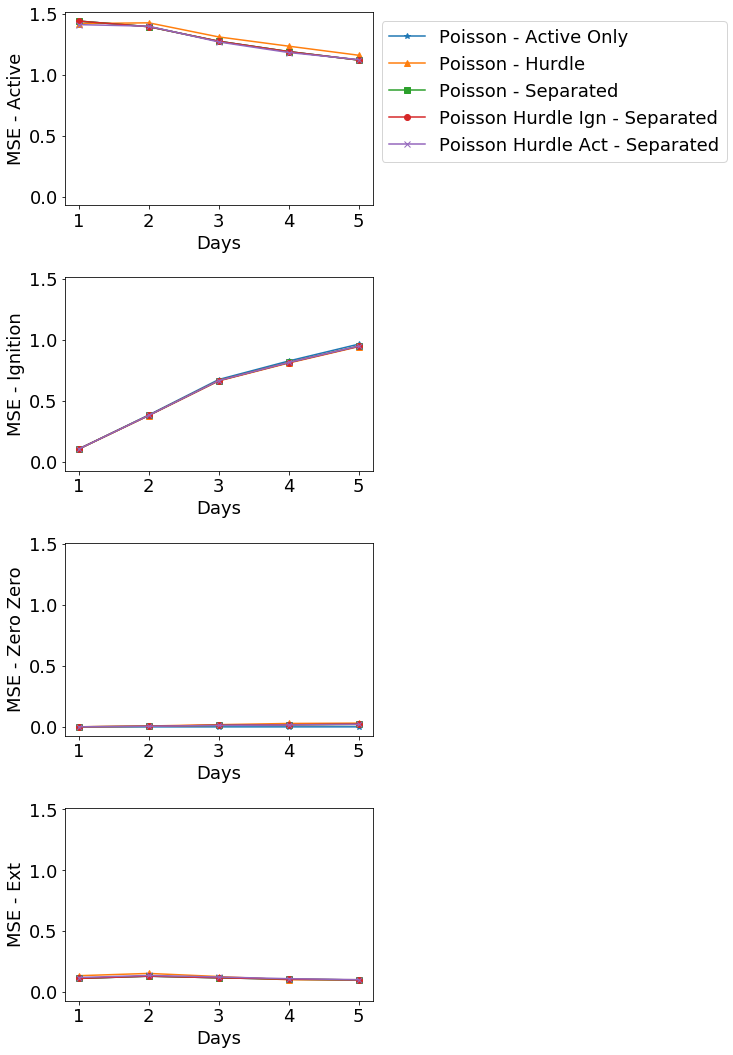

In [319]:
plt.rcParams['figure.figsize'] = [34,15]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                'Poisson - Active Only': poisson_ar_weather['summary_results'],
                'Poisson - Hurdle': hurdle_joint['summary_results'],
                'Poisson - Separated': poisson_separated['summary_results'],
                'Poisson Hurdle Ign - Separated': poisson_hurdle_separated['summary_results'],
                'Poisson Hurdle Act - Separated': hurdle_poisson_separated['summary_results'],
}
measurements = [('','root_mean_squared_error_active_target', True, False),('','root_mean_squared_error_ignition_target', True, False),('','root_mean_squared_error_zero_zero_target', True, False),('','root_mean_squared_error_extinction_target', True, False),]

alpha = 0.0049727
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=True, markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'], y_labels = ['MSE - Active', 'MSE - Ignition', 'MSE - Zero Zero', 'MSE - Ext'], col_len=1)

In [325]:
print(poisson_ar_weather['summary_results']['test']['root_mean_squared_error'][1][0],
hurdle_poisson_separated['summary_results']['test']['root_mean_squared_error'][1][0],
poisson_hurdle_separated['summary_results']['test']['root_mean_squared_error'][1][0],
poisson_separated['summary_results']['test']['root_mean_squared_error'][1][0],
hurdle_joint['summary_results']['test']['root_mean_squared_error'][1][0],
hurdle_active_all['summary_results']['test']['root_mean_squared_error'][1][0],
     )

1.40821594828 1.40832802623 1.40936194678 1.40910402019 1.42300453356 1.40196148743


In [350]:
poisson_ar_weather_in_sample['models'][0][0].afm.model.fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         num_det_target   No. Observations:                 9928
Model:                            GLM   Df Residuals:                     9922
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79449.
Date:                Fri, 16 Nov 2018   Deviance:                   1.4014e+05
Time:                        06:49:38   Pearson chi2:                 2.28e+05
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4965      0.005    274.899      0.000       1.486       1.507
temperature     0.1355      0.005     28.356      0.000       0.126       0.145
humidity       -0.1675      0.005    -31.381      0.000      -0.178      -0.157
rain           -0.1200      0.007    -17.407      0.000      -0.134      -0.107
wind           -0.1262      0.004    -29.535      0.000      -0.135      -0.118
num_det         0.8967      0.004    223.141      0.000       0.889       0.905
===============================================================================
"""

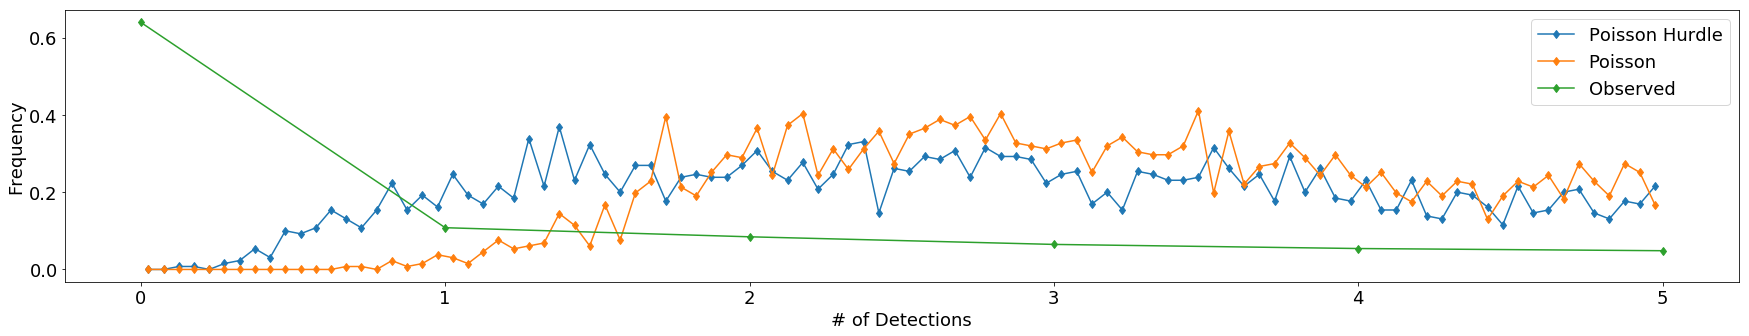

In [818]:
ind = X_grid_dict_nw[1][0].num_det.values>0

BINS = 100#

values = pred_dict_hurdle_active[1][ind]
y,binEdges=np.histogram(values,bins=BINS, density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])


plt.plot(bincenters,y,'d-', label='Poisson Hurdle')

values = pred_dict[1][ind]
y,binEdges=np.histogram(values,bins=BINS, density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])



plt.plot(bincenters,y,'d-', label='Poisson')

values = X_grid_dict_nw[1][0].num_det_target.values[ind]
y,binEdges=np.histogram(values,bins=(np.array(range(0,5+2)) - .5), density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])



plt.plot(bincenters,y,'d-', label='Observed')

plt.xlabel('# of Detections')
plt.ylabel('Frequency')


plt.legend()

                  0.0    1.0    2.0    3.0    4.0    5.0
--------------  -----  -----  -----  -----  -----  -----
Observed         64     10.8    8.5    6.5    5.4    4.9
Poisson           0      3.5   25     31     21.7   18.8
Poisson Hurdle    1.1   18.3   23     23.2   18.7   15.6


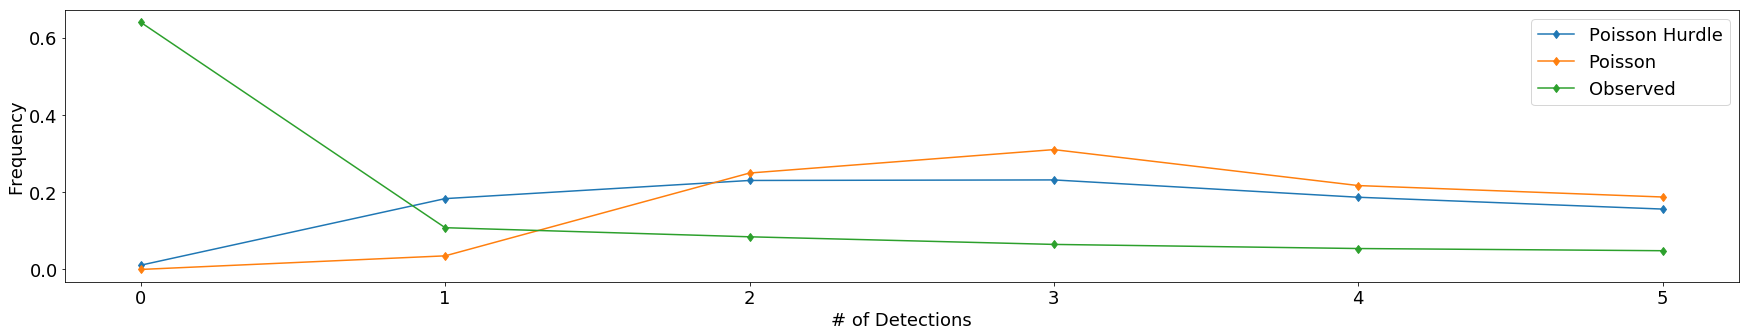

In [836]:
ind = X_grid_dict_nw[1][0].num_det.values>0

BINS = (np.array(range(0,5+2)) - .5)

table = []

values = pred_dict_hurdle_active[1][ind]
y,binEdges=np.histogram(values,bins=BINS, density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

a = bincenters
b = np.round(y,3) * 100

plt.plot(bincenters,y,'d-', label='Poisson Hurdle')

values = pred_dict[1][ind]
y,binEdges=np.histogram(values,bins=BINS, density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

c = np.round(y,3) * 100

plt.plot(bincenters,y,'d-', label='Poisson')

values = X_grid_dict_nw[1][0].num_det_target.values[ind]
y,binEdges=np.histogram(values,bins=BINS, density=True,range=(0,5))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

d = np.round(y,3) * 100

plt.plot(bincenters,y,'d-', label='Observed')

plt.xlabel('# of Detections')
plt.ylabel('Frequency')


plt.legend()

print(tabulate([['Observed'] + list(d), ['Poisson'] + list(c), ['Poisson Hurdle'] + list(b)], headers=a))

In [810]:
values = pred_dict_hurdle_active[1][ind]
values2 = pred_dict[1][ind]
print(np.sum(values<.5))
print(np.sum(values2<.5))

31
0


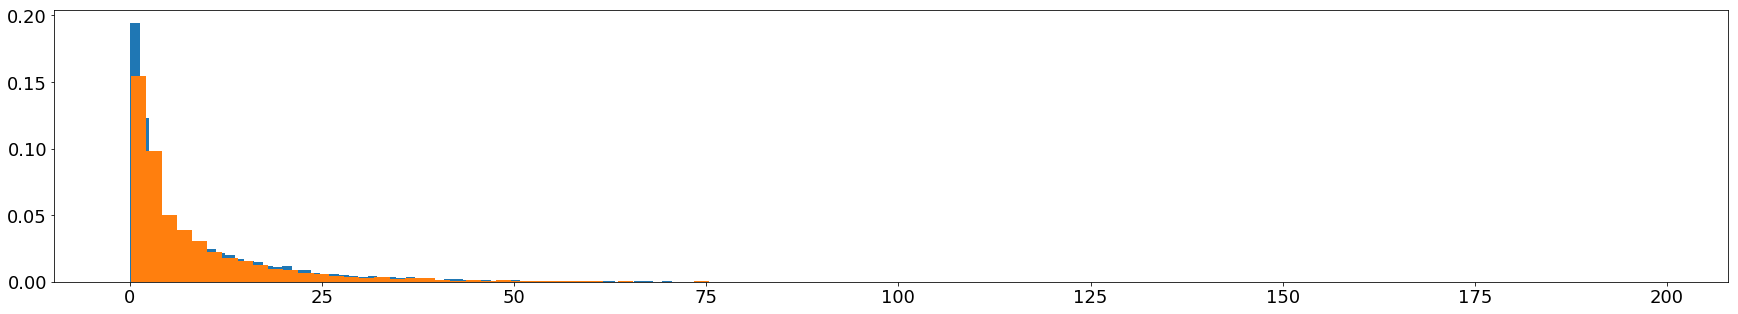

In [765]:

_ = plt.hist([ind],bins=100,density=True)

ind = pred_dict[1]>0
_ = plt.hist(pred_dict[1][ind],bins=100,density=True)

<bound method MultidataWrapper.remove_year of <helper.multidata_wrapper.MultidataWrapper object at 0x7f22f175a940>>

In [1106]:
def year_wilcoxon_sign_test(model1, model2, X):
    
    horizon = {}
    for forecast_horizon in range(1,5+1):
        print(forecast_horizon)
        samples = []
        for model in [model1, model2]:
            years_mse = []
            for year in range(2007,2016+1):
                _,X_te = X[forecast_horizon].remove_year(year)
                year_pred = model[forecast_horizon-1][year-2007].predict(X_te, shape=(33,55,110))

                year_targets = X_te[0].num_det_target.values                       
                year_mse = np.mean((year_targets - year_pred)**2)

                years_mse.append(year_mse)

            samples.append(years_mse)
        horizon[forecast_horizon] = scipy.stats.wilcoxon(samples[0], samples[1]), samples
        
    return horizon

In [1108]:
model1 = hurdle_poisson_vpd_ar_active
model2 = hurdle_poisson_vpd_rain_wind_ar_active

horizon_results_vpd_ar_vs_vpd_rain_wind_ar = year_wilcoxon_sign_test(model1['models'], model2['models'], X_grid_dict_nw)

1
2
3
4
5


Text(0.5,1,'VPD + AR vs. VPD + Rain + Wind + AR')

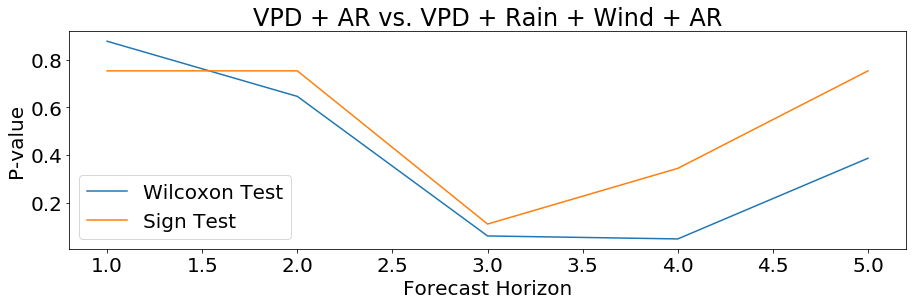

In [1130]:
horizon_results = horizon_results_vpd_ar_vs_vpd_rain_wind_ar

plt.plot(range(1,6), [horizon_results[i][0].pvalue for i in range(1,5+1)], label='Wilcoxon Test')
sign_test = [scipy.stats.binom_test(np.sum([s1<s2 for (s1,s2) in zip(horizon_results[i][1][0], horizon_results[i][1][1])]),10) for i in range(1,5+1)]
plt.plot(range(1,6),sign_test, label='Sign Test')
plt.legend()
plt.ylabel('P-value')
plt.xlabel('Forecast Horizon')
plt.title('VPD + AR vs. VPD + Rain + Wind + AR')

In [1119]:
model1 = hurdle_poisson_vpd_active
model2 = hurdle_poisson_ar_active

horizon_results_vpd_vs_ar = year_wilcoxon_sign_test(model1['models'], model2['models'], X_grid_dict_nw)

1
2
3
4
5


Text(0.5,1,'VPD vs. AR')

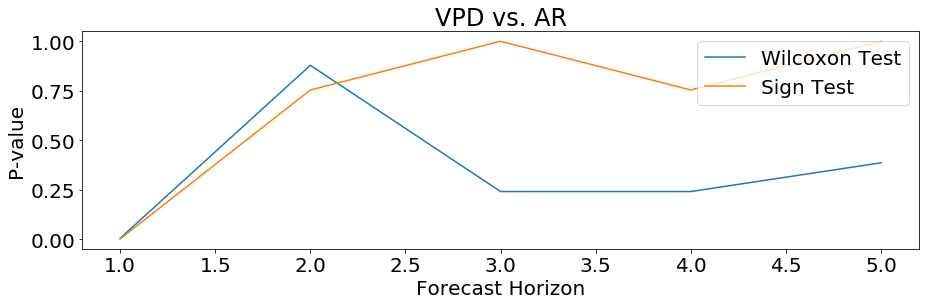

In [1131]:
horizon_results = horizon_results_vpd_vs_ar

plt.plot(range(1,6), [horizon_results[i][0].pvalue for i in range(1,5+1)], label='Wilcoxon Test')
sign_test = [scipy.stats.binom_test(np.sum([s1<s2 for (s1,s2) in zip(horizon_results[i][1][0], horizon_results[i][1][1])]),10) for i in range(1,5+1)]
plt.plot(range(1,6),sign_test, label='Sign Test')
plt.legend()
plt.ylabel('P-value')
plt.xlabel('Forecast Horizon')
plt.title('VPD vs. AR')

In [1122]:
model1 = hurdle_poisson_vpd_ar_active
model2 = hurdle_poisson_ar_active

horizon_results_vpd_ar_vs_ar = year_wilcoxon_sign_test(model1['models'], model2['models'], X_grid_dict_nw)

1
2
3
4
5


Text(0.5,1,'VPD + AR vs. AR')

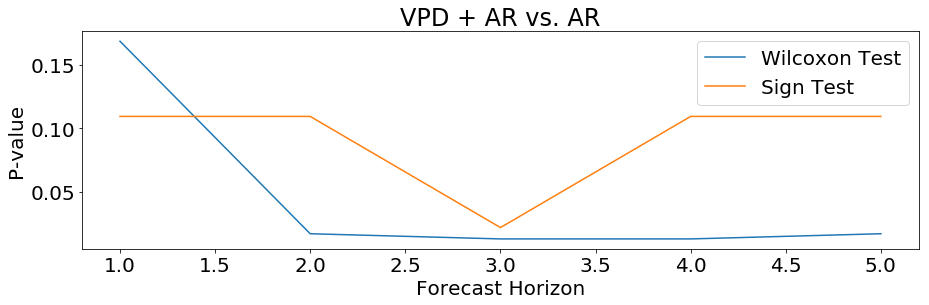

In [1132]:
horizon_results = horizon_results_vpd_ar_vs_ar

plt.plot(range(1,6), [horizon_results[i][0].pvalue for i in range(1,5+1)], label='Wilcoxon Test')
sign_test = [scipy.stats.binom_test(np.sum([s1<s2 for (s1,s2) in zip(horizon_results[i][1][0], horizon_results[i][1][1])]),10) for i in range(1,5+1)]
plt.plot(range(1,6),sign_test, label='Sign Test')
plt.legend()
plt.ylabel('P-value')
plt.xlabel('Forecast Horizon')
plt.title('VPD + AR vs. AR')

In [1125]:
model1 = hurdle_poisson_vpd_ar_active
model2 = hurdle_poisson_humid_temp_ar_active

horizon_results_vpd_ar_vs_temp_humid_ar = year_wilcoxon_sign_test(model1['models'], model2['models'], X_grid_dict_nw)

1
2
3
4
5


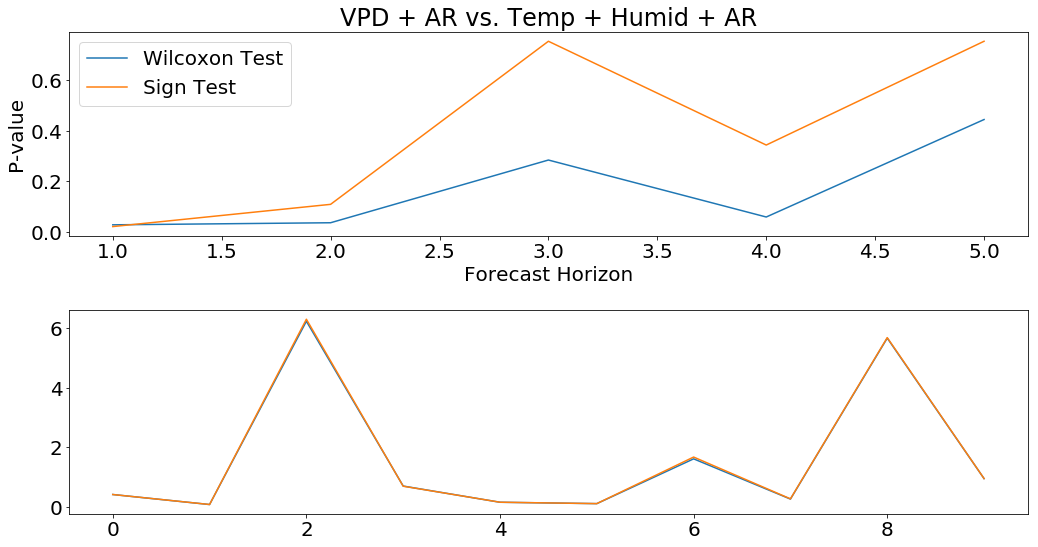

In [1139]:
plt.rcParams['figure.figsize'] = [15,8]

horizon_results = horizon_results_vpd_ar_vs_temp_humid_ar

fig = plt.figure()

ax = fig.add_subplot(2,1,1)

plt.plot(range(1,6), [horizon_results[i][0].pvalue for i in range(1,5+1)], label='Wilcoxon Test')
sign_test = [scipy.stats.binom_test(np.sum([s1<s2 for (s1,s2) in zip(horizon_results[i][1][0], horizon_results[i][1][1])]),10) for i in range(1,5+1)]
plt.plot(range(1,6),sign_test, label='Sign Test')
plt.legend()
plt.ylabel('P-value')
plt.xlabel('Forecast Horizon')
plt.title('VPD + AR vs. Temp + Humid + AR')

ax = fig.add_subplot(2,1,2)

plt.plot(horizon_results[1][1][0])
plt.plot(horizon_results[1][1][1])
plt.tight_layout()

1.90555886534 1.89633926162
2.06876048508 2.05912643181
Sign Test 0.109375
P: 0.0593361198809


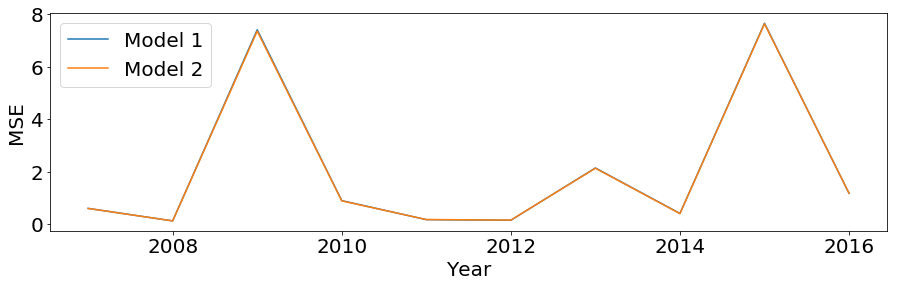

In [1103]:
plt.plot(range(2007,2016+1), samples[0], label='Model 1')
plt.plot(range(2007,2016+1), samples[1], label='Model 2')

plt.legend()
plt.ylabel('MSE')
plt.xlabel('Year')

print(a,b)
print(np.mean(samples[0]), np.mean(samples[1]))

successes = np.sum([s1<s2 for (s1,s2) in zip(samples[0], samples[1])])
print('Sign Test', scipy.stats.binom_test(successes,10))
print('P:', results.pvalue)

In [991]:
%%capture
with open(os.path.join(EXP_DIR, '.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_active_norm = pickle.load(fin)

{'model_structure': 'grid',
 'separated_ignitions': 'active_only',
 'active_model_type': 'hurdle_p',
 'ignition_model_type': 'poisson',
 'covariates': ('vpd',),
 'ignition_covariates_exclude': (),
 'memory_type': 'none',
 'memory_covariates': ('temperature', 'humidity', 'rain', 'wind'),
 'memory_log_covariates': ('num_det',),
 'memory_length': 10,
 'decay_method': 'fixed',
 'decay_values': <FrozenOrderedDict OrderedDict([('default', 0.05), ('num_det', 0.05), ('temperature', 0.25), ('humidity', 0.5), ('rain', 0.25)])>,
 'forecast_method': 'separate',
 'active_check_days': 2,
 'regularization_weight': None,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'fill_method': 'interpolate',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': 5,
 'exposure': False,
 'normalize_params': False,
 'large_fire_split_percent': 0.9}

In [990]:
hurdle_poisson_vpd_ar_active['models'][0][0].afm.model.fit_result_inflated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     np.int32(num_det_target == 0)   No. Observations:                 9122
Model:                                     Logit   Df Residuals:                     9119
Method:                                      MLE   Df Model:                            2
Date:                           Thu, 31 Jan 2019   Pseudo R-squ.:                  0.2274
Time:                                   10:56:31   Log-Likelihood:                -4883.0
converged:                                  True   LL-Null:                       -6320.6
                                                   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5388      0.054     28.591      0.000       1.433       1.644
vpd           -0.9518      0.060    -15.777      0.000      -1.070      -0.834
num_det       -0.7120      0.019    -37.494      0.000      -0.749      -0.675
==============================================================================
"""

In [284]:
pred_dict = {k: poisson_ar_weather['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [136]:
pred_dict_hurdle_active = {k: hurdle_active_all['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [285]:
pred_dict_aug = {k: persistence_aug['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

-1.0 1.0 0.09847993319705049
-1.0 1.0 0.10510787221579548
-1.0 1.0 0.10371262118624489
-1.0 1.0 0.10075202273388338
-1.0 1.0 0.10002896272120125


In [947]:
pred_dict_mean = {k: mean_model['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

(1996500, 80)
(1996500, 80)
(1996500, 80)
(1996500, 80)
(1996500, 80)


In [309]:
pred_dict_weather_only = {k: poisson_weather_only['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [142]:
pred_dict_mlp_64 = {k: mlp_64_vpd_ar_active['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2]}

Poisson (+1) MSE: 947665.899313
Persistence (+1) MSE: 2958740.800000
Poisson (+1) MSE: 0.118126
Persistence (+1) MSE: 0.152076


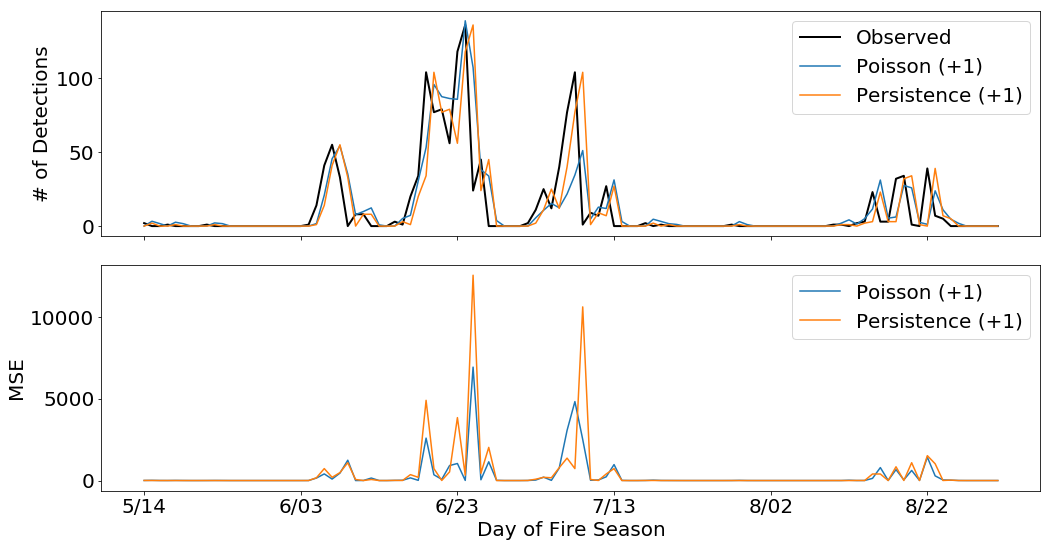

In [282]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(2,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2012
T_K = 1


start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))

plt.plot(fire_days, color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days, label='Poisson (+%d)' % T_K)
plt.plot(persistence_days, label='Persistence (+%d)' % T_K)


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
plt.setp(ax.get_xticklabels(), visible=False)


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()

ax = fig.add_subplot(2,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - persistence_days)**2

plt.plot(diff1, label='Poisson (+%d)' % T_K)
plt.plot(diff2, label='Persistence (+%d)' % T_K)

_ = plt.xticks(ticks_pos, date_strings[::20])

#plt.axhline(linewidth=1, linestyle='--', color='black')


plt.xlabel('Day of Fire Season')
plt.ylabel('MSE')
plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, np.mean(diff1**2)))
print('Persistence (+%d) MSE: %f' % ((T_K), np.mean(diff2**2)))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - persistence_pred)**2)
print('Poisson (+%d) MSE: %f' % (T_K, mse_1))
print('Persistence (+%d) MSE: %f' % ((T_K), mse_2))

"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.xlabel('Day of Fire Season')
plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

fig.tight_layout()

Poisson (+3) RMSE: 1142.347126
Persistence (+3) RMSE: 1102.812876
Poisson (+3) RMSE: 2.760223
Persistence (+3) RMSE: 2.762236


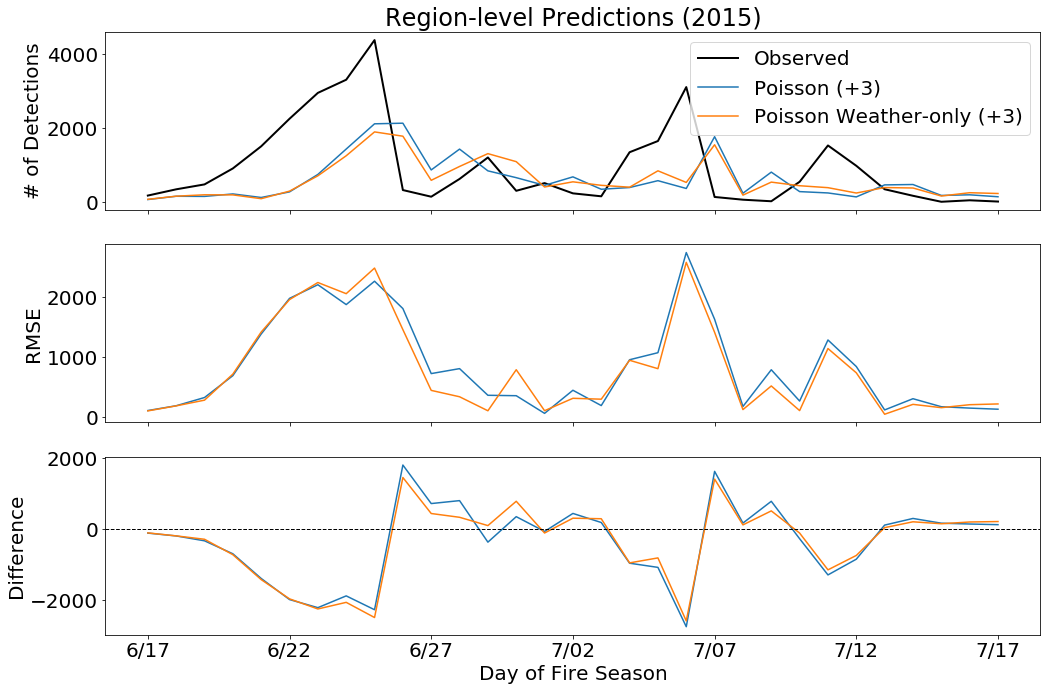

In [1207]:
plt.rcParams['figure.figsize'] = [15,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(3,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 3

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

#pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
pred_year2 = pred_dict_weather_only[T_K][:,:,start_ind:end_ind]

shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='Poisson (+%d)' % T_K)
plt.plot(pred_days2[OFF1:OFF2], label='Poisson Weather-only (+%d)' % (T_K))


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
plt.setp(ax.get_xticklabels(), visible=False)


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Region-level Predictions (%d)' % YEAR)

ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2


plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Poisson Weather-only (+%d)' % (T_K))

plt.setp(ax.get_xticklabels(), visible=False)



plt.ylabel('RMSE')

ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
plt.plot(diff2_[OFF1:OFF2], label='Poisson Weather-only (+%d)' % (T_K))

plt.axhline(linewidth=1, linestyle='--', color='black')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))

"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.xlabel('Day of Fire Season')
plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

fig.tight_layout()

Poisson (+1) RMSE: 902.869877
Poisson (+3) RMSE: 988.397524
Poisson (+5) RMSE: 1209.444644
Poisson (+1) RMSE: 2.372297
Persistence (+1) RMSE: 2.565586


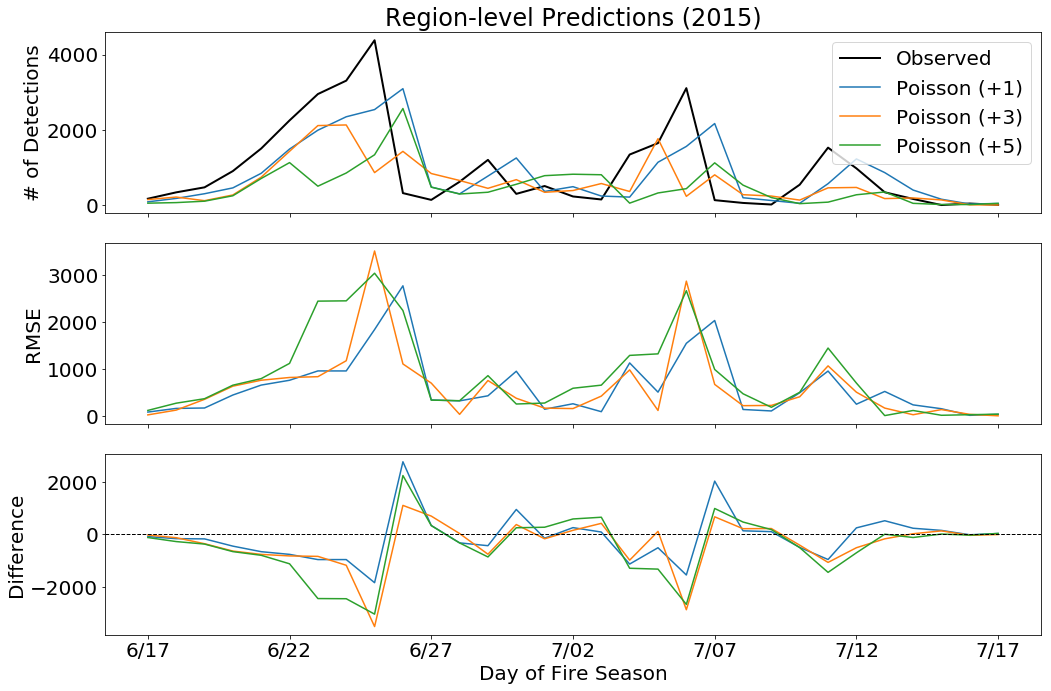

In [1025]:
plt.rcParams['figure.figsize'] = [15,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(3,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

#pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
pred_year2 = pred_dict[T_K+2][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

pred_year3 = pred_dict[T_K+4][:,:,start_ind:end_ind]
shifted_pred3 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year3[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))
pred_days3 = np.sum(shifted_pred3, axis=(0,1))

plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='Poisson (+%d)' % T_K)
plt.plot(pred_days2[OFF1:OFF2], label='Poisson (+%d)' % (T_K+2))
plt.plot(pred_days3[OFF1:OFF2], label='Poisson (+%d)' % (T_K+4))


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
plt.setp(ax.get_xticklabels(), visible=False)


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Region-level Predictions (%d)' % YEAR)

ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2
diff3 = (fire_days - pred_days3)**2



plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Poisson (+%d)' % (T_K+2))
plt.plot(np.sqrt(diff3[OFF1:OFF2]), label='Poisson (+%d)' % (T_K+4))


plt.setp(ax.get_xticklabels(), visible=False)



plt.ylabel('RMSE')

ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)
diff3_ = (pred_days3 - fire_days)


plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
plt.plot(diff2_[OFF1:OFF2], label='Poisson (+%d)' % (T_K+2))
plt.plot(diff3_[OFF1:OFF2], label='Poisson (+%d)' % (T_K+4))


plt.axhline(linewidth=1, linestyle='--', color='black')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(np.mean(diff1[OFF1:OFF2]))))
print('Poisson (+%d) RMSE: %f' % ((T_K+2), np.sqrt(np.mean(diff2[OFF1:OFF2]))))
print('Poisson (+%d) RMSE: %f' % ((T_K+4), np.sqrt(np.mean(diff3[OFF1:OFF2]))))


mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))

"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.xlabel('Day of Fire Season')
plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

fig.tight_layout()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:102: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


Poisson (+1) MSE: 1124817.789007
Persistence (+1) MSE: 1016121.940217
Poisson (+1) RMSE: 3.214383
Persistence (+1) RMSE: 2.690767


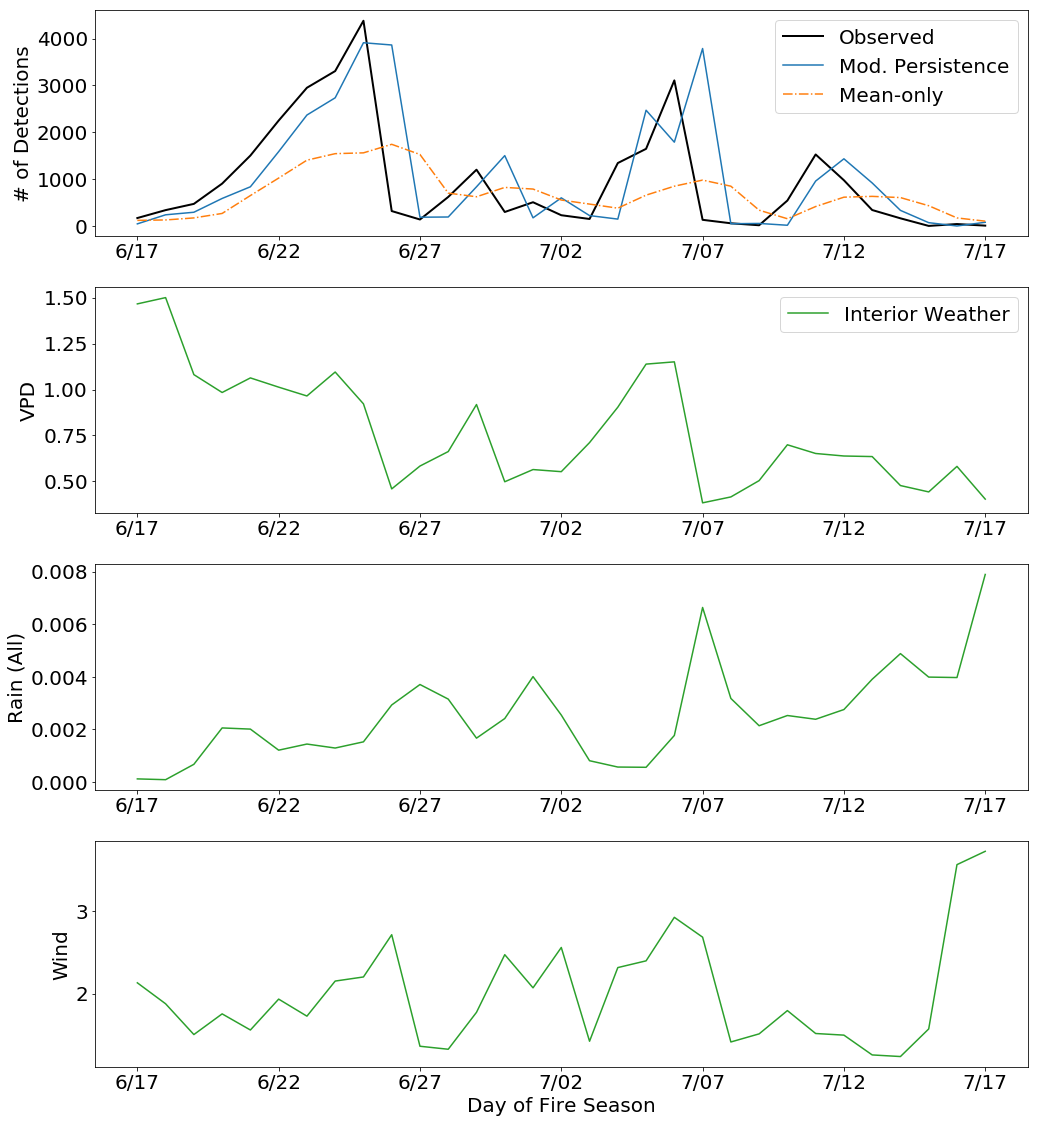

In [953]:
plt.rcParams['figure.figsize'] = [15,16]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(4,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

# YEAR = 2009
# T_K = 1

# OFF1 = 56
# OFF2 = -22

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict_aug[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict_mean[T_K][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='Mod. Persistence')
plt.plot(pred_days2[OFF1:OFF2], '-.', label='Mean-only')


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
#plt.setp(ax.get_xticklabels(), visible=False)

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
#plt.title('Region-level Predictions (%d)' % YEAR)

ax = fig.add_subplot(4,1,2)

vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.plot(vpd, '-', label='Interior Weather')
#plt.plot(vpd_all, '-', label='All Weather')
plt.legend()
plt.ylabel('VPD')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

ax = fig.add_subplot(4,1,3)
vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.ylabel('Rain (Interior)')
plt.plot(vpd, '-', label='Rain (Interior)')
#ax2 = ax.twinx()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[3:])
#plt.plot(vpd_all, '-', label='Rain_All')
plt.ylabel('Rain (All)')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])


ax = fig.add_subplot(4,1,4)
vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].wind.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.plot(vpd, '-', label='Wind')
#plt.plot(vpd_all, '-', label='Wind_All')
plt.ylabel('Wind')
#ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2


#plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
#plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))





#plt.ylabel('RMSE')

#ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

#plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
#plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

#plt.axhline(linewidth=1, linestyle='--', color='black')



#plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, (np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) MSE: %f' % ((T_K), (np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

plt.xlabel('Day of Fire Season')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])
fig.tight_layout()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


Poisson (+1) MSE: 798405.815419
Persistence (+1) MSE: 803921.281209
Poisson (+1) RMSE: 2.373983
Persistence (+1) RMSE: 2.378896


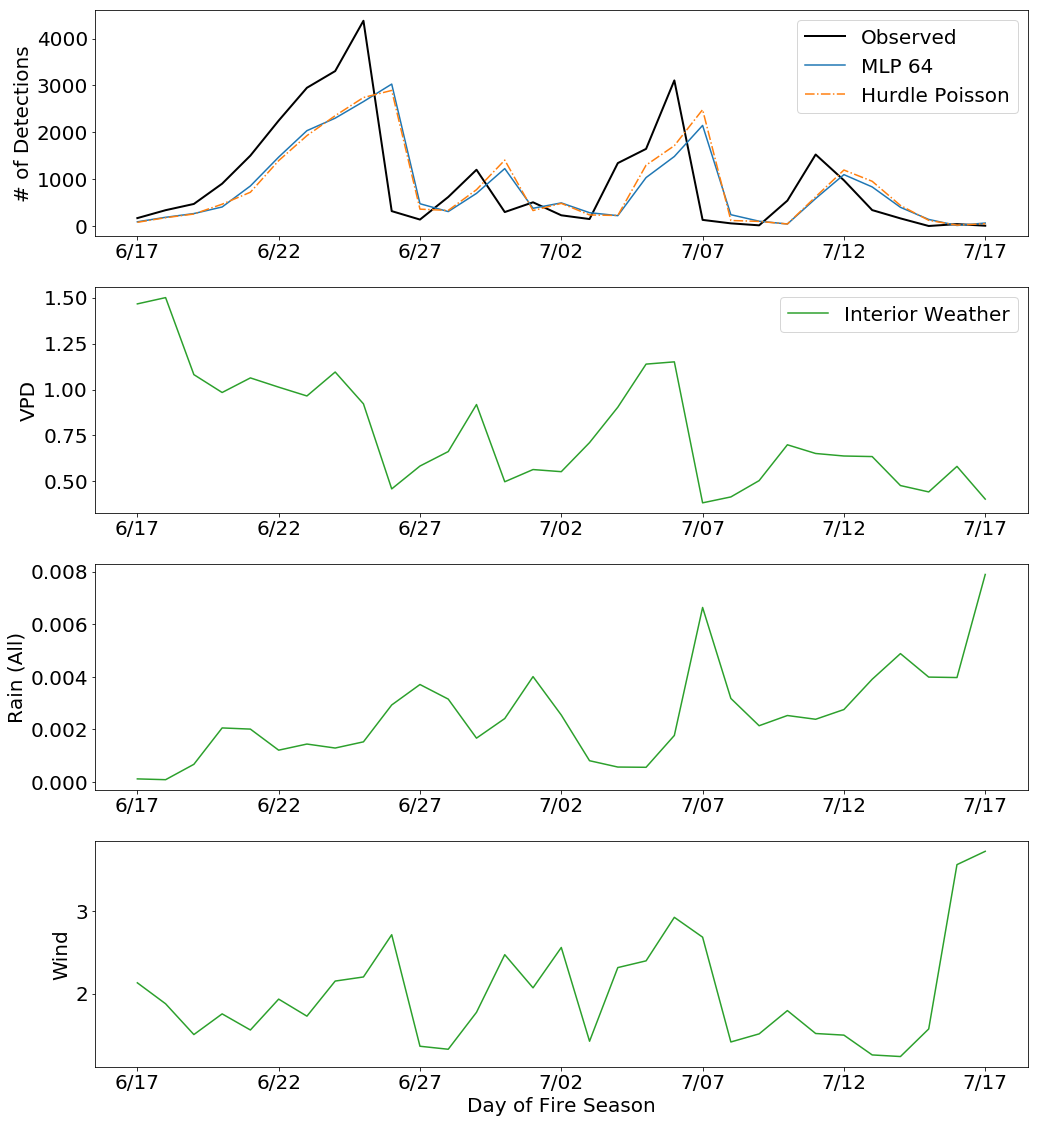

In [143]:
plt.rcParams['figure.figsize'] = [15,16]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(4,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

# YEAR = 2009
# T_K = 1

# OFF1 = 56
# OFF2 = -22

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict_mlp_64[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='MLP 64')
plt.plot(pred_days2[OFF1:OFF2], '-.', label='Hurdle Poisson')


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
#plt.setp(ax.get_xticklabels(), visible=False)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
#plt.title('Region-level Predictions (%d)' % YEAR)

ax = fig.add_subplot(4,1,2)

vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.plot(vpd, '-', label='Interior Weather')
#plt.plot(vpd_all, '-', label='All Weather')
plt.legend()
plt.ylabel('VPD')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

ax = fig.add_subplot(4,1,3)
vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.ylabel('Rain (Interior)')
plt.plot(vpd, '-', label='Rain (Interior)')
#ax2 = ax.twinx()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[3:])
#plt.plot(vpd_all, '-', label='Rain_All')
plt.ylabel('Rain (All)')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])


ax = fig.add_subplot(4,1,4)
vpd_all = np.mean(X_grid_dict_nw[1][0].vpd.values[:,:,start_ind:end_ind], axis=(0,1))[OFF1:OFF2]
vpd = np.mean(X_grid_dict_nw[1][0].wind.values[alaska_interior_mask][:,start_ind:end_ind], axis=(0))[OFF1:OFF2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.gca().set_color_cycle(colors[2:])
plt.plot(vpd, '-', label='Wind')
#plt.plot(vpd_all, '-', label='Wind_All')
plt.ylabel('Wind')
#ax = fig.add_subplot(3,1,2)





#plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
#plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))





#plt.ylabel('RMSE')

#ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

#plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
#plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

#plt.axhline(linewidth=1, linestyle='--', color='black')



#plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, (np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) MSE: %f' % ((T_K), (np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

plt.xlabel('Day of Fire Season')

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])
fig.tight_layout()

NameError: name 'pred_dict_hurdle_active' is not defined

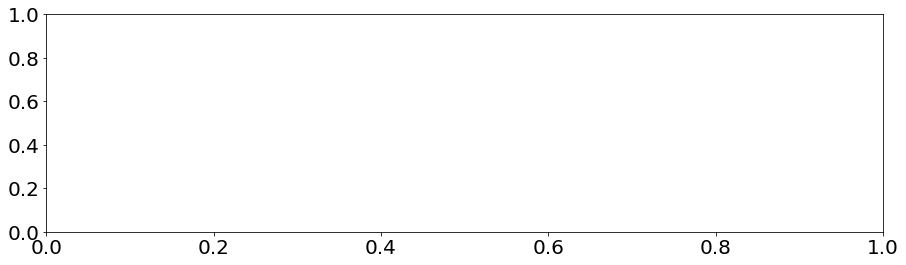

In [1406]:
plt.rcParams['figure.figsize'] = [15,4]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='Poisson Hurdle')
plt.plot(pred_days2[OFF1:OFF2], '-.', label='Mod. Persist')


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
#plt.setp(ax.get_xticklabels(), visible=False)

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
#plt.title('Region-level Predictions (%d)' % YEAR)


#ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2


#plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
#plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

#plt.setp(ax.get_xticklabels(), visible=False)



#plt.ylabel('RMSE')

#ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

#plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
#plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

#plt.axhline(linewidth=1, linestyle='--', color='black')



#plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, (np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) MSE: %f' % ((T_K), (np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

plt.xlabel('Day of Fire Season')


fig.tight_layout()

1: 236597.444935, 2: 234333.089060
Poisson (+1) MSE: 815174.014788
Persistence (+1) MSE: 803921.281209
Poisson (+1) RMSE: 2.372297
Persistence (+1) RMSE: 2.378896


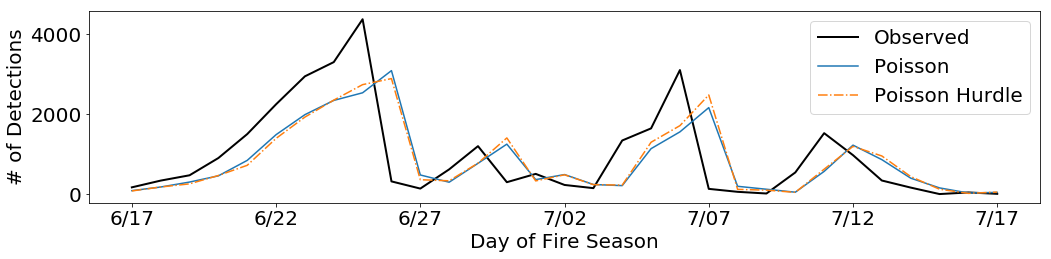

In [598]:
plt.rcParams['figure.figsize'] = [15,4]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days[OFF1:OFF2], label='Poisson')
plt.plot(pred_days2[OFF1:OFF2], '-.', label='Poisson Hurdle')


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
#plt.setp(ax.get_xticklabels(), visible=False)

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
#plt.title('Region-level Predictions (%d)' % YEAR)


#ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2

print('1: %f, 2: %f' % (np.mean(diff1), np.mean(diff2)))


#plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
#plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

#plt.setp(ax.get_xticklabels(), visible=False)



#plt.ylabel('RMSE')

#ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

#plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
#plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

#plt.axhline(linewidth=1, linestyle='--', color='black')



#plt.ylabel('Difference')
plt.xlabel('Day of Fire Season')

#plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, (np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) MSE: %f' % ((T_K), (np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

plt.xlabel('Day of Fire Season')


fig.tight_layout()

YEAR=2007
Poisson (+1) MSE: 1.094050
Aug Persistence (+1) MSE: 1.484196
Persistence (+1) MSE: 1.949045
YEAR=2008
Poisson (+1) MSE: 0.183685
Aug Persistence (+1) MSE: 0.218463
Persistence (+1) MSE: 0.289369
YEAR=2009
Poisson (+1) MSE: 70.531072
Aug Persistence (+1) MSE: 143.830853
Persistence (+1) MSE: 103.074005
YEAR=2010
Poisson (+1) MSE: 3.039795
Aug Persistence (+1) MSE: 4.095055
Persistence (+1) MSE: 3.702798
YEAR=2011
Poisson (+1) MSE: 1.332042
Aug Persistence (+1) MSE: 1.477374
Persistence (+1) MSE: 1.341384
YEAR=2012
Poisson (+1) MSE: 0.353411
Aug Persistence (+1) MSE: 0.584593
Persistence (+1) MSE: 0.545719
YEAR=2013
Poisson (+1) MSE: 5.100998
Aug Persistence (+1) MSE: 6.805412
Persistence (+1) MSE: 7.953629
YEAR=2014
Poisson (+1) MSE: 0.751095
Aug Persistence (+1) MSE: 0.581092
Persistence (+1) MSE: 0.725687
YEAR=2015
Poisson (+1) MSE: 171.091929
Aug Persistence (+1) MSE: 242.746298
Persistence (+1) MSE: 240.464436
YEAR=2016
Poisson (+1) MSE: 13.074806
Aug Persistence (+1) MSE

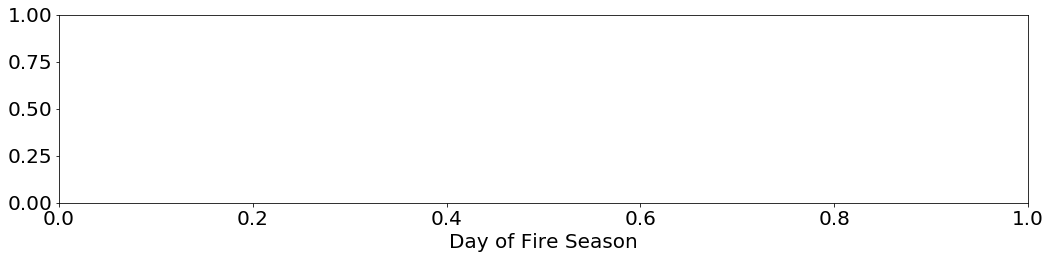

In [979]:
plt.rcParams['figure.figsize'] = [15,4]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))

poisson_all = []
aug_persist_all = []
persist_all = []

for YEAR in YEARS:
    print('YEAR=%d' % YEAR)
    T_K = 1

    OFF1 = 0
    OFF2 = -1

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

    pred_year = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
    shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    persistence_days = np.sum(persistence_pred, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))
    pred_days2 = np.sum(shifted_pred2, axis=(0,1))


    #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
    #plt.plot(pred_days[OFF1:OFF2], label='Poisson')
    #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')


    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
    date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
    #_ = plt.xticks(ticks_pos, date_strings[::20])
    #plt.setp(ax.get_xticklabels(), visible=False)

    #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
    #_ = plt.xticks(ticks_pos)
    #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

    #plt.xlabel('Day of Fire Season')
    #plt.ylabel('# of Detections')
    #plt.legend()
    ##plt.title('Region-level Predictions (%d)' % YEAR)


    #ax = fig.add_subplot(3,1,2)


    diff1 = ((fire_days - pred_days)**2)[persistence_days>0]
    diff2 = ((fire_days - pred_days2)**2)[persistence_days>0]
    diff_persistence = ((fire_days - persistence_days)**2)[persistence_days>0]

    #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
    #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

    #plt.setp(ax.get_xticklabels(), visible=False)



    #plt.ylabel('RMSE')

    #ax = fig.add_subplot(3,1,3)

    diff1_ = (pred_days - fire_days)
    diff2_ = (pred_days2 - fire_days)

    #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
    #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

    #plt.axhline(linewidth=1, linestyle='--', color='black')



    #plt.ylabel('Difference')
    #plt.xlabel('Day of Fire Season')

    #plt.legend()


    
    pois = (np.mean(diff1[OFF1:OFF2])/(33*55))
    aug_pers = (np.mean(diff2[OFF1:OFF2])/(33*55))
    pers = (np.mean(diff_persistence[OFF1:OFF2])/(33*55))
    
    poisson_all.append(pois)
    aug_persist_all.asinppend(aug_pers)
    persist_all.append(pers)
    
    print('Poisson (+%d) MSE: %f' % (T_K, pois))
    print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
    print('Persistence (+%d) MSE: %f' % ((T_K), pers))


    mse_1 = np.mean((fire_year - shifted_pred)**2)
    mse_2 = np.mean((fire_year - shifted_pred2)**2)
    #print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
    #print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
    """
    pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

    diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


    pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    #plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

    diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

    plt.xlabel('Day of Fire Season')
    plt.ylabel('# of Detections')
    plt.legend()
    plt.title('Detections in %d'% YEAR)

    #plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
    plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
    #plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



    plt.ylabel('$\Delta$ # of Detections')
    plt.legend()
    plt.title('Differences of Detections in %d'% YEAR)



    """

    plt.xlabel('Day of Fire Season')


    fig.tight_layout()
    
print('Poisson Mean MSE: %f' % np.mean(poisson_all))
print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
print('Pers Mean MSE: %f' % np.mean(persist_all))

print('Poisson STD MSE: %f' % np.std(poisson_all))
print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
print('Pers Mean STD: %f' % np.std(persist_all))

persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                   #aug_persist_all,
                   poisson_all), tablefmt='latex_raw'))

YEAR=2007
Poisson (+5) MSE: 1.892164
Aug Persistence (+5) MSE: 1.886218
Persistence (+5) MSE: 3.879071
YEAR=2008
Poisson (+5) MSE: 0.189783
Aug Persistence (+5) MSE: 0.192558
Persistence (+5) MSE: 0.327419
YEAR=2009
Poisson (+5) MSE: 78.522674
Aug Persistence (+5) MSE: 80.549704
Persistence (+5) MSE: 141.053696
YEAR=2010
Poisson (+5) MSE: 6.084391
Aug Persistence (+5) MSE: 6.164672
Persistence (+5) MSE: 10.874598
YEAR=2011
Poisson (+5) MSE: 0.750592
Aug Persistence (+5) MSE: 0.791952
Persistence (+5) MSE: 1.395385
YEAR=2012
Poisson (+5) MSE: 0.267416
Aug Persistence (+5) MSE: 0.264439
Persistence (+5) MSE: 0.639381
YEAR=2013
Poisson (+5) MSE: 8.734354
Aug Persistence (+5) MSE: 8.460554
Persistence (+5) MSE: 17.242298
YEAR=2014
Poisson (+5) MSE: 0.635012
Aug Persistence (+5) MSE: 0.631657
Persistence (+5) MSE: 0.866631
YEAR=2015
Poisson (+5) MSE: 264.430243
Aug Persistence (+5) MSE: 271.580557
Persistence (+5) MSE: 440.206758
YEAR=2016
Poisson (+5) MSE: 12.585515
Aug Persistence (+5) MS

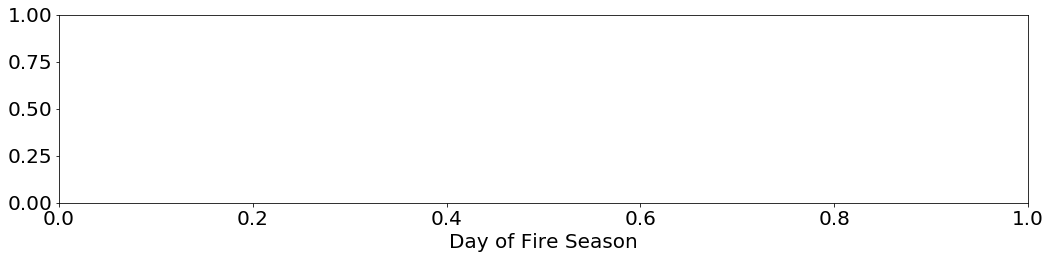

In [982]:
plt.rcParams['figure.figsize'] = [15,4]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))

poisson_all = []
aug_persist_all = []
persist_all = []

for YEAR in YEARS:
    print('YEAR=%d' % YEAR)
    T_K = 5

    OFF1 = 0
    OFF2 = -1

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

    pred_year = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    pred_year2 = pred_dict[T_K][:,:,start_ind:end_ind]
    shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    persistence_days = np.sum(persistence_pred, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))
    pred_days2 = np.sum(shifted_pred2, axis=(0,1))


    #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
    #plt.plot(pred_days[OFF1:OFF2], label='Poisson')
    #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')


    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
    date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
    #_ = plt.xticks(ticks_pos, date_strings[::20])
    #plt.setp(ax.get_xticklabels(), visible=False)

    #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
    #_ = plt.xticks(ticks_pos)
    #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

    #plt.xlabel('Day of Fire Season')
    #plt.ylabel('# of Detections')
    #plt.legend()
    ##plt.title('Region-level Predictions (%d)' % YEAR)


    #ax = fig.add_subplot(3,1,2)


    diff1 = (fire_days - pred_days)**2
    diff2 = (fire_days - pred_days2)**2
    diff_persistence = (fire_days - persistence_days)**2

    #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
    #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

    #plt.setp(ax.get_xticklabels(), visible=False)



    #plt.ylabel('RMSE')

    #ax = fig.add_subplot(3,1,3)

    diff1_ = (pred_days - fire_days)
    diff2_ = (pred_days2 - fire_days)

    #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
    #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

    #plt.axhline(linewidth=1, linestyle='--', color='black')



    #plt.ylabel('Difference')
    #plt.xlabel('Day of Fire Season')

    #plt.legend()


    
    pois = (np.mean(diff1[OFF1:OFF2])/(33*55))
    aug_pers = (np.mean(diff2[OFF1:OFF2])/(33*55))
    pers = (np.mean(diff_persistence[OFF1:OFF2])/(33*55))
    
    poisson_all.append(pois)
    aug_persist_all.append(aug_pers)
    persist_all.append(pers)
    
    print('Poisson (+%d) MSE: %f' % (T_K, pois))
    print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
    print('Persistence (+%d) MSE: %f' % ((T_K), pers))


    mse_1 = np.mean((fire_year - shifted_pred)**2)
    mse_2 = np.mean((fire_year - shifted_pred2)**2)
    #print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
    #print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
    """
    pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

    diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


    pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    #plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

    diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

    plt.xlabel('Day of Fire Season')
    plt.ylabel('# of Detections')
    plt.legend()
    plt.title('Detections in %d'% YEAR)

    #plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
    plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
    #plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



    plt.ylabel('$\Delta$ # of Detections')
    plt.legend()
    plt.title('Differences of Detections in %d'% YEAR)



    """

    plt.xlabel('Day of Fire Season')


    fig.tight_layout()
    
print('Poisson Mean MSE: %f' % np.mean(poisson_all))
print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
print('Pers Mean MSE: %f' % np.mean(persist_all))

print('Poisson STD MSE: %f' % np.std(poisson_all))
print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
print('Pers Mean STD: %f' % np.std(persist_all))

persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

print(tabulate(zip(YEARS+['Mean', 'Std. Dev'],
                   #aug_persist_all,
                   persist_all,
                   poisson_all), tablefmt='latex_raw'))

In [430]:
persist_all = np.round(persist_all, 2)
aug_persist_all = np.round(aug_persist_all, 2)
poisson_all = np.round(poisson_all, 2)

print(tabulate(zip(YEARS, persist_all, aug_persist_all, poisson_all), tablefmt='latex_raw'))

\begin{tabular}{rrrr}
\hline
 2007 &   1.59 &   1.21 &   1.01 \\
 2008 &   0.14 &   0.11 &   0.1  \\
 2009 &  83.22 & 116.12 &  61.16 \\
 2010 &   3.23 &   3.57 &   2.59 \\
 2011 &   0.62 &   0.68 &   0.61 \\
 2012 &   0.25 &   0.27 &   0.17 \\
 2013 &   6.28 &   5.37 &   4.25 \\
 2014 &   0.35 &   0.28 &   0.35 \\
 2015 & 183.12 & 184.86 & 131.55 \\
 2016 &  13.04 &  10.6  &   8.06 \\
\hline
\end{tabular}


Poisson (+1) MSE: 947665.899313
Persistence (+1) MSE: 1600686.162161
Poisson (+1) MSE: 0.118126
Persistence (+1) MSE: 0.146192


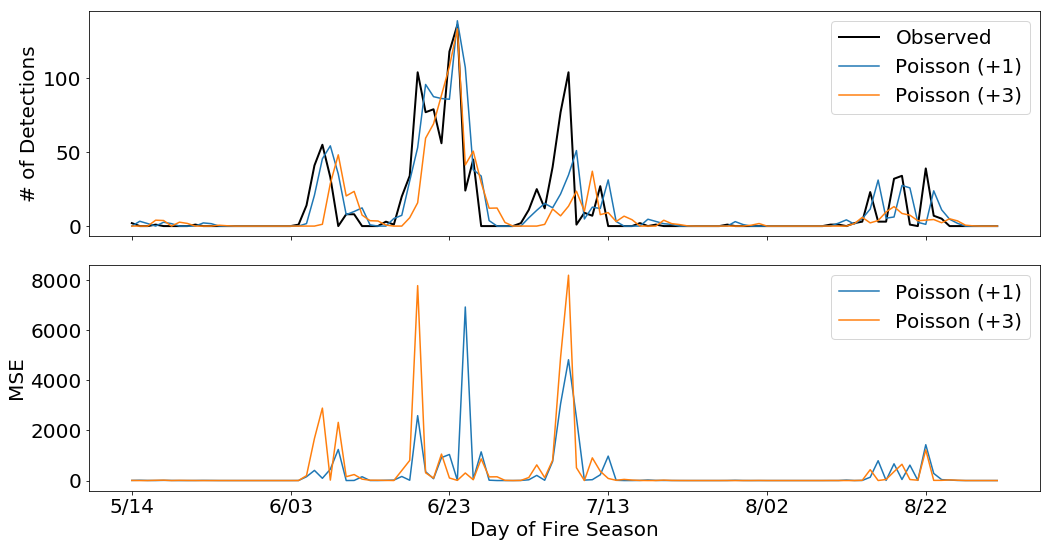

In [287]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(2,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2012
T_K = 1


start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict[T_K+2][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K+2)),pred_year2[:,:,:-(T_K+2)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days, color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days, label='Poisson (+%d)' % T_K)
plt.plot(pred_days2, label='Poisson (+%d)' % (T_K+2))


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
plt.setp(ax.get_xticklabels(), visible=False)


#plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()

ax = fig.add_subplot(2,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2

plt.plot(diff1, label='Poisson (+%d)' % T_K)
plt.plot(diff2, label='Poisson (+%d)' % (T_K+2))

_ = plt.xticks(ticks_pos, date_strings[::20])

#plt.axhline(linewidth=1, linestyle='--', color='black')


plt.xlabel('Day of Fire Season')
plt.ylabel('MSE')
plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, np.mean(diff1**2)))
print('Persistence (+%d) MSE: %f' % ((T_K), np.mean(diff2**2)))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) MSE: %f' % (T_K, mse_1))
print('Persistence (+%d) MSE: %f' % ((T_K), mse_2))

"""
pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
pred = np.reshape(np.array(pred), (33,55,-1))
pred = np.sum(pred, axis=(0,1))
start_ind = 0+110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))
#plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

plt.xlabel('Day of Fire Season')
plt.ylabel('# of Detections')
plt.legend()
plt.title('Detections in %d'% YEAR)

#plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

ax = fig.add_subplot(2,1,2)

plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
#plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



plt.xlabel('Day of Fire Season')
plt.ylabel('$\Delta$ # of Detections')
plt.legend()
plt.title('Differences of Detections in %d'% YEAR)



"""

fig.tight_layout()

In [337]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

poisson_rmse = []
fire = X_grid_dict_nw[1][0].num_det.values

#fig = plt.figure()
for YEAR in range(2007,2016+1):
    T_K = 5

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    pred_year = pred_dict[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))

    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day

    diff1 = (fire_days - pred_days)**2
    
    """
    ax = fig.add_subplot(2,1,1)
    
    plt.plot(fire_days)
    plt.plot(pred_days)
    
    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1)
    """
    
    poisson_rmse.append(np.sqrt(np.mean(diff1)))
    print('Poisson (+%d) %d RMSE: %f' % (T_K, YEAR, np.sqrt(np.mean(diff1))))

Poisson (+5) 2007 RMSE: 58.261374
Poisson (+5) 2008 RMSE: 18.761611
Poisson (+5) 2009 RMSE: 380.616135
Poisson (+5) 2010 RMSE: 105.420917
Poisson (+5) 2011 RMSE: 37.740229
Poisson (+5) 2012 RMSE: 21.808090
Poisson (+5) 2013 RMSE: 123.354445
Poisson (+5) 2014 RMSE: 33.705254
Poisson (+5) 2015 RMSE: 698.883131
Poisson (+5) 2016 RMSE: 150.612039


In [338]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

per_aug_rmse = []

fire = X_grid_dict_nw[1][0].num_det.values

#fig = plt.figure()
for YEAR in range(2007,2016+1):
    T_K = 5

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    pred_year = pred_dict_aug[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))

    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day

    diff1 = (fire_days - pred_days)**2
    
    """
    ax = fig.add_subplot(2,1,1)
    
    plt.plot(fire_days)
    plt.plot(pred_days)
    
    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1)
    """
    per_aug_rmse.append(np.sqrt(np.mean(diff1)))
    print('Pers. Aug (+%d) %d RMSE: %f' % (T_K, YEAR, np.sqrt(np.mean(diff1))))

Pers. Aug (+5) 2007 RMSE: 67.391588
Pers. Aug (+5) 2008 RMSE: 20.683295
Pers. Aug (+5) 2009 RMSE: 354.845510
Pers. Aug (+5) 2010 RMSE: 114.173992
Pers. Aug (+5) 2011 RMSE: 44.727471
Pers. Aug (+5) 2012 RMSE: 28.503537
Pers. Aug (+5) 2013 RMSE: 145.326989
Pers. Aug (+5) 2014 RMSE: 31.768680
Pers. Aug (+5) 2015 RMSE: 796.204026
Pers. Aug (+5) 2016 RMSE: 169.297269


In [339]:
plt.rcParams['figure.figsize'] = [15,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

poisson_weather_rmse = []
fire = X_grid_dict_nw[1][0].num_det.values

#fig = plt.figure()
for YEAR in range(2007,2016+1):
    T_K = 5

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    pred_year = pred_dict_weather_only[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))

    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day

    diff1 = (fire_days - pred_days)**2
    
    """
    ax = fig.add_subplot(2,1,1)
    
    plt.plot(fire_days)
    plt.plot(pred_days)
    
    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1)
    """
    poisson_weather_rmse.append(np.sqrt(np.mean(diff1)))
    print('Poisson (+%d) %d RMSE: %f' % (T_K, YEAR, np.sqrt(np.mean(diff1))))

Poisson (+5) 2007 RMSE: 55.580528
Poisson (+5) 2008 RMSE: 18.295246
Poisson (+5) 2009 RMSE: 400.200175
Poisson (+5) 2010 RMSE: 103.886083
Poisson (+5) 2011 RMSE: 36.621256
Poisson (+5) 2012 RMSE: 21.172011
Poisson (+5) 2013 RMSE: 116.140568
Poisson (+5) 2014 RMSE: 33.948253
Poisson (+5) 2015 RMSE: 683.311193
Poisson (+5) 2016 RMSE: 150.244386


PA 177.292235634
WE 161.939969821
P 162.916322537


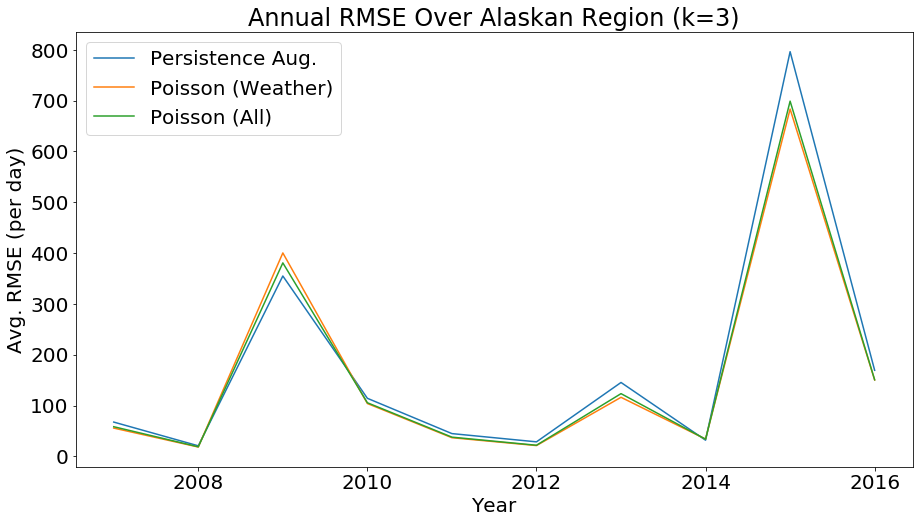

In [340]:
plt.plot(range(2007,2016+1), per_aug_rmse, label='Persistence Aug.')
plt.plot(range(2007,2016+1), poisson_weather_rmse, label='Poisson (Weather)')
plt.plot(range(2007,2016+1), poisson_rmse, label='Poisson (All)')

print('PA', np.mean(per_aug_rmse))
print('WE', np.mean(poisson_weather_rmse))
print('P', np.mean(poisson_rmse))

plt.xlabel('Year')
plt.ylabel('Avg. RMSE (per day)')
plt.title('Annual RMSE Over Alaskan Region (k=3)')
plt.legend()

In [1101]:
def build_df(data, observed):
    vars = ['temperature', 'humidity', 'wind', 'rain', 'vpd']
    df = pd.DataFrame()
    
    for i,o in enumerate(observed):
        df['num_det_%d'%i] = np.array(o)
    
    for v in vars:
        df[v+'_0'] = data[0][v+'_1'].values
    
    for i,d in enumerate(data[1:]):
        for v in vars:
            df[v+'_%d'%(i+1)] = d[v].values 
            
    return df

def add_pred(df, d):
    for k,(pred,zeros) in d.items():
        for i in range(len(pred)):
            df[k+'_pred_%d'%i] = np.array(pred[i])
            df[k+'_zeros_%d'%i] = np.array(zeros[i])
    return df

In [1102]:
def build_forecast_dict(df, models):
    forecast_dict = {}
    for m in models:
        pred = []
        zero = []
        for i in range(6):
            pred.append(df[m+'_pred_%d'%i])
            zero.append(df[m+'_zeros_%d'%i])

        forecast_dict[m] = (pred, zero)

    observed = []
    for i in range(6):
        observed.append(df['num_det_%d'%i])

    return forecast_dict, observed

In [1351]:
from helper.multidata_wrapper import MultidataWrapper
import scipy.stats
# Simulate
def simulate_day_new(params, model, random, poisson, hurdle):
    #pred = model.predict(params)
    #return pred, np.zeros_like(pred)

    if hurdle:
        pred, rem = model.predict(params, choice='all')
        pi, lam = rem[0]
        if random:
            out = np.random.poisson(lam) * np.random.binomial(1, pi)
            pi = out==0
        else:
            out = pred
            pi = (1-pi)
    elif poisson:
        lam = model.predict(params).values
        if random:
            out = np.random.poisson(lam)
            pi = out==0
        else:
            out = lam            
            pi = scipy.stats.poisson.pmf(0,lam)
            
    else:
        lam = model.predict(params).values
        pi = np.sum(lam==0)/len(lam)
        out = lam

    return out, pi

def simulate_new(params, models, days, random, val_range=None, poisson=True, hurdle=False, start_day=1, filter=True):
    if filter:
        if start_day == 0:
            sel = params[1]['active']
        elif start_day == 1:
            sel = (params[1]['num_det_2'] == 0) & (params[1]['num_det_1'] == 0) & (params[1]['num_det'] != 0) 
        elif start_day == 2:
            sel = (params[1]['num_det_2'] == 0) & (params[1]['num_det_1'] != 0) & (params[1]['num_det'] != 0) 

        if val_range:
            sel &= (np.isin(params[1]['num_det'].values, val_range))

        df = params[1][sel]
    else:
        df = params[1]
    
    pred = [df['num_det'].values]
    zero = [np.zeros(df['num_det'].values.shape)]
    observed = [df['num_det'].values]
    data = [df]
    
    for d in range(1, days+1):
        if filter:
            df = params[d][sel]
        else:
            df = params[d]
        param = MultidataWrapper((df, df))
        
        model = models[d]
        p, z = simulate_day_new(param, model, random, poisson, hurdle)
        pred.append(p)
        zero.append(z)
        observed.append(df['num_det_target'].values)
        data.append(df)
    
    return pred, observed, zero, data

In [1319]:
# Display simulation
def without_zeros(arr):
    new_arr = [arr[0]]
    for i in range(1, len(arr)):
        ind = arr[i-1]!=0
        new_arr.append(arr[i][ind])
        
    return np.array(new_arr)
def display_simulation(pred_dict, observed, with_zeros=True, data=None, covars=None, covar_means=None, markers=None, colors=None, label_pad=None):
    x = range(len(observed))
    
    fig = plt.figure()
    if data is not None:
        gs = gridspec.GridSpec(2+len(covars),1, height_ratios=[3,3] + [1]*len(covars))
    else:
        gs = gridspec.GridSpec(2,1, height_ratios=[3,3])

    
    ax0 = plt.subplot(gs[0])
    #_ = ax0.set_xlabel('Days')
    plt.setp(ax0.get_xticklabels(), visible=False)

        
    if with_zeros:
        #_ = ax0.set_ylabel('Mean Observed or\n Predicted Counts\n (per cell)', rotation=0, labelpad=100)
        _ = ax0.set_ylabel("Mean Counts")
        
        obs_means = list(map(np.mean, observed))
        obs_std_dev = list(map(np.std, observed))

        ax0.plot(x,obs_means, '--o', color=colors[0], label='Observed')
        #ax0.plot(x,np.array(obs_means)+obs_std_dev, 'x', color='red')
        #ax0.plot(x,np.array(obs_means)-obs_std_dev, 'x', color='red')



        for i,(k,v) in enumerate(pred_dict.items()):
            v,zero = v
            mark = '-'
            if markers is not None:
                mark += markers[i]
            
            ax0.plot(x[1:], list(map(np.mean, v))[1:], mark, color=colors[i+1], label=k)
        
    else:
        _ = ax0.set_ylabel('Counts (w/o Zeros)')    
        observed_without_zeros = without_zeros(observed)
        ax0.plot(x,list(map(np.mean, observed_without_zeros)), '--', label='Observed')
        for k,v in pred_dict.items():
            ax0.plot(x, list(map(np.mean, without_zeros(v))), label=k)
    
    _ = ax0.legend(loc='upper left', bbox_to_anchor=(1, 1))

    
    ax1 = plt.subplot(gs[1], sharex=ax0)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #_ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), observed)), '--o')
    _ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), observed)), '--o')
    for i,(k,v) in enumerate(pred_dict.items()):
        v,zero = v
        mark = '-'
        if markers is not None:
            mark += markers[i]
        
        diff = (np.array(observed) - np.array(v))**2
        #_ = ax1.plot(x[1:], list(map(lambda x: np.sqrt(np.mean(x)), diff))[1:], mark, color=colors[i+1], label=k)
                
        #_ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), v)), mark)
        _ = ax1.plot(x[1:], list(map(lambda x: np.mean(x), zero))[1:], mark)
        #_ = ax1.plot(x[1:], list(map(lambda x: np.mean(x), zero))[1:], mark)

    #_ = ax1.set_ylabel('Fraction of Counts\n that are Zero', rotation=0, labelpad=100)
    _ = ax1.set_ylabel("% Extinguished Fires")
    #_ = ax1.set_ylabel('RMSE', rotation=0, labelpad=100)
    #_ = ax1.set_xlabel('Days')
    
    if data is not None:
        for i,(name,cv,color) in enumerate(covars):
            ax = plt.subplot(gs[2+i], sharex=ax0)
            
            if i != len(covars) - 1:
                plt.setp(ax.get_xticklabels(), visible=False)
            #v = [np.mean(data[0][cv.lower()+'_1'])] + list(map(lambda x: np.mean(x[cv.lower()]), data[1:]))
            v = [data[cv.lower()+'_%d'%j].mean() for j in range(6)]
            
            
            if covar_means:
                mean = [covar_means[cv]] * len(x)
                diff = np.array(v) - np.array(mean)
                #_ = ax.plot(x, mean, '--+', color='#333333', label='Mean')
                _ = ax.plot(x, diff, '--+', color='#2070b0', label='Mean')
                print(name, mean[0])
            else:
                _ = ax.plot(x, v, '--x', color='#2070b0', label='Observed')
            if label_pad is not None:
                #_ = ax.set_ylabel(name, rotation=0, labelpad=label_pad[i])
                _ = ax.set_ylabel(name)
            else:
                #_ = ax.set_ylabel(name, rotation=0, labelpad=max(len(name),9)*9)
                _ = ax.set_ylabel(name)
            #_ = ax.set_xlabel('Days')
            
            # Increase y-scale
            ymin, ymax = plt.ylim()
            y_inc = (ymax-ymin) *.2
            plt.ylim(ymin-y_inc, ymax+y_inc)
            
            #if i == 0:
            #    _ = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        _ = ax.set_xlabel('Days')
    plt.tight_layout()

In [1088]:
X_grid_dict_nw_df = {k: X_grid_dict_nw[k][0].to_dataframe() for k in [1,2,3,4,5]}

In [1321]:
%%capture
with open(os.path.join(EXP_DIR, '251924081842821626742390145726721785123.pkl'), 'rb') as fin:
    hurdle_vpd_simulation = pickle.load(fin)

In [1328]:
%%capture
with open(os.path.join(EXP_DIR, '128216010729765811196330791979979642694.pkl'), 'rb') as fin:
    poisson_vpd_simulation = pickle.load(fin)

In [1334]:
%%capture
with open(os.path.join(EXP_DIR, '90233980348424045210414569677333767577.pkl'), 'rb') as fin:
    poisson_temp_humid_simulation = pickle.load(fin)

In [1394]:
START_DAY = 1

In [1395]:
# Run models
models_persistence_dict = {k: persistence['models'][k-1][0] for k in range(1,6)}
pred_persistence, observed, zero_persistence, data = simulate_new(X_grid_dict_nw_df, models_persistence_dict, 5, False, poisson=False, start_day=START_DAY, val_range=None, filter=True)

In [1396]:

# Run models
models_persistence_aug_dict = {k: persistence_aug['models'][k-1][0] for k in range(1,6)}
pred_persistence_aug, observed, zero_persistence_aug, data = simulate_new(X_grid_dict_nw_df, models_persistence_aug_dict, 5, False, poisson=False, start_day=START_DAY, val_range=None, filter=True)

-0.949148740894 1.0 0.1397949324928832
-0.999922013682 1.0 0.0015056417396794295
-1.0 1.0 -0.08177716900249112
-1.0 1.0 -0.14798284030004874
-1.0 1.0 -0.17830627585910067


In [1397]:
# Run models
models_poisson_dict = {k: poisson_vpd_simulation['models'][k-1][0] for k in range(1,6)}
pred_poisson, observed, zero_poisson, data = simulate_new(X_grid_dict_nw_df, models_poisson_dict, 5, random=False, poisson=True, start_day=START_DAY, val_range=None, filter=True)

In [1398]:
# Run models
models_poisson_dict = {k: poisson_temp_humid_simulation['models'][k-1][0] for k in range(1,6)}
pred_poisson_th, observed, zero_poisson_th, data = simulate_new(X_grid_dict_nw_df, models_poisson_dict, 5, random=False, poisson=True, start_day=START_DAY, val_range=None, filter=True)

In [1357]:
# Run models
models_loglin_dict = {k: loglinear_all['models'][k-1][0] for k in range(1,6)}
pred_loglin, observed, zero_loglin, data = simulate_new(X_grid_dict_nw_df, models_loglin_dict, 5, random=False, poisson=True, start_day=START_DAY, val_range=None, filter=True)

NameError: name 'loglinear_all' is not defined

In [1124]:
np.max(pred_hurdle[3])

464118015582.49011

In [1106]:
daa = X_grid_dict_nw_df[1]
len(daa[daa.active==True])

9928

In [1107]:
np.shape(pred_loglin)
np.shape(pred_poisson)

(6, 9928)

In [1118]:
np.mean(pred_poisson)

2.4189715815887001e+32

In [1399]:
# Run models
models_hurdle_dict = {k: hurdle_vpd_simulation['models'][k-1][0] for k in range(1,6)}
pred_hurdle, observed, zero_hurdle, data = simulate_new(X_grid_dict_nw_df, models_hurdle_dict, 5, random=False, poisson=True, hurdle=True, start_day=START_DAY, val_range=None, filter=True)

g (2, 2364)
ai (2, 2364)
g (2, 2364)
ai (2, 2364)
g (2, 2364)
ai (2, 2364)
g (2, 2364)
ai (2, 2364)
g (2, 2364)
ai (2, 2364)


In [1400]:
#d = {'Persistence': (pred_persistence, zero_persistence), 'Mod. Persistence': (pred_persistence_aug, zero_persistence_aug), 'Poisson': (pred_poisson, zero_poisson), 'Poisson Hurdle': (pred_hurdle, zero_hurdle)}
d = {'Persistence': (pred_persistence, zero_persistence), 'Mod. Persistence': (pred_persistence_aug, zero_persistence_aug), 'Poisson Hurdle': (pred_hurdle, zero_hurdle),'Poisson': (pred_poisson, zero_poisson)} #'Poisson (Temp+Humid)': (pred_poisson_th, zero_poisson_th), }

In [1401]:
df = build_df(data, observed)

In [1402]:
df = add_pred(df, d)

In [1403]:
covars = [('VPD Anomaly', 'VPD', '#2070b0'),
          #('Temp. (C)', 'Temperature', '#e34a33'), ('RH (%)', 'Humidity', '#20874b'), 
 #('Wind (m/s)', 'Wind', '#535353'), ('Precip. (mm)', 'Rain', '#2070b0')
         ]

covar_means = {}
for _,cv,_ in covars:
    #mean = filter_fire_season(X_grid_dict_nw[1].copy().reset_index())[cv.lower()].mean()
    mean = X_grid_dict_nw_df[1][cv.lower()].mean()
    covar_means[cv] = mean

In [1404]:
np.shape(data_dict['Persistence'][0])

(6, 1393)

VPD Anomaly 0.3163280947389603


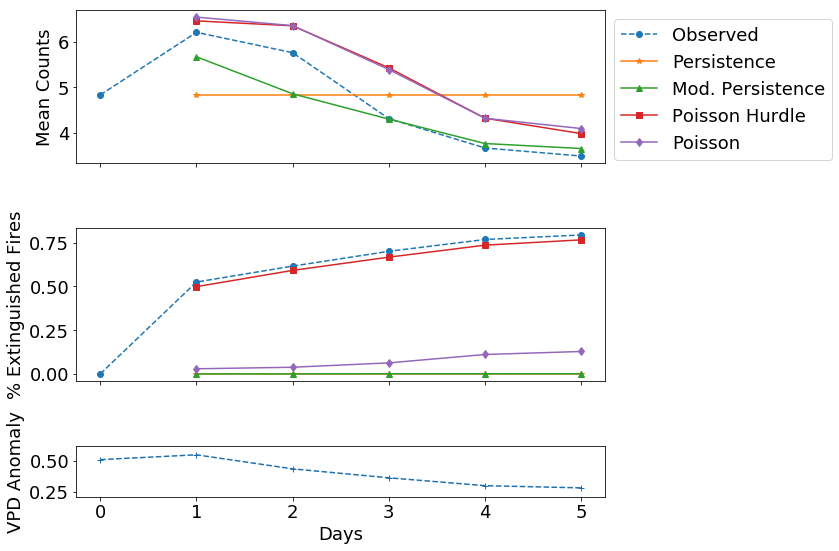

In [1405]:
plt.rcParams['figure.figsize'] = [12,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


data_dict,observed = build_forecast_dict(df, d.keys())
display_simulation(data_dict,observed, data=df, covars=covars, covar_means=covar_means, markers=['*', '^', 's', 'd', '.', 'x'], colors=['C0','C1', 'C2', 'C3', 'C4', 'C5'], label_pad = [75,90,90,110])

In [1125]:
PERCENTILE = 80
UPPER = True

df_cum = df.num_det_0 + df.num_det_1 + df.num_det_2 + df.num_det_3 + df.num_det_4 + df.num_det_5

if UPPER:
    ind = df_cum >= np.percentile(df_cum, PERCENTILE)
else:
    ind = df_cum <= np.percentile(df_cum, PERCENTILE)
    
print(np.percentile(df_cum, PERCENTILE))

df_percent = df[ind]

data_dict,observed = build_forecast_dict(df_percent, d.keys())

61.0


VPD Anomaly 0.3163280947389603


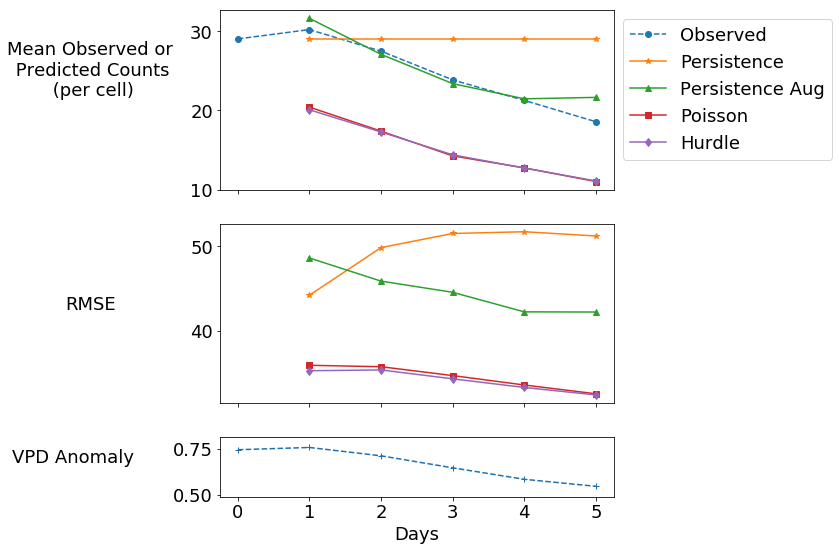

In [1126]:
plt.rcParams['figure.figsize'] = [12,8]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


display_simulation(data_dict,observed, data=df_percent, covars=covars, covar_means=covar_means, markers=['*', '^', 's', 'd', '.'], colors=['C0','C1', 'C2', 'C3', 'C4'], label_pad = [100,90,90,110])

In [711]:
np.sum(X_grid_dict_nw[1][0].ignition.values)/np.sum(X_grid_dict_nw[1][0].num_det_target.values>0)

0.39746657283603098

93453.0

In [232]:
sel = X_grid_dict_nw_df[1]['num_det']>0
data = MultidataWrapper((X_grid_dict_nw_df[1][sel],X_grid_dict_nw_df[1][sel]))

In [233]:
pred_poisson_dict = {k:poisson_all['models'][k-1][0].predict(data) for k in [1,2,3,4,5]}
pred_per_aug_dict = {k:persistence_aug['models'][k-1][0].predict(data) for k in [1,2,3,4,5]}

-0.999959368097 1.0 0.05325863403371297
-0.999971893509 1.0 0.11236474419054643
-0.999971649308 1.0 0.13021802522825282
-0.999961339079 1.0 0.12158968715630732
-0.999955157001 1.0 0.1228828290577717


[-23.958178634164497, 481.95821926606794] [-23.958178634164497, 481.95821926606794]


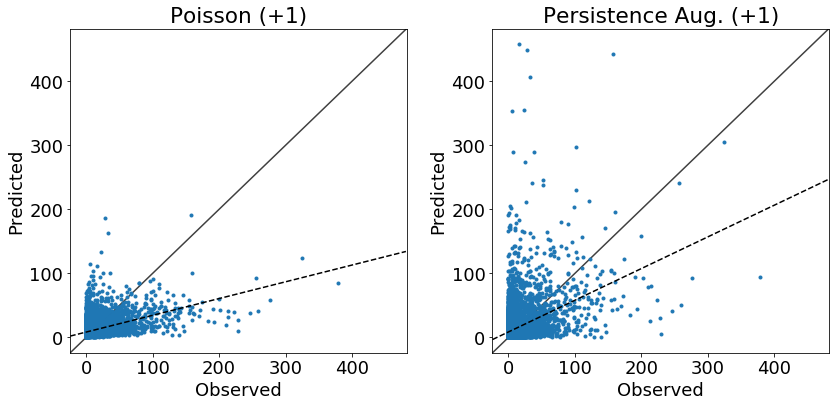

In [110]:
plt.rcParams['figure.figsize'] = [12,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

T_K = 1

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Poisson (+%d)' % T_K)
ax1.scatter(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_poisson_dict[T_K], marker='.', label='Poisson')

plt.xlabel('Observed')
plt.ylabel('Predicted')
# now plot both limits against eachother
#ax.set_aspect('equal')


ax = fig.add_subplot(1,2,2, sharey=ax1, sharex=ax1)
plt.xlabel('Observed')
plt.ylabel('Predicted')
ax.set_title('Persistence Aug. (+%d)' % T_K)
ax.scatter(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_per_aug_dict[T_K], marker='.', label='Persistence Aug.')

lims1 = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

#ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

print(lims1, lims)
lims = [
    np.min([lims1[0], lims[0]]),  # min of both axes
    np.max([lims1[1], lims[1]]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

fit = np.polyfit(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_poisson_dict[T_K], 1)
fit_fn = np.poly1d(fit) 
x = np.arange(lims[0], lims[1])
ax1.plot(x, fit_fn(x), '--k')

fit = np.polyfit(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_per_aug_dict[T_K], 1)
fit_fn = np.poly1d(fit) 
ax.plot(x, fit_fn(x), '--k')

#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax1.set_xlim(lims)
ax1.set_ylim(lims)
plt.tight_layout()

Poisson (Over,Under) 0.836917562724 0.163082437276
Persistence Aug. (Over,Under) 0.918160095579 0.0818399044205
[-0.32391242995644504, 6.968784460026229] [-0.32391242995644504, 6.968784460026229]


(-0.32391242995644504, 6.968784460026229)

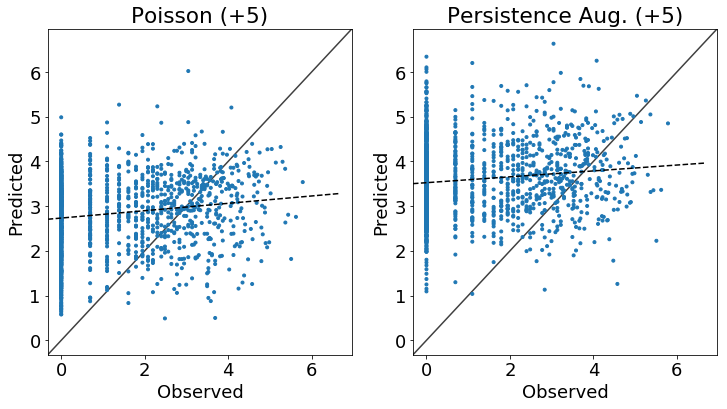

In [124]:
plt.rcParams['figure.figsize'] = [12,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

T_K =5

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Poisson (+%d)' % T_K)
diffs = pred_poisson_dict[T_K] - X_grid_dict_nw_df[T_K][sel]['num_det_target']
print('Poisson (Over,Under)', np.sum(diffs>0)/len(diffs), np.sum(diffs<=0)/len(diffs))
colors = ['C0' if diff>0 else 'C0' for diff in diffs]
ax1.scatter(np.log(X_grid_dict_nw_df[T_K][sel]['num_det_target']+1), np.log(pred_poisson_dict[T_K]+1), 
            color=colors, marker='.', label='Poisson')

plt.xlabel('Observed')
plt.ylabel('Predicted')
# now plot both limits against eachother
#ax.set_aspect('equal')


ax = fig.add_subplot(1,2,2, sharey=ax1, sharex=ax1)
plt.xlabel('Observed')
plt.ylabel('Predicted')
ax.set_title('Persistence Aug. (+%d)' % T_K)
diffs = pred_per_aug_dict[T_K] - X_grid_dict_nw_df[T_K][sel]['num_det_target']
print('Persistence Aug. (Over,Under)', np.sum(diffs>0)/len(diffs), np.sum(diffs<=0)/len(diffs))
colors = ['C0' if diff>0 else 'C0' for diff in diffs]
ax.scatter(np.log(X_grid_dict_nw_df[T_K][sel]['num_det_target']+1), np.log(pred_per_aug_dict[T_K]+1), 
           color=colors, marker='.', label='Persistence Aug.')

lims1 = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

#ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

print(lims1, lims)
lims = [
    np.min([lims1[0], lims[0]]),  # min of both axes
    np.max([lims1[1], lims[1]]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

fit = np.polyfit(np.log(X_grid_dict_nw_df[T_K][sel]['num_det_target']+1), np.log(pred_poisson_dict[T_K]+1), 1)
fit_fn = np.poly1d(fit) 
x = np.arange(lims[0], lims[1])
ax1.plot(x, fit_fn(x), '--k')

fit = np.polyfit(np.log(X_grid_dict_nw_df[T_K][sel]['num_det_target']+1), np.log(pred_per_aug_dict[T_K]+1), 1)
fit_fn = np.poly1d(fit) 
ax.plot(x, fit_fn(x), '--k')



#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax1.set_xlim(lims)
ax1.set_ylim(lims)

In [231]:
pred_poisson_dict[T_K].shape

(1674,)

In [239]:
T_K = 1

mse_poisson = np.mean( (X_grid_dict_nw_df[T_K][sel]['num_det_target'].values - pred_poisson_dict[T_K].values)**2 )
mse_aug = np.mean( (X_grid_dict_nw_df[T_K][sel]['num_det_target'] - pred_per_aug_dict[T_K])**2 )
mse_mean = np.mean( (X_grid_dict_nw_df[T_K][sel]['num_det_target'] - np.mean(X_grid_dict_nw_df[T_K][sel]['num_det']))**2 )

print(mse_poisson, mse_aug, mse_mean)

r2_poisson = compute_coef_of_det(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_poisson_dict[T_K])
r2_aug = compute_coef_of_det(X_grid_dict_nw_df[T_K][sel]['num_det_target'], pred_per_aug_dict[T_K])
r2_mean = compute_coef_of_det(X_grid_dict_nw_df[T_K][sel]['num_det_target'], np.mean(X_grid_dict_nw_df[T_K][sel]['num_det']))

print(r2_poisson, r2_aug, r2_mean)

414.954830175 742.6553467732363 535.4825496223374
0.218975790176 -0.397819143691 -0.00788038789023


In [236]:
def compute_coef_of_det(y, y_hat):
    ss_tot = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-y_hat)**2)
    
    return 1 - ss_res/ss_tot

(array([ 17.51250069]), array([ 3073112.73673244]), 1, array([ 71.66282795]))

(array([ 0.1717056]), 0)
[ 0.1255749  0.0149551]
[ 0.21457991 -0.00137595  0.03036551]


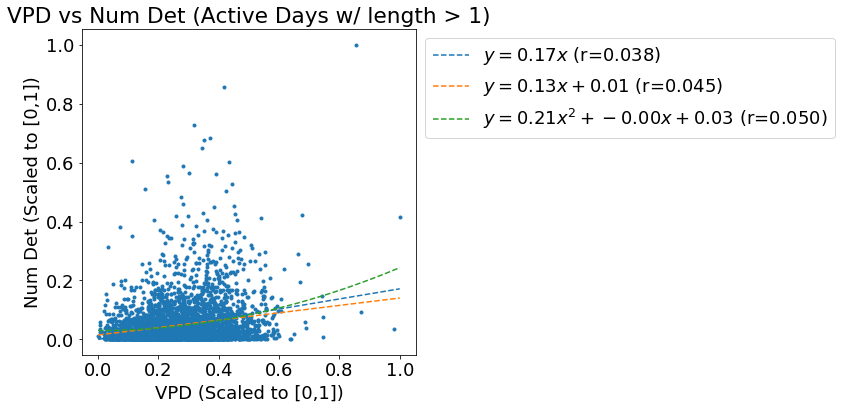

In [408]:
plt.rcParams['figure.figsize'] = [6,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

sel = X_grid_dict_nw_df[1]['num_det']>0
sel = sel & X_grid_dict_nw_df[1]['num_det_1']>0

vpd = X_grid_dict_nw_df[1][sel]['vpd_1']
vpd = vpd / np.max(vpd)


det = X_grid_dict_nw_df[1][sel]['num_det']
det = det / np.max(det)

_ = plt.scatter(vpd, det, marker='.', label=None)



x = np.linspace(np.min(vpd), np.max(vpd))

fit = np.linalg.lstsq(vpd[:,None], det)[0]
fit = (fit,0)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx$ (r=%.3f)' % (fit[0], r2))

fit = np.polyfit(vpd, det, 1)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx+%.2f$ (r=%.3f)' % (fit[0], fit[1], r2))

fit = np.polyfit(vpd, det, 2)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx^2+%.2fx + %.2f$ (r=%.3f)' % (fit[0], fit[1], fit[2], r2))


plt.title('VPD vs Num Det (Active Days w/ length > 1)')
plt.ylabel('Num Det (Scaled to [0,1])')
plt.xlabel('VPD (Scaled to [0,1])')
_ = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

(array([ 0.00107185]), 0)
[ 0.0007991   0.02171398]
[ -2.36540513e-06   1.35378880e-03   1.44485134e-02]


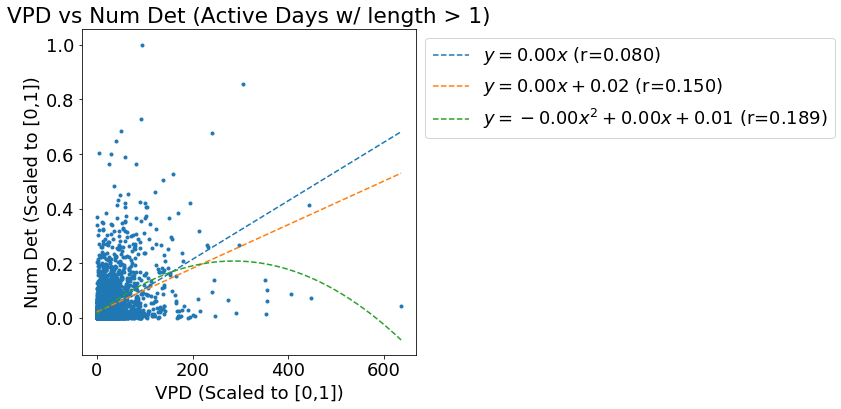

In [253]:
plt.rcParams['figure.figsize'] = [6,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

sel = X_grid_dict_nw_df[1]['num_det']>0
sel = sel & X_grid_dict_nw_df[1]['num_det_1']>0

vpd = X_grid_dict_nw_df[1][sel]['vpd_1']
vpd = vpd / np.max(vpd)

X = X_grid_dict_nw_df[1][sel]

today = X['vpd_%d' % 1].values
grad = (X['vpd'] - today) / today


grad[np.isnan(grad)] = 0
grad[grad==np.inf] = 0
grad[grad==-np.inf] = 0

det = X_grid_dict_nw_df[1][sel]['num_det']

grad[grad>5] = 5
vpd = det * (1+grad)

det = X_grid_dict_nw_df[1][sel]['num_det_target']

det = det / np.max(det)

_ = plt.scatter(vpd, det, marker='.', label=None)



x = np.linspace(np.min(vpd), np.max(vpd))

fit = np.linalg.lstsq(vpd[:,None], det)[0]
fit = (fit,0)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx$ (r=%.3f)' % (fit[0], r2))

fit = np.polyfit(vpd, det, 1)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx+%.2f$ (r=%.3f)' % (fit[0], fit[1], r2))

fit = np.polyfit(vpd, det, 2)
print(fit)
fit_fn = np.poly1d(fit) 
r2 = compute_coef_of_det(det, fit_fn(vpd))
plt.plot(x, fit_fn(x), '--', label='$y=%.2fx^2+%.2fx + %.2f$ (r=%.3f)' % (fit[0], fit[1], fit[2], r2))


plt.title('VPD vs Num Det (Active Days w/ length > 1)')
plt.ylabel('Num Det (Scaled to [0,1])')
plt.xlabel('VPD (Scaled to [0,1])')
_ = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [267]:
X = X_grid_dict_nw_df[1]

today = X['vpd_%d' % 1].values
grad = (X['vpd'] - today) / today


grad[np.isnan(grad)] = 0
grad[grad==np.inf] = 0
grad[grad==-np.inf] = 0

grad[grad>5] = 5

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


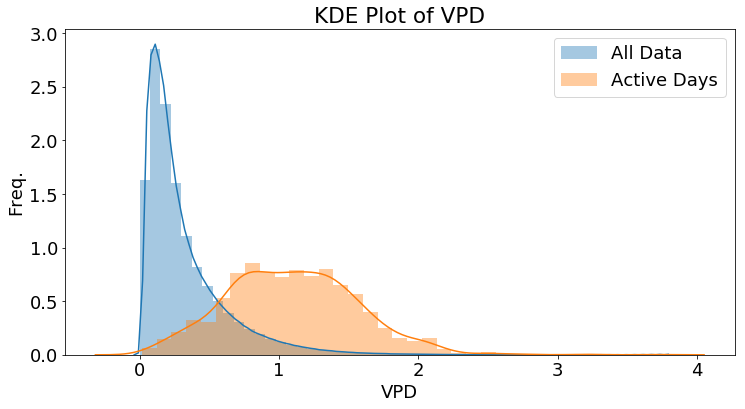

In [147]:
sns.distplot(today, label='All Data')
sns.distplot(today[sel], label='Active Days')

plt.xlabel('VPD')
plt.ylabel('Freq.')
plt.title('KDE Plot of VPD')
plt.legend()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


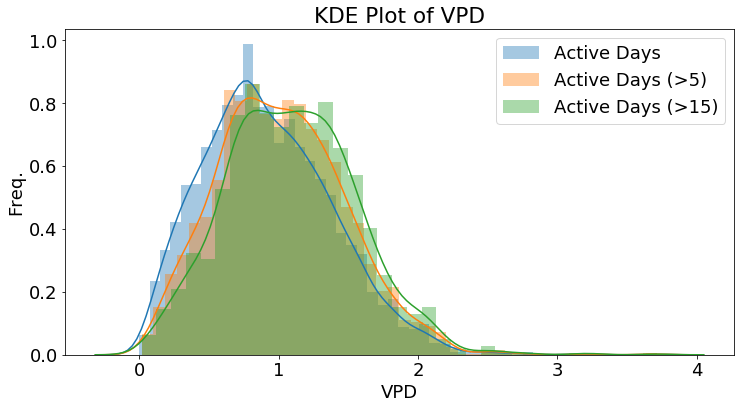

In [278]:
plt.rcParams['figure.figsize'] = [12,6]

sel = X_grid_dict_nw_df[1]['num_det']>0
sns.distplot(today[sel], label='Active Days')

sel = X_grid_dict_nw_df[1]['num_det']>5
sns.distplot(today[sel], label='Active Days (>5)')

sel = X_grid_dict_nw_df[1]['num_det']>15
sns.distplot(today[sel], label='Active Days (>15)')

plt.xlabel('VPD')
plt.ylabel('Freq.')
plt.title('KDE Plot of VPD')
plt.legend()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


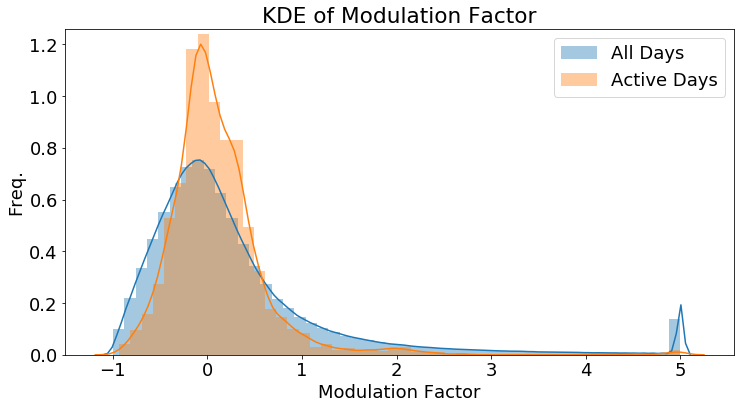

In [148]:
sns.distplot(grad, bins=50, label='All Days')
sns.distplot(grad[sel], bins=50, label='Active Days')
plt.xlabel('Modulation Factor')
plt.ylabel('Freq.')
plt.title('KDE of Modulation Factor')
plt.legend()

In [149]:

plt.rcParams['figure.figsize'] = [12,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

fig = plt.figure()
#ax = fig.add_subplot(1,2,1)
#ax.set_title('Poisson (+1)')
#ax.scatter(X_grid_dict_nw_df[1][sel]['num_det'], pred_poisson, marker='.', label='Poisson')
g= sns.jointplot(x=np.log(X_grid_dict_nw_df[1][sel]['num_det']+1), y=np.log(pred_poisson+1), kind='reg')
g.ax_joint.legend_.remove()
g.set_axis_labels("Observed", "Predicted");

"""
ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
"""

g = sns.jointplot(x=np.log(X_grid_dict_nw_df[1][sel]['num_det']+1), y=np.log(pred_per_aug+1), kind='reg')
g.ax_joint.legend_.remove()
g.set_axis_labels("Observed", "Predicted");

return

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = fig.add_subplot(1,2,2)
ax.set_title('Persistence Aug. (+1)')
ax.scatter(X_grid_dict_nw_df[1][sel]['num_det'], pred_per_aug, marker='.', label='Persistence Aug.')

ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

NameError: name 'pred_poisson' is not defined

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = [12,6]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

fig = plt.figure()
#ax = fig.add_subplot(1,2,1)
#ax.set_title('Poisson (+1)')
#ax.scatter(X_grid_dict_nw_df[1][sel]['num_det'], pred_poisson, marker='.', label='Poisson')
g= sns.jointplot(x=X_grid_dict_nw_df[1][sel]['num_det'], y=pred_poisson, kind='reg')
g.ax_joint.legend_.remove()
g.set_axis_labels("Observed", "Predicted");

"""
ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
"""

g = sns.jointplot(x=X_grid_dict_nw_df[1][sel]['num_det'], y=pred_per_aug, kind='reg')
g.ax_joint.legend_.remove()
g.set_axis_labels("Observed", "Predicted");

return

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = fig.add_subplot(1,2,2)
ax.set_title('Persistence Aug. (+1)')
ax.scatter(X_grid_dict_nw_df[1][sel]['num_det'], pred_per_aug, marker='.', label='Persistence Aug.')

ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [852]:
lons[0,:]

array([-165. , -164.5, -164. , -163.5, -163. , -162.5, -162. , -161.5,
       -161. , -160.5, -160. , -159.5, -159. , -158.5, -158. , -157.5,
       -157. , -156.5, -156. , -155.5, -155. , -154.5, -154. , -153.5,
       -153. , -152.5, -152. , -151.5, -151. , -150.5, -150. , -149.5,
       -149. , -148.5, -148. , -147.5, -147. , -146.5, -146. , -145.5,
       -145. , -144.5, -144. , -143.5, -143. , -142.5, -142. , -141.5,
       -141. , -140.5, -140. , -139.5, -139. , -138.5])

In [885]:
import scipy

def func(n, lam, eps):
    tot = 0
    for k in range(0,n+1):
        temp = scipy.special.comb(n,k)* np.power(1 - np.exp(-lam*eps), k) * np.power(np.exp(-lam*eps), n-k)
        print(temp)
        tot += temp
    return tot

print(func(10,1,.5))

0.00673794699909
0.0437104953916
0.12760167651
0.220741124611
0.250599059993
0.195082728762
0.105461929745
0.0390945126142
0.00951054071268
0.0013710422347
8.89424260681e-05
1.0


In [97]:
def gen_seq(k, axs):
    vals = []
    for i in range(1,10):
        vals.append(np.exp(k*i))
    
    axs[0].plot(vals)
    axs[1].plot(np.cumsum(vals))
    print(np.sum(vals))
    
def gen_seq2(k, axs):
    vals = []
    for i in range(0,10):
        vals.append(np.power(k,i))
    
    axs[0].plot(vals)
    axs[1].plot(np.cumsum(vals))
    print(np.sum(vals))

1.52436963011
3.239174917


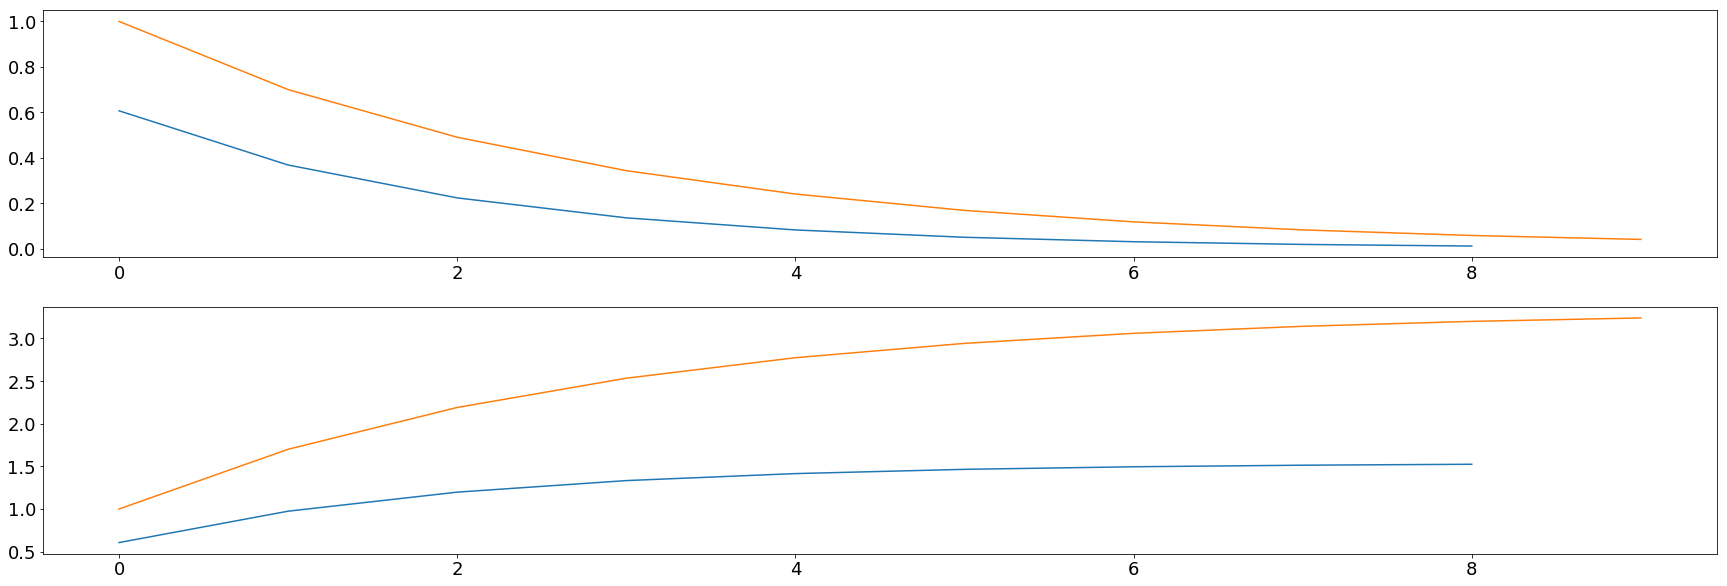

In [100]:
fig = plt.figure()
axs = [fig.add_subplot(2,1,1), fig.add_subplot(2,1,2)]
gen_seq(-.5, axs)
gen_seq2(.7, axs)

In [29]:
%%capture
with open(os.path.join(EXP_DIR, '158751386468481920970831629705093724420.pkl'), 'rb') as fin:
    hurdle_learn_c = pickle.load(fin)

In [30]:
%%capture
with open(os.path.join(EXP_DIR, '298395376205238488598964774233007380271.pkl'), 'rb') as fin:
    hurdle_learn_c2 = pickle.load(fin)

In [46]:
def print_c_values(models):
    for k in range(5):
        models_extracted = []
        print('===K=%d===' % k)
        
        afm_pos = models[k][0].afm.model.fit_result_positive
        models_extracted.append(afm_pos)
        
        afm_inf = models[k][0].afm.model.fit_result_inflated
        models_extracted.append(afm_inf)
        
        #model = models[k][0].afm.model.fit_result
        #models_extracted.append(model)
        
        for m in models_extracted:
            row = m.params['np.log(np.maximum(num_det, 1))']
            row_log_c = m.params['np.mod(np.minimum(num_det, 1) + 1, 2)']
            
            print('c=%f (p=%f,plog(c)=%f)' % (np.exp(row_log_c/row), row, row_log_c))
        
        
        

In [50]:
0.108918/0.421739

0.2582592551317284

In [47]:
print_c_values(hurdle_learn_c2['models'])

===K=0===
c=1.294676 (p=0.421739,plog(c)=0.108918)
c=0.325577 (p=-0.654368,plog(c)=0.734303)
===K=1===
c=0.995533 (p=0.258040,plog(c)=-0.001155)
c=0.233514 (p=-0.375804,plog(c)=0.546612)
===K=2===
c=1.946230 (p=0.207803,plog(c)=0.138375)
c=0.271840 (p=-0.332354,plog(c)=0.432905)
===K=3===
c=2.025042 (p=0.183281,plog(c)=0.129321)
c=0.560994 (p=-0.384068,plog(c)=0.222008)
===K=4===
c=0.405712 (p=0.156888,plog(c)=-0.141531)
c=0.754318 (p=-0.345828,plog(c)=0.097503)


In [39]:
hurdle_learn_c2['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4043371280201249,
   1.2742025545355828,
   1.3809786426081783,
   1.4382681408548483,
   1.4518620255391168,
   1.4763742765628984]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052255151591622015,
   0.047243084547691258,
   0.052526109703617693,
   0.053927898386235205,
   0.053644402393099214,
   0.053934262927466746]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [16.678786210543468,
   17.474278113638182,
   17.500860936691058,
   16.741337906726418,
   16.049756502651626,
   15.627697593010058],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [7.2294329323804742,
   8.3503040188825093,
   8.0699413802651794,
   7.2376157461843906,
   6.4857019921255628,
   6.0036015244447309],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763

In [40]:
hurdle_learn_c['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4041362041059595,
   1.2743086279630913,
   1.3804198148893536,
   1.4378210678935499,
   1.4519492933992468,
   1.476182216384555]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052248564388687802,
   0.047227814909657009,
   0.052525089706251062,
   0.053893165475511873,
   0.053656827137395405,
   0.053939924714623687]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [16.675366472101437,
   17.475833549559056,
   17.4919927423283,
   16.733613442807435,
   16.05134399026571,
   15.624048635546689],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [7.2281082596711546,
   8.3472333266650054,
   8.069736260931732,
   7.2306310306063173,
   6.4882005821726345,
   6.00474009798008],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.

In [525]:
X_grid_dict_nw[1][0]

<xarray.Dataset>
Dimensions:            (time: 1100, x: 55, y: 33)
Coordinates:
  * time               (time) datetime64[ns] 2007-05-14 2007-05-15 ...
Dimensions without coordinates: x, y
Data variables:
    num_det            (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    num_det_target     (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    active             (y, x, time) bool False False False False False False ...
    temperature        (y, x, time) float32 264.687 267.243 269.273 269.217 ...
    humidity           (y, x, time) float32 85.8478 88.3131 90.076 94.0556 ...
    wind               (y, x, time) float32 4.78804 5.8777 1.64065 4.53513 ...
    rain               (y, x, time) float32 2.05111e-05 0.0 0.0 0.0 ...
    in_filled          (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    interpolated       (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    vpd                (y, x, time) float64 0.04567 0.04596 0.04553 0.02716 ...
   

In [991]:
%%capture
with open(os.path.join(EXP_DIR, '193620227562680004275327195443108511913.pkl'), 'rb') as fin:
    hurdle_hurdle_2 = pickle.load(fin)

In [160]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '285047588661836347394281493384348500942.pkl'), 'rb') as fin:
    hurdle_zero_2 = pickle.load(fin)


In [952]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '83965548982838090034132544851909459059.pkl'), 'rb') as fin:
    hurdle_nb_hurdle_2 = pickle.load(fin)


In [953]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '88176551325708799692585895819456285978.pkl'), 'rb') as fin:
    hurdle_nb_1hurdle_2 = pickle.load(fin)



In [189]:
%%capture
with open(os.path.join(EXP_DIR, '267667669509473063225445886070350933992.pkl'), 'rb') as fin:
    hurdle_hurdle_2_rain = pickle.load(fin)

In [287]:
%%capture
with open(os.path.join(EXP_DIR, '22324238888604819644740197928574150399.pkl'), 'rb') as fin:
    hurdle_log_2 = pickle.load(fin)

In [960]:
%%capture
with open(os.path.join(EXP_DIR, '169367064316537184482054494083621315559.pkl'), 'rb') as fin:
    hurdle_nb1_hurdle_2 = pickle.load(fin)

In [1029]:
%%capture
with open(os.path.join(EXP_DIR, '191704472021126626433841150926471497095.pkl'), 'rb') as fin:
    hurdle_hurdle_log_vpd_2 = pickle.load(fin)

In [1026]:
%%capture
with open(os.path.join(EXP_DIR, '50258417286202007768321029756544764594.pkl'), 'rb') as fin:
    hurdle_hurdle_temp_humid_2 = pickle.load(fin)

In [1021]:
%%capture
with open(os.path.join(EXP_DIR, '315152375093762850214082137461451198292.pkl'), 'rb') as fin:
    hurdle_logistic_2 = pickle.load(fin)

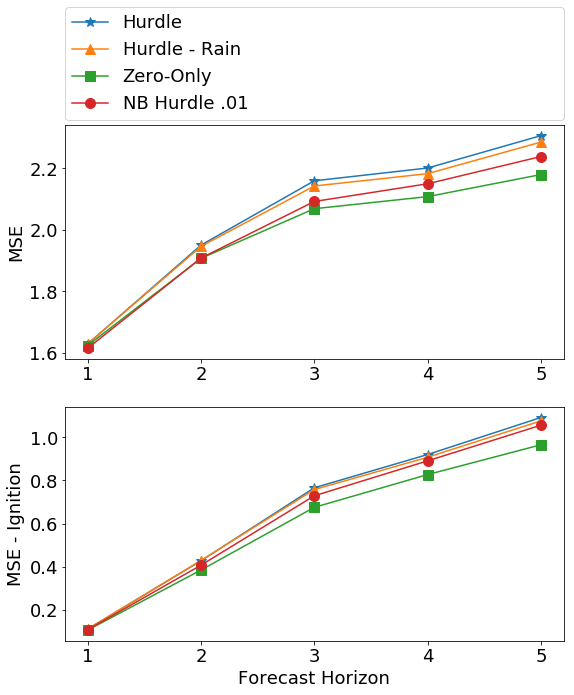

In [191]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': a['summary_results'],
                #'Log-Linear': b['summary_results'],
                'Hurdle': hurdle_hurdle_2['summary_results'],
                'Hurdle - Rain': hurdle_hurdle_2_rain['summary_results'],
                'Zero-Only': hurdle_zero_2['summary_results'],
                'NB Hurdle .01': hurdle_nb_hurdle_2['summary_results'],
                #'NB Hurdle 1': hurdle_nb_1hurdle_2['summary_results'],
    
    
                #'Log-Linear': ocean_hurdle_log['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [#('','root_mean_squared_error', False, False),
                #('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error', False, False),
                ('','root_mean_squared_error_ignition', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=True,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

In [173]:
hurdle_zero_2['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4043371280201249,
   1.2742025545355828,
   1.3809786426081783,
   1.4382681408548483,
   1.4518620255391168,
   1.4763742765628984]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052255151591622015,
   0.047243084547691258,
   0.052526109703617693,
   0.053927898386235205,
   0.053644402393099214,
   0.053934262927466746]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [16.678786210543468,
   17.474278113638182,
   17.500860936691058,
   16.741337906726418,
   16.049756502651626,
   15.627697593010058],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [7.2294329323804742,
   8.3503040188825093,
   8.0699413802651794,
   7.2376157461843906,
   6.4857019921255628,
   6.0036015244447309],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763

In [158]:
hurdle_nb_hurdle_2

{'models': [[<models.grid_models.ActiveIgnitionGrid at 0x7fb499cfac18>],
 'summary_results': defaultdict(dict,
             {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
                [1.4121369860582491,
                 1.2706980365993035,
                 1.3812948193181163,
                 1.4464147990008371,
                 1.4661869408047168,
                 1.4960903345682721]),
               'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
                [0.069997648495634349,
                 0.053293051754160256,
                 0.066059821472417374,
                 0.073553883932016825,
                 0.076821673197889878,
                 0.08025981212168741])},
              'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
                [1.4121369860582491,
                 1.2706980365993035,
                 1.3812948193181163,
                 1.4464147990008371,
                 1.4661869408047168,
                 1.49609033

In [148]:
v = hurdle_zero_2['summary_results']['test']
print(list(map(lambda x: x[1][0], (v['root_mean_squared_error'], v['root_mean_squared_error_active'],v['root_mean_squared_error_ignition'],))))

[1.4236763958892023, 14.226585665979433, 0.71717367926048436]


In [139]:
v = hurdle_hurdle_4['summary_results']['test']
print(list(map(lambda x: x[1][0], (v['root_mean_squared_error'], v['root_mean_squared_error_active'],v['root_mean_squared_error_ignition'],))))

[1.9721627691358126, 278.18190945701491, 0.53773486745686228]


In [178]:
pred_dict_hurdle_nb_hurdle = {k: hurdle_nb_hurdle_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [198]:
pred_dict_hurdle_zero = {k: hurdle_zero_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [992]:
pred_dict_hurdle_hurdle = {k: hurdle_hurdle_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [289]:
pred_dict_hurdle_log = {k: hurdle_log_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [427]:
pred_dict_hurdle_nb1_hurdle = {k: hurdle_nb1_hurdle_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [1027]:
pred_dict_hurdle_hurdle_temp_humid = {k: hurdle_hurdle_temp_humid_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [1030]:
pred_dict_hurdle_hurdle_log_vpd = {k: hurdle_hurdle_log_vpd_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [1022]:

pred_dict_hurdle_logistic = {k: hurdle_logistic_2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [214]:
def comp_stats(pred, X, filter=None, func=None):
    for k in range(1,6):
        x = X[k][0]
        if filter is not None:
            p = filter(p,x)
        p = pred[k]
        if func is not None:
            p = func(p)
        print(np.mean(p), np.std(p), np.min(p), np.max(p))

In [216]:
comp_stats(pred_dict_hurdle_nb_hurdle, X_grid_dict_nw)

0.0473915829913 0.937354326474 0.0012366278447 185.156493365
0.0484090649178 0.802542976284 0.00193384441885 182.232927174
0.0493046914844 0.738379517386 0.00247168750161 192.998168432
0.0494652723747 0.701998256373 0.00296777274643 190.953742483
0.0501174991198 0.673132909635 0.00323231841796 169.212468389


In [213]:
comp_stats(pred_dict_hurdle_hurdle, X_grid_dict_nw)

0.0477766443873 0.941801070234 0.00124088766283 188.5345965
0.048696295697 0.802597739668 0.0019564012652 178.225975753
0.0496199243802 0.739761997677 0.00252761161712 187.773385678
0.0498038491186 0.702290376533 0.00307191026317 179.497770183
0.0504218629733 0.669554060335 0.00337157878137 160.298186198


In [217]:
comp_stats(pred_dict_hurdle_zero, X_grid_dict_nw)

0.0418333448266 0.940845694467 0.0 188.5345965
0.0353419059958 0.788948672818 0.0 178.225975753
0.0298414893919 0.701953671386 0.0 187.773385678
0.0263057605056 0.653638894153 0.0 179.497770183
0.0235289500298 0.595518289787 0.0 160.298186198


In [192]:
def poisson_mode(y):
    return np.floor(y)

In [265]:
print(np.mean( (X_grid_dict_nw[1][0].num_det_target.values - pred_dict_hurdle_hurdle[1])**2  ))

1.61447269273


In [281]:
def compute_mse(pred_dict, X, func=None, ocean_mask=np.ones((33,55), dtype=bool)):
    res = {}
    vals = []
    vals2 = []
    vals3 = []
    vals4 = []
    vals5 = []
    for k in range(1,6):   
        pred = pred_dict[k]

        if func is not None:
            pred = func(pred)
            
        
        ign = (X[k][0].num_det.values==0) & (X[k][0].num_det_1.values==0)
        y = X[k][0].num_det_target.values
        
        pred_ign = pred[ocean_mask]
        y_ign = y[ocean_mask]
        
        vals.append(np.mean((y_ign-pred_ign)**2))
        
        active = ign==False
        
        pred_ign = pred[active & ocean_mask[:,:,None]]
        y_ign = y[active & ocean_mask[:,:,None]]
        
        vals3.append(np.mean((y_ign-pred_ign)**2))
    
        #print(np.mean((y-pred)**2))
        
        #pred_ign = pred#[alaska_interior_mask]
        #y_ign = y#[alaska_interior_mask]
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        pred_ign = pred[ign & ocean_mask[:,:,None]]
        print('k=%d' % k, np.mean(pred_ign))
        y_ign = y[ign & ocean_mask[:,:,None]]
        
        #print(np.mean(pred_ign))
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals2.append(np.mean((y_ign-pred_ign)**2))
        ign_target = ign & (y>0)

        pred_ign = pred[ign_target & ocean_mask[:,:,None]]
        y_ign = y[ign_target & ocean_mask[:,:,None]]
        
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals4.append(np.mean((y_ign-pred_ign)**2))
        
        ign_target = ign & (y==0)

        pred_ign = pred[ign_target & ocean_mask[:,:,None]]
        y_ign = y[ign_target & ocean_mask[:,:,None]]
        
        
        #print(np.mean((y_ign-pred_ign)**2))
        
        vals5.append(np.mean((y_ign-pred_ign)**2))
        
        #print('Ign %:', np.sum(ign) / pred.size)
        #print('Active %:', np.sum(active) / pred.size)
        
        #print('Ocean Ign %:', np.sum(ign[ocean_mask]) / pred[ocean_mask].size)
        #print('Ocean Active %:', np.sum(active[ocean_mask]) / pred[ocean_mask].size)
        
    print(vals)
    vals = np.sqrt(vals)
    print(vals)
    vals5 = np.sqrt(vals5)
    vals2 = np.sqrt(vals2)
    vals3 = np.sqrt(vals3)
    vals4 = np.sqrt(vals4)
      
    res['test'] = {}
    res['test']['root_mean_squared_error'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals)] + vals,
       [1]*5)
    
    res['test']['root_mean_squared_error_active'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals3)] + vals3,
       [np.sum(ign==False)/pred.size]*5,)

    res['test']['root_mean_squared_error_ignition'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals2)] + vals2,
       [np.sum(ign)/pred.size]*5,)
    
    res['test']['root_mean_squared_error_ignition_target'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals4)] + vals4,
       [np.sum(ign & (y>0))/pred.size]*5,)
    
    res['test']['root_mean_squared_error_zero_target'] = (['Avg.', 1, 2, 3, 4, 5],
       [np.mean(vals5)] + vals5,
       [np.sum(ign & (y==0))/pred.size]*5,)
    
    return res
        

In [282]:
print('hurdle-mode')
res_hurdle_mode = compute_mse(pred_dict_hurdle_hurdle, X_grid_dict_nw, np.floor)

res_zero_mode = compute_mse(pred_dict_hurdle_zero, X_grid_dict_nw, np.floor)

print('hurdle')
res_hurdle = compute_mse(pred_dict_hurdle_hurdle, X_grid_dict_nw)
res_zero = compute_mse(pred_dict_hurdle_zero, X_grid_dict_nw)

hurdle-mode
k=1 0.000398676715468
k=2 0.00260801018035
k=3 0.00519940883089
k=4 0.00638386124439
k=5 0.00800927426743
[1.6153854244928625, 1.9048980716253443, 2.0834074630603556, 2.1388549962434258, 2.2269997495617329]
[ 1.27097814  1.38018045  1.44340135  1.46248248  1.49231356]
k=1 0.0
k=2 0.0
k=3 0.0
k=4 0.0
k=5 0.0
[1.613984973703982, 1.8873107938893063, 2.0391745554720759, 2.0857751064362633, 2.150976208364638]
[ 1.27042708  1.37379431  1.42799669  1.44422128  1.46662068]
hurdle
k=1 0.0059730015187
k=2 0.0134211289792
k=3 0.0198772787768
k=4 0.0236155215698
k=5 0.0270273117167
[1.6144726927285966, 1.9048634396023216, 2.0842723466358262, 2.1393736510829884, 2.2278158153702754]
[ 1.27061902  1.3801679   1.44370092  1.46265979  1.49258695]
k=1 0.0
k=2 0.0
k=3 0.0
k=4 0.0
k=5 0.0
[1.612656857675608, 1.8858352797871021, 2.0380550474984425, 2.0851056772975247, 2.1500881572138049]
[ 1.26990427  1.37325718  1.42760465  1.4439895   1.46631789]


In [280]:
res_hurdle['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  array([ 2.68056594,  2.79011482,  2.85364784,  2.8726067 ,  2.90253387]),
  [1, 1, 1, 1, 1]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  array([ 33.94549929,  33.91261431,  33.0857167 ,  32.43373615,  31.96350717]),
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5],
  array([ 1.08428633,  1.39285733,  1.60822435,  1.69805818,  1.78071916]),
  [0.99502729777109944,
   0.99502729777109944,
   0.99502729777109944,
   0.99502729777109944,
   0.99502729777109944]),
 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5],
  array([ 26.00886151,  31.85524526,  35.05693354,  36.02357327,  36.96826589]),
  [0.0022895066366140746,
   0.0022895066366140746,
   0.0022895066366140746,
   0.0022895066366140746,
   0.0022895066366140746]),
 'root_mean_squared_error_zero_t

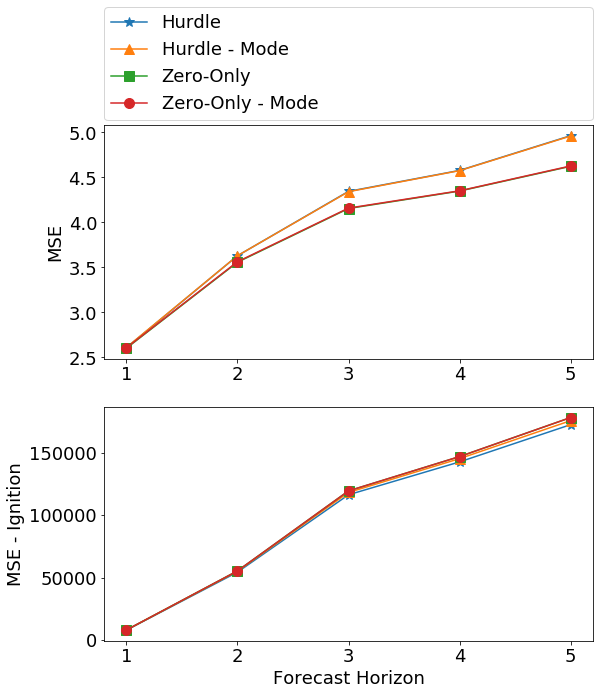

In [276]:
plt.rcParams['figure.figsize'] = [30,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': a['summary_results'],
                #'Log-Linear': b['summary_results'],
                'Hurdle': res_hurdle,
                'Hurdle - Mode': res_hurdle_mode,
                'Zero-Only': res_zero,
                'Zero-Only - Mode': res_zero_mode,
                #'NB Hurdle 1': hurdle_nb_1hurdle_2['summary_results'],
    
    
                #'Log-Linear': ocean_hurdle_log['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [#('','root_mean_squared_error', False, False),
                #('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error', False, False),
                ('','root_mean_squared_error_ignition_target', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=False,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

In [454]:
hurdle_hurdle_temp_humid_2['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4109280881833715,
   1.2802883451235174,
   1.3884214071484282,
   1.44188151132898,
   1.4593108366458958,
   1.4847383406700365]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.069129746387724303,
   0.053178229409569858,
   0.065524900314892637,
   0.072469085697747626,
   0.075744620942087018,
   0.078731895574324376]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [16.744564768336073,
   17.561974116189123,
   17.594861249266387,
   16.746348335739427,
   16.119429391032959,
   15.700210749452481],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [7.2416977150876276,
   8.3743000978093374,
   8.0863316984031197,
   7.2175719797960731,
   6.5198372333848562,
   6.0104475660447507],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,


In [455]:
hurdle_zero_2['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.4043371280201249,
   1.2742025545355828,
   1.3809786426081783,
   1.4382681408548483,
   1.4518620255391168,
   1.4763742765628984]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.052255151591622015,
   0.047243084547691258,
   0.052526109703617693,
   0.053927898386235205,
   0.053644402393099214,
   0.053934262927466746]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [16.678786210543468,
   17.474278113638182,
   17.500860936691058,
   16.741337906726418,
   16.049756502651626,
   15.627697593010058],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [7.2294329323804742,
   8.3503040188825093,
   8.0699413802651794,
   7.2376157461843906,
   6.4857019921255628,
   6.0036015244447309],
  [0.0049727022289005763,
   0.0049727022289005763,
   0.0049727022289005763

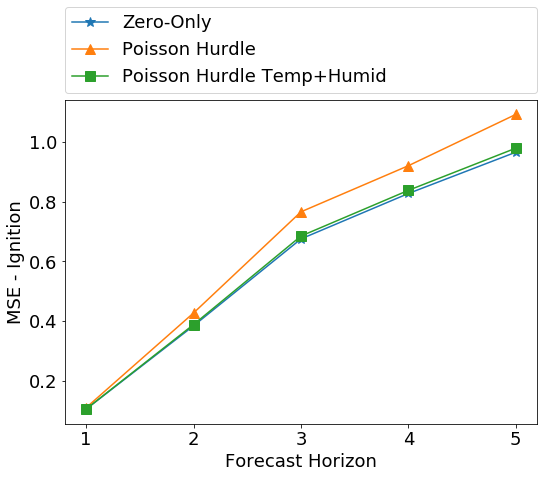

In [613]:
plt.rcParams['figure.figsize'] = [30,7]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Mean': mean_model['summary_results'],
                #'Persistence': persistence['summary_results'],
                #'Mod. Persistence': p_vpd,
                #'Linear': a['summary_results'],
                #'Log-Linear': b['summary_results'],
                'Zero-Only': hurdle_zero_2['summary_results'],
                'Poisson Hurdle': hurdle_hurdle_2['summary_results'],
                #'Log-Normal': hurdle_log_2['summary_results'],
                #'Hurdle log(VPD)': hurdle_hurdle_log_vpd_2['summary_results'],
                #'Hurdle NB1': hurdle_nb1_hurdle_2['summary_results'],
                'Poisson Hurdle Temp+Humid': hurdle_hurdle_temp_humid_2['summary_results'],
                #'Logistic': hurdle_logistic_2['summary_results'],
    
    
                #'NB Hurdle 1': hurdle_nb_1hurdle_2['summary_results'],
    
    
                #'Log-Linear': ocean_hurdle_log['summary_results'],
                #'Mean-only': hurdle_ig_mean_vpd_ar_seperated['summary_results'],
                #'Two-Poisson Hurdle-Poisson (VPD + AR)': hurdle_ig_poisson_vpd_ar_seperated['summary_results'],
    
    
                
                
}
measurements = [#('','root_mean_squared_error', False, False),
                #('','root_mean_squared_error_active', False, False),
                #('','root_mean_squared_error', False, False),
                ('','root_mean_squared_error_ignition', False, False),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Poisson Hurdle (VPD + AR)', scale=True,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE - Ignition', 'MSE - Ignition', 'MSE - Ignition'], col_len=1,
                    legend_func=legend_func)

In [436]:
y_t = X_grid_dict_nw[5][0].num_det_target.values
ign = (X_grid_dict_nw[5][0].num_det.values==0) & (X_grid_dict_nw[5][0].num_det_1.values==0)
p = pred_dict_hurdle_hurdle[5]

print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.0270273117167
0.308863879782
0.00337157878137
72.7240361266

LT1O (0.994958) 0.00288770960582
LT1U (0.002203) 0.877661847581
GT1O (0.002762) 0.0916062635772
GT1U (0.000077) 0.0770441425443
Tot 1.04919996331


In [432]:
y_t = X_grid_dict_nw[5][0].num_det_target.values
ign = (X_grid_dict_nw[5][0].num_det.values==0) & (X_grid_dict_nw[5][0].num_det_1.values==0)
p = np.floor(pred_dict_hurdle_hurdle[5])

print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
print()

lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.00800927426743
0.291869376015
0.0
72.0


LT1O (0.000000) nan
LT1U (0.997161) 0.885460985054
GT1O (0.002753) 0.083874130915
GT1U (0.000086) 0.0781522139646
Tot 1.04748732993


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [472]:
y_t = X_grid_dict_nw[5][0].num_det_target.values
ign = (X_grid_dict_nw[5][0].num_det.values==0) & (X_grid_dict_nw[5][0].num_det_1.values==0)
p = pred_dict_hurdle_hurdle[5].copy()

p[(p>=1) & ign] = 1

print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
print()
lt1 = p<1

over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.020668290185
0.0734493537797
0.00337157878137
1.0


LT1O (0.994958) 0.00288770960582
LT1U (0.002203) 0.877661847581
GT1O (0.002741) 0.00274140579853
GT1U (0.000098) 0.0823458701723
Tot 0.965636833158


In [464]:
p = pred_dict_hurdle_hurdle_temp_humid[5].copy()



print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.0258417196809
0.155850408715
1.0552579278e-06
17.3274346247

LT1O (0.994516) 0.00453659980361
LT1U (0.002166) 0.827456462714
GT1O (0.003210) 0.0196207552581
GT1U (0.000109) 0.123489235454
Tot 0.97510305323


In [429]:
p = pred_dict_hurdle_nb1_hurdle[5]


print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.0257690840942
0.217319625443
0.00406145417189
42.5048228469

LT1O (0.995324) 0.00282693535526
LT1U (0.002223) 0.896258898432
GT1O (0.002391) 0.0441494877733
GT1U (0.000062) 0.0603875222287
Tot 1.00362284379


In [471]:

p = pred_dict_hurdle_logistic[5].copy()

#p[(p>=1) & ign] = 0
print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
print()
lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.00173162613789
0.00765850099536
0.000424952588061
0.889107371349


LT1O (0.997699) 5.99604286972e-05
LT1U (0.002301) 0.970312296387
GT1O (0.000000) nan
GT1U (0.000000) nan
Tot 0.970372256816


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [466]:
p = pred_dict_hurdle_log[5].copy()

#p[(p>=1) & ign] = 0
print(np.mean(p[ign]))
print(np.std(p[ign]))
print(np.min(p[ign]))
print(np.max(p[ign]))
print()
print()
lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

0.0417026513207
0.0455742506653
0.0223003886357
7.11792216489


LT1O (0.997514) 0.00309316580463
LT1U (0.002294) 0.946683815849
GT1O (0.000187) 0.000651428454124
GT1U (0.000005) 0.0168393234574
Tot 0.967267733565


In [416]:
p = pred_dict_hurdle_zero[5]

lt1 = p<1
over_pred = p>y_t

lt1_scale_over = np.sum(ign&lt1&over_pred)/p[ign].size
lt1_scale_under = np.sum(ign&lt1&~over_pred)/p[ign].size

gt1_scale_over = np.sum(ign&~lt1&over_pred)/p[ign].size
gt1_scale_under = np.sum(ign&~lt1&~over_pred)/p[ign].size


print('LT1O (%f)' % lt1_scale_over, np.mean( (y_t[ign & lt1 & over_pred] - p[ign & lt1 & over_pred])**2) * lt1_scale_over)
print('LT1U (%f)' % lt1_scale_under, np.mean( (y_t[ign & lt1 & ~over_pred] - p[ign & lt1 & ~over_pred])**2) * lt1_scale_under)
print('GT1O (%f)' % gt1_scale_over, np.mean( (y_t[ign & ~lt1 & over_pred] - p[ign & ~lt1 & over_pred])**2) * gt1_scale_over)
print('GT1U (%f)' % gt1_scale_under, np.mean( (y_t[ign & ~lt1 & ~over_pred] - p[ign & ~lt1 & ~over_pred])**2) * gt1_scale_under)

print('Tot', np.mean( (y_t[ign] - p[ign])**2))

LT1O (0.000000) nan
LT1U (1.000000) 0.971083857016
GT1O (0.000000) nan
GT1U (0.000000) nan
Tot 0.971083857016


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [321]:
np.max(X_grid_dict_nw[5][0].vpd)

<xarray.DataArray 'vpd' ()>
array(3.7547162791649713)

In [304]:
hurdle_hurdle_2['models'][4][0].igm.model.fit_result_positive.params

Intercept    1.496237
vpd          0.771152
dtype: float64

In [308]:
hurdle_hurdle_2['models'][4][0].igm.model.fit_result_inflated.params

Intercept    7.390095
vpd         -2.523134
dtype: float64

In [306]:
hurdle_log_2['models'][4][0].igm.model.fit_result.params

Intercept   -3.803151
vpd          1.535607
dtype: float64

7.1402201049488596

In [328]:
vpd_test = 0
print(np.exp(-3.8 + 1.535607 * vpd_test))
print(scipy.special.expit(7.39+vpd_test*-2.523134))

0.0223707718562
0.999382984989



I've spent most of today diagnosing why the Poisson Hurdle ignition model was being outperformed by the zero-only and linear models. I had suspected it was due to a mismatch between the Poisson distribution and the empirical distribution. From my investigation, it appears to be particularly related to the variance of the Poisson models. In particular, I believe the Poisson constraint of the Mean = Variance is pushing the model to produce high conditional means for large values of VPD to account for the variance observed for large values of the VPD (days after low VPD almost always have few ignitions, but days after large VPDs may have no, some, or many ignitions). The Hurdle component gives the flexibility to address the increased variance due to zeros, but the overdispersion in conditional distributions for the positive counts appears to be too much for the truncated Poisson. I explored the use of Negative Binomial NB1 and NB2 models (as well as their hurdle equivalents); the increased flexibility of the variance helped somewhat, but not enough.

When comparing the distribution output by the Poisson Hurdle and Log-Normal Ignition models, the Log-Normal's mean is 50% larger (~.04 vs .027),  but its standard deviation is 1/7th of the Poisson model's (.045 vs .308). Following from this, the data shows that the main difference in errors between the Poisson Hurdle and Log-Normal Ignition models is the Poisson Hurdle over-predicting (e.g. the Poisson's highest ignition prediction is 70, while the Log-Normal's is 7). 

The solutions I've found are the following:
1) Training the Poisson-Hurdle Ignition model using Temperature and Humidity (instead of VPD) performs almost identically to predicting zero-only or the log-normal model. I'm not sure why this does better, perhaps it has to do with the ignition model trained on VPD only has a single parameter (excluding the bias) whereas the active model trained on VPD has VPD and the previous number of detections.

2) Training a logistic classifier to predict the probability of ignition and use the expected probability as the expected count.

3) If you take either of the Poisson Hurdle (VPD or Temp/Humid) models and cap the ignitions predictions to be at most 1 you get the best ignition model so far. This isn't something that would appear in the paper but is interesting and suggests that the Poisson models are doing reasonably for small predictions (and hence small variance).

In [1190]:
def generate_four_plot(X, total=False, normed=True, filter_ocean=True):
    table = [['Sustained', 'Extinction', 'Ignition', 'Quiescent']]
    header = list(range(1,6))
    for k in range(1,6):
        num_det = X[k][0].num_det.values
        num_det_target = X[k][0].num_det_target.values
        
        non_ocean = X[k][0].filter_mask.values
        
        if filter_ocean:
            num_det = num_det[non_ocean]
            num_det_target = num_det_target[non_ocean]

        act = (num_det>0)
        to_act = (num_det_target>0)
        non = (num_det==0)
        to_non = (num_det_target==0)

        act_to_act = act & to_act
        act_to_non = act & to_non

        non_to_act = non & to_act
        non_to_non = non & to_non

        total_size = num_det.size
        
        vals = list(map(np.sum, [act_to_act, act_to_non, non_to_act, non_to_non]))
        
        if normed:
            act_total = np.sum(act_to_act) + np.sum(act_to_non)
            nonact_total = np.sum(non_to_act) + np.sum(non_to_non)
            vals[0] = np.array(vals[0])/act_total*100
            vals[1] = np.array(vals[1])/act_total*100
            vals[2] = np.array(vals[2])/nonact_total*100
            vals[3] = np.array(vals[3])/nonact_total*100
        elif not total:
            vals = np.array(vals)/total_size*100
        else:
            vals = list(map(np.sum, [act_to_act, act_to_non, non_to_act, non_to_non]))
        
        print('Active: %f, Non-active %f' % (np.sum(act_to_act+act_to_non)/total_size, 
                                             np.sum(non_to_act+non_to_non)/total_size) )
    
        if total:
            vals = list(map(lambda x: format(x, 'd'), vals))
        else:
            vals = list(map(lambda x: str(np.round(x,2))+'%', vals))
        
        table.append(list(vals))
    
    print(tabulate(zip(*table), headers=header, tablefmt='latex'))

In [1193]:
generate_four_plot(X_grid_dict_nw, False, True)

Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
\begin{tabular}{llllll}
\hline
            & 1      & 2      & 3      & 4      & 5      \\
\hline
 Sustained  & 60.33\% & 47.38\% & 38.61\% & 33.03\% & 29.67\% \\
 Extinction & 39.67\% & 52.62\% & 61.39\% & 66.97\% & 70.33\% \\
 Ignition   & 0.2\%   & 0.26\%  & 0.3\%   & 0.33\%  & 0.35\%  \\
 Quiessent  & 99.8\%  & 99.74\% & 99.7\%  & 99.67\% & 99.65\% \\
\hline
\end{tabular}


In [1242]:
import random as rand
def compute_ignition_rankings_plot(y_pred, X, k, label=None, random=False, optimal=False, 
                                   mask=np.ones((33,55), dtype=bool), plot=True):
          
    pred = y_pred[k][mask].flatten()   

    #print(pred[:10])
    y = X[k][0].num_det_target.values[mask].flatten()
    ign = (X[k][0].num_det.values[mask].flatten()==0) & (X[k][0].num_det_1.values[mask].flatten()==0)
    
    #print(np.sum(y[ign]>0), len(y), np.sum(y[ign]>0)/len(y))
    #NUM = np.sum(y[ign]>0)
    NUM = 100

    vals = list(zip(pred[ign],y[ign]))

    #print(vals[-10:])
    vals.sort(key=lambda x: x[0])

    num_igns = np.sum([v[1]>0 for v in vals[-NUM:]])

    print('Results (k=%d)' % k, num_igns, num_igns/NUM, np.sum(y[ign]>0)/len(y)*NUM)


    order_ign = [v[1] for v in vals][::-1]
    
    if random:
        rand.shuffle(order_ign)
        
    if optimal:
        order_ign.sort(reverse=True)
    
    cum_sum = np.cumsum(order_ign)/np.sum(order_ign)
    
    if plot:
        plt.plot(cum_sum, label=label)
    
    return cum_sum

In [987]:
a = np.array([1,2,3])
b = np.array([0,4,1])

np.minimum(a,b)

array([0, 2, 1])

In [994]:
N = 39
K = 1
mins = maxs = compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True, plot=False)

for i in range(N-1):
    vals = compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True, plot=False)
    mins = np.minimum(mins, vals)
    maxs = np.maximum(maxs, vals)
    print(i)

2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
0
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
1
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
2
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
3
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
4
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
5
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
6
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
7
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
8
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
9
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
10
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
11
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
12
2356 1996500 0.00118006511395
Results (k=1) 1 0

In [1243]:
N = 50
K = 5
mins_5 = maxs_5 = compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, 5,  random=True, plot=False)

for i in range(N-1):
    vals = compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, 5,  random=True, plot=False)
    mins_5 = np.minimum(mins_5, vals)
    maxs_5 = np.maximum(maxs_5, vals)
    print(i)

Results (k=5) 2 0.02 0.228950663661
Results (k=5) 2 0.02 0.228950663661
0
Results (k=5) 2 0.02 0.228950663661
1
Results (k=5) 2 0.02 0.228950663661
2
Results (k=5) 2 0.02 0.228950663661
3
Results (k=5) 2 0.02 0.228950663661
4
Results (k=5) 2 0.02 0.228950663661
5
Results (k=5) 2 0.02 0.228950663661
6
Results (k=5) 2 0.02 0.228950663661
7
Results (k=5) 2 0.02 0.228950663661
8
Results (k=5) 2 0.02 0.228950663661
9
Results (k=5) 2 0.02 0.228950663661
10
Results (k=5) 2 0.02 0.228950663661
11
Results (k=5) 2 0.02 0.228950663661
12
Results (k=5) 2 0.02 0.228950663661
13
Results (k=5) 2 0.02 0.228950663661
14
Results (k=5) 2 0.02 0.228950663661
15
Results (k=5) 2 0.02 0.228950663661
16
Results (k=5) 2 0.02 0.228950663661
17
Results (k=5) 2 0.02 0.228950663661
18
Results (k=5) 2 0.02 0.228950663661
19
Results (k=5) 2 0.02 0.228950663661
20
Results (k=5) 2 0.02 0.228950663661
21
Results (k=5) 2 0.02 0.228950663661
22
Results (k=5) 2 0.02 0.228950663661
23
Results (k=5) 2 0.02 0.228950663661
24

In [1249]:
a = X_grid_dict_nw[5][0].num_det.values
b = X_grid_dict_nw[5][0].num_det_target.values
print(np.sum(a))
print(np.sum(b[ign]))
ign = a==0

93453.0
53476.0


Results (k=5) 2 0.02 0.228950663661
Results (k=5) 2 0.02 0.228950663661


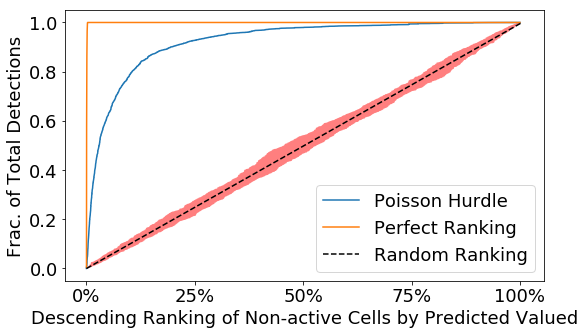

In [1245]:
plt.rcParams['figure.figsize'] = [8.5,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
K = 1

#fig = plt.figure()

#ax = fig.add_subplot(2,1,1)

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Poisson Hurdle')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'True Ranking', optimal=True)
#plt.fill_between(np.arange(mins.size), mins, maxs, facecolor='red', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



#plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Frac. of Total Detections')
#plt.xlabel('Descending Ranking of Non-active Cells by Predicted Valued')

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.setp(ax.get_xticklabels(), visible=False)

#ax = fig.add_subplot(2,1,2)
K = 5

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Poisson Hurdle')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Perfect Ranking', optimal=True)
plt.fill_between(np.arange(mins.size), mins_5, maxs_5, facecolor='red', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Frac. of Total Detections')
plt.xlabel('Descending Ranking of Non-active Cells by Predicted Valued')

x,_ = plt.xticks()
x_values = np.linspace(0,mins.size, 5)
plt.xticks(x_values, list(map(lambda x: str(x)+'%', (np.round(x_values/mins.size,2)*100).astype(int))))


plt.legend()

plt.tight_layout()

In [1231]:
mins_5.size

1986572

In [1232]:
pred_dict_hurdle_hurdle_temp_humid[5].size

1996500

4571 1996500 0.00228950663661
Results (k=5) 2 0.02 0.228950663661
4571 1996500 0.00228950663661
Results (k=5) 2 0.02 0.228950663661


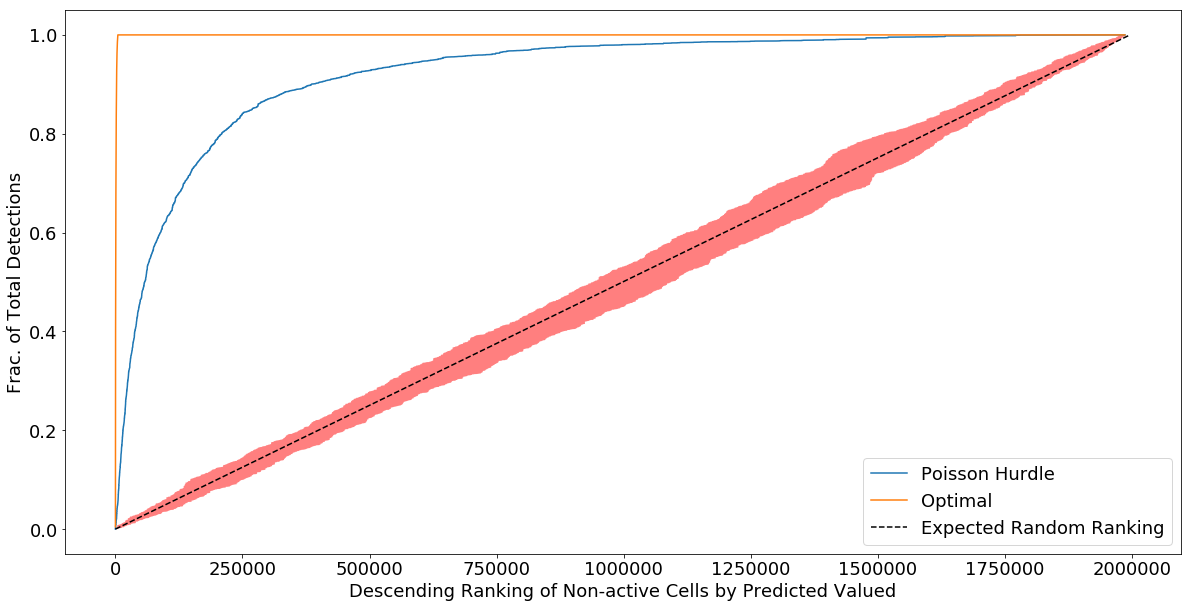

In [1036]:
plt.rcParams['figure.figsize'] = [20,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
K = 5

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Poisson Hurdle')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
plt.fill_between(np.arange(mins.size), mins_5, maxs_5, facecolor='red', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Optimal', optimal=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--', label='Expected Random Ranking')


plt.ylabel('Frac. of Total Detections')
plt.xlabel('Descending Ranking of Non-active Cells by Predicted Valued')

plt.legend()

2356 1996500 0.00118006511395
Results (k=1) 2 0.02 0.118006511395
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395
2356 1996500 0.00118006511395
Results (k=1) 1 0.01 0.118006511395


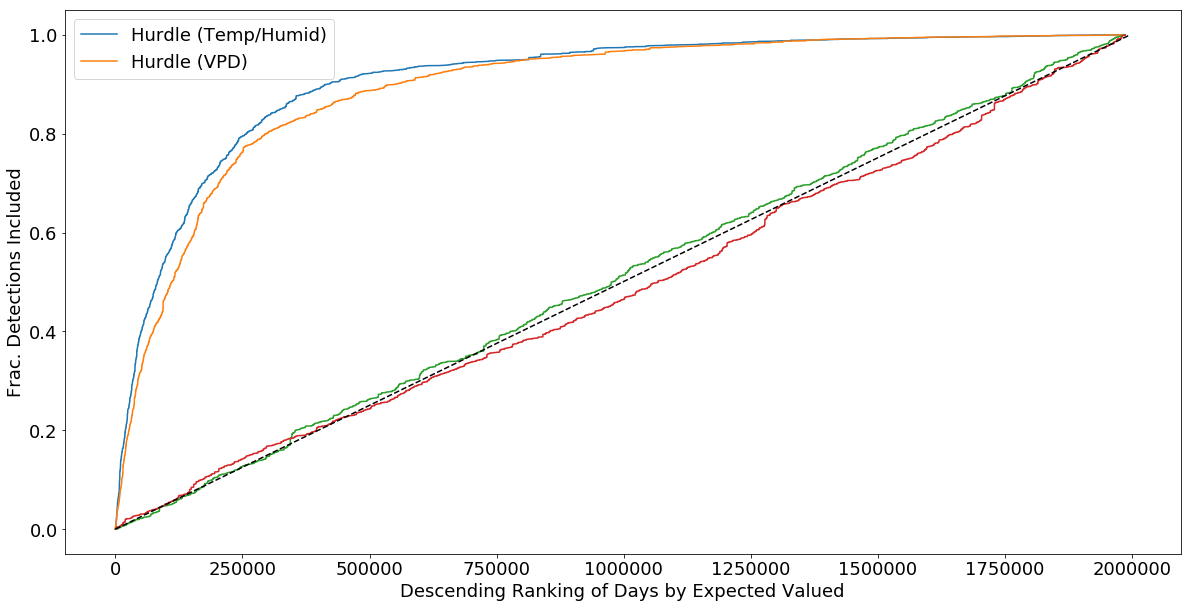

In [621]:
plt.rcParams['figure.figsize'] = [20,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
K = 1

compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Hurdle (VPD)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Optimal', optimal=True)


plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--')


plt.ylabel('Frac. Detections Included')
plt.xlabel('Descending Ranking of Days by Expected Valued')
plt.legend()

In [117]:
def gen_variance_plot(covariate, bins, k, X):
    resp = X[k][0].num_det_target.values.flatten()
    cov = X[k][0][covariate].values.flatten()
    
    print(np.mean(cov), np.std(cov))
    
    #cov = (cov - np.min(cov))/(np.max(cov)-np.min(cov))
    #cov = (cov - np.mean(cov))/np.std(cov)
    
    
    qs = np.linspace(0, 1, bins+1)
    edges = scipy.stats.mstats.mquantiles(cov, qs)
    #edges = np.linspace(np.min(cov), np.max(cov), bins)
    start_edges = edges[:-1]
    end_edges = edges[1:]
    
    
    vals = []
    for s,e in zip(start_edges,end_edges):
        cov_bin = (cov >= s) & (cov < e)
        vals.append(np.std(resp[cov_bin]))
        
    plt.plot((start_edges+end_edges)/2,vals, '--.', label=covariate)

0.316328094739 0.294740781169
283.748 4.70021
78.4111 14.2598


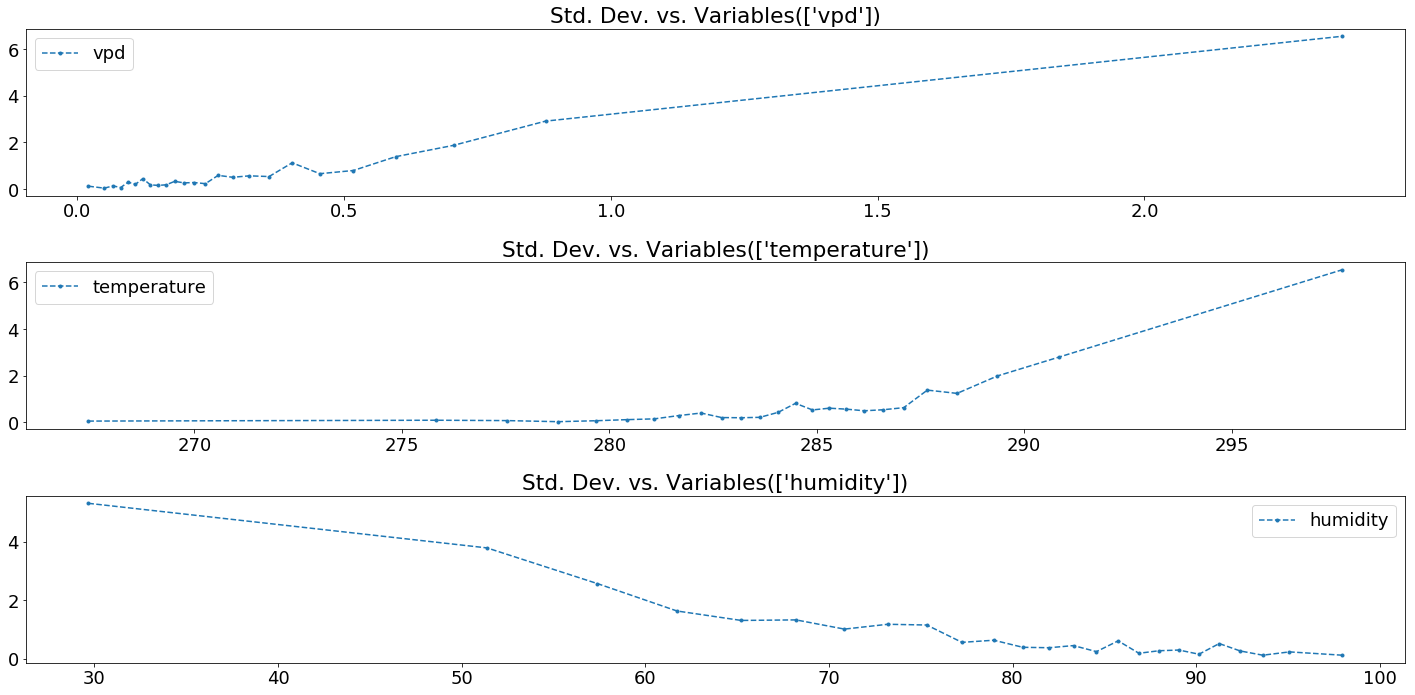

In [118]:
plt.rcParams['figure.figsize'] = [20,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

fig = plt.figure()

ax = fig.add_subplot(3,1,1)
covs = ['vpd'] 
gen_variance_plot(covs[0], 25, 1, X_grid_dict_nw)
plt.title('Std. Dev. vs. Variables(%s)' % (str(covs)))
plt.legend()

ax = fig.add_subplot(3,1,2)
covs = ['temperature'] 
gen_variance_plot(covs[0], 25, 1, X_grid_dict_nw)
plt.title('Std. Dev. vs. Variables(%s)' % (str(covs)))
plt.legend()

ax = fig.add_subplot(3,1,3)
covs = ['humidity'] 
gen_variance_plot(covs[0], 25, 1, X_grid_dict_nw)
plt.title('Std. Dev. vs. Variables(%s)' % (str(covs)))
plt.legend()
plt.tight_layout()

In [304]:
import scipy
a = [1,2,3,4,5,6,7,8,9,10]
np.array(a)[slice(-1)]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [448]:
def gen_2dvariance_plot(covariates, bins, k, X, sigma=1, alpha=.5, size=3, filter=None, style='pcolormesh'):
    det = X[k][0].num_det.values.flatten()
    
    cov1 = X[k][0][covariates[0]].values.flatten()
    cov2 = X[k][0][covariates[1]].values.flatten()
    resp = X[k][0].num_det_target.values.flatten()
    
    if filter=='ign':
        filter = det==0
        
    elif filter=='active':
        filter = det!=0
        
     
    if filter is not None:
        cov1 = cov1[filter]
        cov2 = cov2[filter]
        resp = resp[filter]
        
    
    print(np.mean(cov1), np.std(cov1))
    print(np.mean(cov2), np.std(cov2))
    
    #cov = (cov - np.min(cov))/(np.max(cov)-np.min(cov))
    #cov1 = (cov1 - np.mean(cov1))/np.std(cov1)
    #cov2 = (cov2 - np.mean(cov2))/np.std(cov2)
    
    
    #edges1 = np.linspace(np.min(cov1), np.max(cov1), bins+1)
    qs = np.linspace(0, 1, bins+1)
    edges1 = scipy.stats.mstats.mquantiles(cov1, qs)
    start_edges1 = edges1[:-1]
    end_edges1 = edges1[1:]
    
    #edges2 = np.linspace(np.min(cov2), np.max(cov2), bins+1)
    edges2 = scipy.stats.mstats.mquantiles(cov2, qs)
    start_edges2 = edges2[:-1]
    end_edges2 = edges2[1:]
    
    print(edges1)
    
    vals = np.zeros((bins,bins))
    num_account = np.zeros((bins,bins))
    for i,(s1,e1) in enumerate(zip(start_edges1,end_edges1)):
        for j,(s2,e2) in enumerate(zip(start_edges2,end_edges2)):
            cov_bin1 = (cov1 > s1) & (cov1 <= e1)
            cov_bin2 = (cov2 > s2) & (cov2 <= e2)
            
            sel = resp[cov_bin1 & cov_bin2]
            if len(sel) > 0:
                vals[i,j] = np.std(sel)
                num_account[i,j] = np.sum(cov_bin1 & cov_bin2)
            else:
                vals[i,j] = np.nan
        
    
    
    vals_orig = vals
    
    vals = correlate2d(vals.copy(), num_account.copy(), alpha=alpha, size=size)
            
    if sigma>0:
        rep = vals.copy()
        one = np.ones_like(vals)

        rep[np.isnan(vals)] = 0
        one[np.isnan(vals)] = 0

        v2_rep = scipy.ndimage.filters.gaussian_filter(rep, sigma=sigma)
        v2_one = scipy.ndimage.filters.gaussian_filter(one, sigma=sigma)
        v2=v2_rep/v2_one
        
        vals_orig = vals
        vals = v2
    
    if style=='contour':
        plt.contourf(vals)
    else:
        plt.pcolormesh(vals)

    #plt.pcolormesh((start_edges2+end_edges2)/2, (start_edges1+end_edges1)/2, vals)
    
    plt.ylabel(covariates[0])
    plt.xlabel(covariates[1])
    
    
    locs, labels = plt.xticks()
    plt.xticks(locs, np.round(np.array(edges2)[list(map(int,locs))],2))
    
    locs, labels = plt.yticks()
    plt.yticks(locs, np.round(np.array(edges1)[list(map(int,locs))],2))
    
    plt.colorbar()
    
    print(np.nanmean(vals_orig))
    print(np.nansum(vals_orig))
    print(np.nanmean( (vals_orig*num_account)/np.sum(num_account) ))
    print(np.nansum( (vals_orig*num_account)/np.sum(num_account) ))
    
    
    return vals,vals_orig,num_account

In [431]:
np.nansum([np.nan])

0.0

In [473]:
def correlate2d(x, y, size=5, alpha=.5):
    if alpha==1:
        return x
    
    half = size//2
    add = half*2
    new = np.zeros((x.shape[0]+add, x.shape[1]+add))  
    new[half:-half,half:-half] = x
      
    new2 = np.zeros((y.shape[0]+add, y.shape[1]+add))    
    new2[half:-half,half:-half] = y
    
    new3 = np.zeros((x.shape[0], x.shape[1]))
    
    for i in range(half, x.shape[0]+half):
        for j in range(half, x.shape[1]+half):
            kernel = new2[i-half:i+half+1,j-half:j+half+1]
            kernel /= np.sum(kernel)
            kernel *= (1-alpha)
            kernel[half,half] += alpha

            #print(kernel)
            
            values = new[i-half:i+half+1,j-half:j+half+1]
            
            new3[i-half,j-half] = np.nansum(kernel*values)
            
            """
            print(values)
            print(kernel)
            print(kernel*values)
            print(new3[i-half,j-half])
            """
            


    return new3

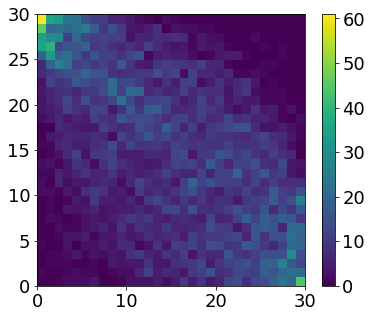

In [462]:
plt.rcParams['figure.figsize'] = [6,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
l = v[1]
plt.pcolormesh(v[2])
plt.colorbar()


288.544 3.88902
66.4483 16.446
[ 272.20654297  281.1488151   282.57758057  283.50422913  284.32934489
  284.91163228  285.47349243  285.91927083  286.33288493  286.68086914
  286.98793335  287.3147286   287.68619385  288.01286682  288.30891276
  288.63441467  288.91403605  289.22246338  289.50685791  289.78686951
  290.1517924   290.48237549  290.83529378  291.28115092  291.72051758
  292.31921285  292.9348645   293.62762878  294.44441121  295.49415771
  303.3296814 ]
6.93467431344
6241.20688209
0.0108711017328
9.78399155952


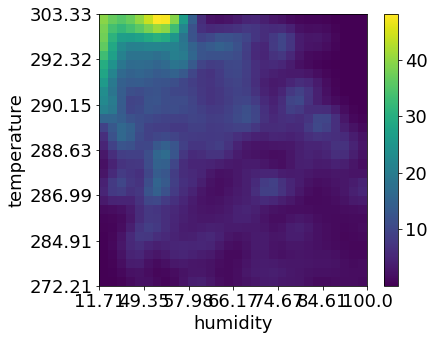

In [471]:
covs = ['temperature', 'humidity']
v = gen_2dvariance_plot(covs, 30, 5, X_grid_dict_nw, sigma=1, alpha=.5, size=3, filter='active')

0.649064772847 0.431395560886
0.00262658 0.00328627
[ 0.          0.07485107  0.11146748  0.15018156  0.18792793  0.22466105
  0.26174225  0.29884863  0.33302357  0.36573275  0.39918844  0.4335305
  0.46819512  0.49880517  0.5390569   0.57385233  0.61175315  0.6496712
  0.69523545  0.73387014  0.77570961  0.82155345  0.8707285   0.92372523
  0.98738238  1.06810358  1.16337872  1.25911856  1.39347656  1.57506329
  3.71599823]
[  0.   5.  10.  15.  20.  25.  30.]
7.17633313536
5281.78118762
0.0113497902251
8.35344560567


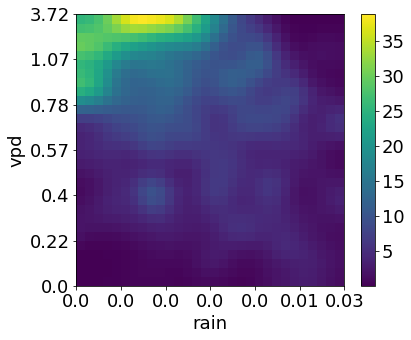

In [409]:
covs = ['vpd', 'rain']
vals = gen_2dvariance_plot(covs, 30, 5, X_grid_dict_nw, sigma=1.5, filter='active')

0.649064772847 0.431395560886
13.1549831081 22.8412200849
[ 0.          0.07485107  0.11146748  0.15018156  0.18792793  0.22466105
  0.26174225  0.29884863  0.33302357  0.36573275  0.39918844  0.4335305
  0.46819512  0.49880517  0.5390569   0.57385233  0.61175315  0.6496712
  0.69523545  0.73387014  0.77570961  0.82155345  0.8707285   0.92372523
  0.98738238  1.06810358  1.16337872  1.25911856  1.39347656  1.57506329
  3.71599823]
[  0.   5.  10.  15.  20.  25.  30.]
10.2117138631
5769.61833268
0.0194527558041
10.9908070293


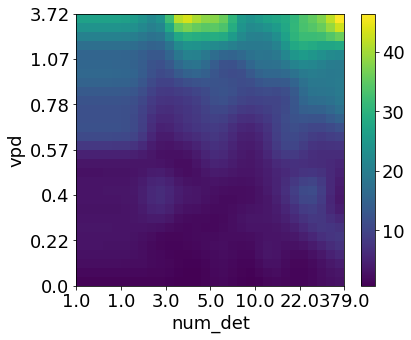

In [402]:
covs = ['vpd', 'num_det']
vals = gen_2dvariance_plot(covs, 30, 5, X_grid_dict_nw, sigma=1.5, style='p', filter='active')

0.312193850356 0.292105330887
0.312193850356 0.292105330887
[ 0.          0.0377513   0.05386905  0.0668266   0.07872792  0.0901584
  0.10144087  0.11274336  0.12415409  0.13569431  0.14758239  0.15983949
  0.17253009  0.18601913  0.20046911  0.21601728  0.23297307  0.25169116
  0.27245422  0.29549297  0.32184459  0.35182656  0.38629118  0.42654813
  0.47359363  0.52929686  0.59848677  0.68770142  0.8156522   1.0333446
  3.75471628]
[  0.   5.  10.  15.  20.  25.  30.]
0.801142958247
24.0342887474
0.0267091885131
0.801275655394


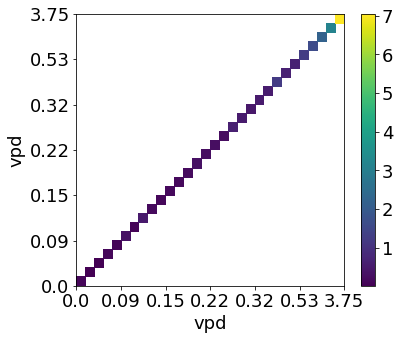

In [404]:
covs = ['vpd', 'vpd']
vals = gen_2dvariance_plot(covs, 30, 5, X_grid_dict_nw, sigma=0)

In [101]:
x = X_grid_dict_nw[1][0]
sel = x.vpd.values > .6986

print(np.sum(sel)/x.vpd.size)
print(np.std(x.num_det_target.values[sel]))

0.100007513148
4.63584478638


In [17]:
start_edges1

array([ 2.        ,  2.11111111,  2.22222222,  2.33333333,  2.44444444,
        2.55555556,  2.66666667,  2.77777778,  2.88888889])

In [18]:
end_edges1

array([ 2.11111111,  2.22222222,  2.33333333,  2.44444444,  2.55555556,
        2.66666667,  2.77777778,  2.88888889,  3.        ])

In [598]:
%%capture
import pickle 
with open(os.path.join(EXP_DIR, '73920234554021873895932012643388812579.pkl'), 'rb') as fin:
    hurdle_temp_humid_joint = pickle.load(fin)

with open(os.path.join(EXP_DIR, '249031565424733323051317021132865640022.pkl'), 'rb') as fin:
    hurdle_vpd_joint = pickle.load(fin)

In [612]:
%%capture
with open(os.path.join(EXP_DIR, '99199629375935083756919647843649637259.pkl'), 'rb') as fin:
    hurdle_vpd_humid_joint = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '202242408807199690015119518513613514504.pkl'), 'rb') as fin:
    hurdle_vpd_temp_joint = pickle.load(fin)

In [653]:
%%capture
with open(os.path.join(EXP_DIR, '141658511813971553517430340544293764918.pkl'), 'rb') as fin:
    hurdle_temp_joint = pickle.load(fin)

In [600]:
%%capture
with open(os.path.join(EXP_DIR, '24752965844747318972370379864678411110.pkl'), 'rb') as fin:
    hurdle_vpd_sep = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '32368145798709589606362372567802232399.pkl'), 'rb') as fin:
    hurdle_vpd_ign_temp_sep = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '88176551325708799692585895819456285978.pkl'), 'rb') as fin:
    hurdle_vpd_ign_vpd_humid_sep = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '229827779037095188047093280212236394162.pkl'), 'rb') as fin:
    hurdle_vpd_ign_vpd_temp_sep = pickle.load(fin)

with open(os.path.join(EXP_DIR, '278766283812676965390278509951586063027.pkl'), 'rb') as fin:
    hurdle_vpd_ign_temp_humid_sep = pickle.load(fin)
    

    


In [919]:
%%capture
with open(os.path.join(EXP_DIR, '292626240431304806072274761549181626240.pkl'), 'rb') as fin:
    hurdle_vpd_ign_vpd_temp_humid_sep = pickle.load(fin)
with open(os.path.join(EXP_DIR, '159144441993860444060460628914670709899.pkl'), 'rb') as fin:
    hurdle_vpd_ign_humid_sep = pickle.load(fin)
    

In [921]:
%%capture
with open(os.path.join(EXP_DIR, '163094145665917423442306507546973864858.pkl'), 'rb') as fin:
    hurdle_log_of_vpd_in_sample = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '253039008353279344806168013110936752175.pkl'), 'rb') as fin:
    hurdle_log_of_humid_in_sample = pickle.load(fin)

In [661]:
%%capture
with open(os.path.join(EXP_DIR, '199295943805259471031036704433219420276.pkl'), 'rb') as fin:
    hurdle_vpd_active_in_sample = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '53983491513461522208861265441714424610.pkl'), 'rb') as fin:
    hurdle_vpd_ign_mean_in_sample = pickle.load(fin)
    
with open(os.path.join(EXP_DIR, '80866395956835971578386426891622283843.pkl'), 'rb') as fin:
    log_normal_vpd_active_in_sample = pickle.load(fin)
    
    


In [658]:
%%capture
with open(os.path.join(EXP_DIR, '193544293422613424720830950326070544299.pkl'), 'rb') as fin:
    hurdle_vpd_ign_log_temp_humid_sep = pickle.load(fin)

In [967]:
%%capture
with open(os.path.join(EXP_DIR, '28577650431019850708752933514009324591.pkl'), 'rb') as fin:
    hurdle_nb1_hurdle_2_temp_humid = pickle.load(fin)

In [969]:
%%capture
with open(os.path.join(EXP_DIR, '149041171275557375815694117492225677785.pkl'), 'rb') as fin:
    hurdle_nb1_hurdle_2_log_vpd = pickle.load(fin)

In [886]:
%%capture
with open(os.path.join(EXP_DIR, '431887704974957306799892630814413444.pkl'), 'rb') as fin:
    hurdle_vpd_ign_log_vpd_sep = pickle.load(fin)

In [916]:
hurdle_log_of_vpd_in_sample['summary_results']['test']['root_mean_squared_error'] = hurdle_vpd_ign_vpd_temp_sep['summary_results']['test']['root_mean_squared_error']

In [922]:
hurdle_log_of_humid_in_sample['summary_results']['test']['root_mean_squared_error'] = hurdle_vpd_ign_vpd_temp_sep['summary_results']['test']['root_mean_squared_error']

B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10465399  0.38046887  0.66584328  0.81457149  0.94912941]
[ 0.00049452  0.00353313  0.00896013  0.01224995  0.01575013] Hurdle Sep (VPD)
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10487166  0.38225728  0.67061517  0.82096045  0.95736317]
[ 0.00027685  0.00174472  0.00418823  0.00586098  0.00751637] Log-normal (VPD)
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10473046  0.38126128  0.66805542  0.81714129  0.95166964]
[ 0.00041805  0.00274072  0.00674799  0.00968015  0.0132099 ] Hurdle NB1 Sep (VPD)
B [  2.70473328e-05   6.01051841e-05   1.00676183e-04   1.40245430e-04
   3.43601302e-04]
R [ 0.00247008  0.02445573  0.05902356  0.07203062  0.10082599]
[-0.00244303 -0.02439562 -0.05892289 -0.07189037 -0.10048239] Hurdle Sep (VPD)
B [  2.70473328e-05   6.01051841e-05   1.00676183e-04   1.40245430e-04
   3.43601302e-04]
R [ 0.00016479  0.00092633  0.00217729  0.00304403  

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


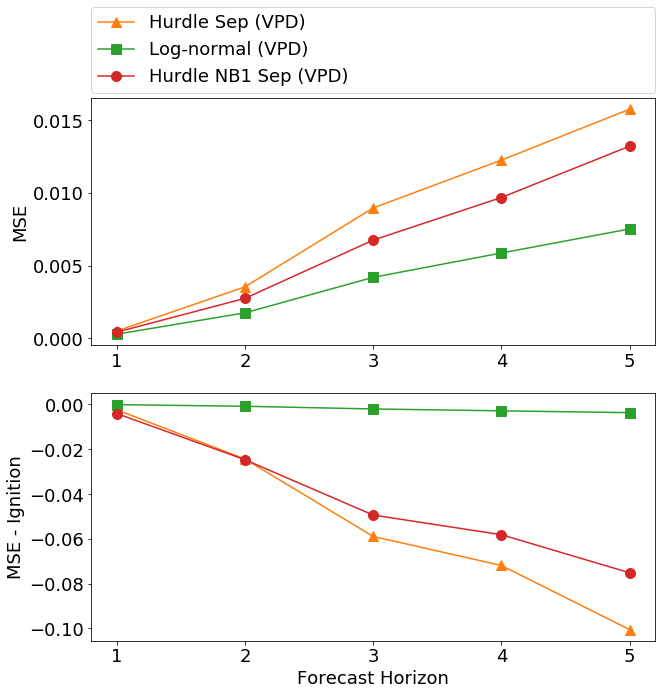

In [980]:
plt.rcParams['figure.figsize'] = [34,10]
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                #'Persistence Aug (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Hurdle (VPD + AR) + Zero-only': hurdle_vpd_active_in_sample['summary_results'],
                #'Hurdle (VPD + AR) + Mean-only': hurdle_vpd_ign_mean_in_sample['summary_results'],
                #'Hurdle Joint (VPD + Humid + AR)': hurdle_vpd_humid_joint['summary_results'],
                #'Hurdle Joint (VPD + AR)': hurdle_vpd_joint['summary_results'],
                #'Hurdle Sep (Temp)': hurdle_vpd_ign_temp_sep['summary_results'],
                #'Hurdle Sep (Humid)': hurdle_vpd_ign_humid_sep['summary_results'],
    
                #'Hurdle Joint (Temp + Humid + AR)': hurdle_temp_humid_joint['summary_results'],
                #'Hurdle Joint (VPD + Temp + AR)': hurdle_vpd_temp_joint['summary_results'],
                #'Hurdle Joint (Temp + AR)': hurdle_temp_joint['summary_results'],
                'Hurdle Sep (VPD)': hurdle_vpd_sep['summary_results'],
                #'Hurdle Sep (VPD + Humid)': hurdle_vpd_ign_vpd_humid_sep['summary_results'],
                #'Hurdle Sep (VPD + Temp)': hurdle_vpd_ign_vpd_temp_sep['summary_results'],
                #'Log-normal (Temp + Humid)': hurdle_vpd_ign_log_temp_humid_sep['summary_results'],
                'Log-normal (VPD)': hurdle_vpd_ign_log_vpd_sep['summary_results'],
                #'Log-normal (VPD + AR) + Zero-only': log_normal_vpd_active_in_sample['summary_results'],
                #'Hurdle Sep (Log(VPD))': hurdle_log_of_vpd_in_sample['summary_results'],
                #'Hurdle Sep (Log(Humid))': hurdle_log_of_humid_in_sample['summary_results'],
                #'Hurdle Sep (Temp + Humid)': hurdle_vpd_ign_temp_humid_sep['summary_results'], 
                #'Hurdle NB2 Sep': hurdle_nb_hurdle_2['summary_results'], 
                #'Hurdle NB2 Sep 1': hurdle_nb_1hurdle_2['summary_results'],
                'Hurdle NB1 Sep (VPD)': hurdle_nb1_hurdle_2['summary_results'],
                #'Hurdle NB1 Sep (Temp + Humid)': hurdle_nb1_hurdle_2_temp_humid['summary_results'],
                #'Hurdle NB1 Sep (log(VPD))': hurdle_nb1_hurdle_2_log_vpd['summary_results'],
    
                #'Log-normal (VPD)': hurdle_vpd_ign_log_vpd_sep['summary_results'],
                #'Hurdle Sep (VPD + Temp + Humid)': hurdle_vpd_ign_temp_humid_sep['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
}
measurements = [#('','root_mean_squared_error', False, True),
                #('','root_mean_squared_error_active', False, False),
                #('','root_mean_squared_error_ignition', False, True),
                ('','root_mean_squared_error_ignition_target', False, True),
                ('','root_mean_squared_error_zero_zero_target', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Hurdle (VPD + AR) + Zero-only', scale=True,
                     rescale=None,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition', 'MSE - Que'], col_len=1, skill_score=False,
                     legend_func=legend_func)

B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10445734  0.37958978  0.66389875  0.81116656  0.94490423]
[ 0.00069117  0.00441223  0.01090465  0.01565488  0.0199753 ] Hurdle Sep (Temp)
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10457422  0.38071911  0.66679514  0.81531761  0.95038765]
[ 0.00057429  0.00328289  0.00800827  0.01150382  0.01449189] Log-normal (Temp + Humid)
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10487166  0.38225728  0.67061517  0.82096045  0.95736317]
[ 0.00027685  0.00174472  0.00418823  0.00586098  0.00751637] Log-normal (VPD)
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10470944  0.38099443  0.66756174  0.81666224  0.95172707]
[ 0.00043907  0.00300757  0.00724167  0.0101592   0.01315247] Hurdle Sep (Log(VPD))
B [ 0.10514851  0.384002    0.67480341  0.82682144  0.96487954]
R [ 0.10449366  0.37962881  0.66393656  0.81141467  0.94513492]
[ 0.00065485  0.00437319  0.0

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


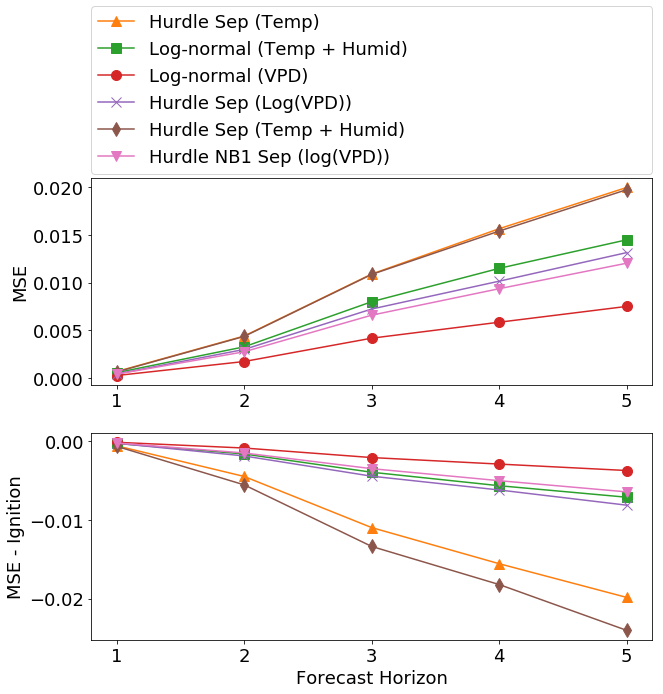

In [983]:
plt.rcParams['figure.figsize'] = [34,10]
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

results_dict = {#'Persistence': persistence['summary_results'],
                #'Persistence Aug (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Hurdle (VPD + AR) + Zero-only': hurdle_vpd_active_in_sample['summary_results'],
                #'Hurdle (VPD + AR) + Mean-only': hurdle_vpd_ign_mean_in_sample['summary_results'],
                #'Hurdle Joint (VPD + Humid + AR)': hurdle_vpd_humid_joint['summary_results'],
                #'Hurdle Joint (VPD + AR)': hurdle_vpd_joint['summary_results'],
                'Hurdle Sep (Temp)': hurdle_vpd_ign_temp_sep['summary_results'],
                #'Hurdle Sep (Humid)': hurdle_vpd_ign_humid_sep['summary_results'],
    
                #'Hurdle Joint (Temp + Humid + AR)': hurdle_temp_humid_joint['summary_results'],
                #'Hurdle Joint (VPD + Temp + AR)': hurdle_vpd_temp_joint['summary_results'],
                #'Hurdle Joint (Temp + AR)': hurdle_temp_joint['summary_results'],
                #'Hurdle Sep (VPD)': hurdle_vpd_sep['summary_results'],
                #'Hurdle Sep (VPD + Humid)': hurdle_vpd_ign_vpd_humid_sep['summary_results'],
                #'Hurdle Sep (VPD + Temp)': hurdle_vpd_ign_vpd_temp_sep['summary_results'],
                'Log-normal (Temp + Humid)': hurdle_vpd_ign_log_temp_humid_sep['summary_results'],
                'Log-normal (VPD)': hurdle_vpd_ign_log_vpd_sep['summary_results'],
                #'Log-normal (VPD + AR) + Zero-only': log_normal_vpd_active_in_sample['summary_results'],
                'Hurdle Sep (Log(VPD))': hurdle_log_of_vpd_in_sample['summary_results'],
                #'Hurdle Sep (Log(Humid))': hurdle_log_of_humid_in_sample['summary_results'],
                'Hurdle Sep (Temp + Humid)': hurdle_vpd_ign_temp_humid_sep['summary_results'], 
                #'Hurdle NB2 Sep': hurdle_nb_hurdle_2['summary_results'], 
                #'Hurdle NB2 Sep 1': hurdle_nb_1hurdle_2['summary_results'],
                #'Hurdle NB1 Sep (VPD)': hurdle_nb1_hurdle_2['summary_results'],
                #'Hurdle NB1 Sep (Temp + Humid)': hurdle_nb1_hurdle_2_temp_humid['summary_results'],
                'Hurdle NB1 Sep (log(VPD))': hurdle_nb1_hurdle_2_log_vpd['summary_results'],
    
                #'Log-normal (VPD)': hurdle_vpd_ign_log_vpd_sep['summary_results'],
                #'Hurdle Sep (VPD + Temp + Humid)': hurdle_vpd_ign_temp_humid_sep['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
}
measurements = [#('','root_mean_squared_error', False, True),
                #('','root_mean_squared_error_active', False, False),
                #('','root_mean_squared_error_ignition', False, True),
                ('','root_mean_squared_error_ignition_target', False, True),
                ('','root_mean_squared_error_zero_zero_target', False, True),
               ]

alpha = 0.0049727
legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=1, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Hurdle (VPD + AR) + Zero-only', scale=True,
                     rescale=None,
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['MSE', 'MSE - Ignition', 'MSE - Que'], col_len=1, skill_score=False,
                     legend_func=legend_func)

In [972]:
log_normal_vpd_active_in_sample['params']

{'model_structure': 'grid',
 'separated_ignitions': 'active_only',
 'active_model_type': 'log_normal',
 'ignition_model_type': 'hurdle_p',
 'covariates': ('vpd',),
 'ignition_covariates_exclude': ('num_det',),
 'active_covariates_exclude': (),
 'memory_type': 'none',
 'memory_covariates': ('vpd',),
 'memory_log_covariates': ('num_det',),
 'memory_length': 10,
 'decay_method': 'fixed',
 'decay_values': <FrozenOrderedDict OrderedDict([('default', 0.5), ('num_det', 0.25), ('temperature', 0.25), ('humidity', 0.5), ('rain', 0.25)])>,
 'forecast_method': 'separate',
 'active_check_days': 2,
 'regularization_weight': None,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'fill_method': 'interpolate',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': 5,
 'exposure': False,
 'normalize_params': False,
 'filter_mask': None,
 'large_fire_split_percent': 0.9}

In [619]:
hurdle_vpd_ign_temp_sep['summary_results']

defaultdict(dict,
            {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3960972658983668,
                1.2698613340371581,
                1.3731846254909501,
                1.4277744530704279,
                1.4442711604872793,
                1.4653947564060188]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.068464726439425763,
                0.05305822191829887,
                0.065000811068788439,
                0.071726323431291802,
                0.074829110032058763,
                0.077709165746690914])},
             'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3960972658983668,
                1.2698613340371581,
                1.3731846254909501,
                1.4277744530704279,
                1.4442711604872793,
                1.4653947564060188]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.068464726439425763,
 

In [620]:
hurdle_vpd_ign_temp_humid_sep['summary_results']

defaultdict(dict,
            {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3968567948906101,
                1.2699008967051586,
                1.3735867234598733,
                1.4286246553797755,
                1.4452716298426469,
                1.466900069065596]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.068731853608077584,
                0.053081810814518231,
                0.065227422364690604,
                0.072057474845348315,
                0.075135618182504041,
                0.078156941833326762])},
             'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
               [1.3968567948906101,
                1.2699008967051586,
                1.3735867234598733,
                1.4286246553797755,
                1.4452716298426469,
                1.466900069065596]),
              'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
               [0.068731853608077584,
  

In [672]:
def comp_vpd(temp,humid):
    es = 0.6108 * np.exp(17.27 * temp / (temp + 237.3))
    ea = humid / 100 * es 
    return es - ea

In [677]:
comp_vpd(21, 0)

2.4870053972720654

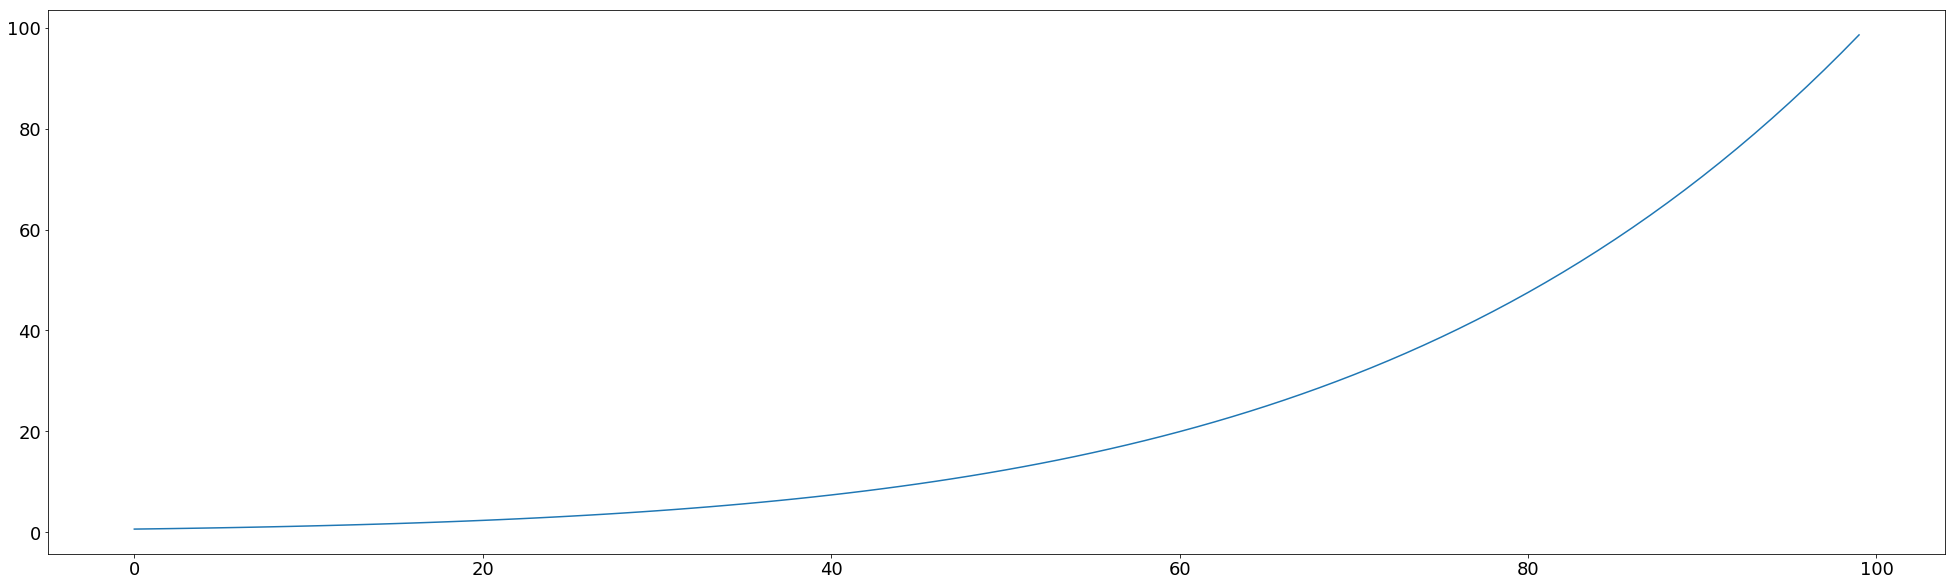

In [684]:
plt.plot([comp_vpd(x,0) for x in range(0,100)])

In [708]:
log_pred_dict = {k: hurdle_vpd_ign_log_temp_humid_sep['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [741]:
hurdle_temp_humid_pred_dict = {k: hurdle_vpd_ign_temp_humid_sep['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [709]:
log_pred_dict[1][0,0,0]

1.1482755716495486e-06

In [747]:
hurdle_temp_humid_pred_dict[1][0,0,0]

5.3456039991234812e-06

In [893]:
hurdle_vpd_ign_log_vpd_sep['models'][0][0].igm.model.fit_result.params

Intercept   -5.359729
vpd          1.468123
dtype: float64

In [895]:
hurdle_vpd_sep['models'][0][0].igm.model.fit_result_positive.params

Intercept    0.813295
vpd          0.593899
dtype: float64

In [896]:
hurdle_vpd_sep['models'][0][0].igm.model.fit_result_inflated.params

Intercept    7.870630
vpd         -2.291301
dtype: float64

In [882]:
X_grid_dict_nw[1][0].humidity[0,0,0]

<xarray.DataArray 'humidity' ()>
array(85.84783935546875, dtype=float32)
Coordinates:
    time     datetime64[ns] 2007-05-14

In [878]:
hurdle_vpd_ign_log_temp_humid_sep['models'][0][0].igm.model.fit_result.params

Intercept     -123.764305
temperature      0.403821
humidity         0.037284
dtype: float64

In [879]:
hurdle_vpd_ign_temp_humid_sep['models'][0][0].igm.model.fit_result_positive.params

Intercept     -26.682233
temperature     0.096507
humidity       -0.000933
dtype: float64

In [781]:
hurdle_vpd_ign_temp_humid_sep['models'][1][0].igm.model.fit_result_inflated.params

Intercept      82.975825
temperature    -0.271892
humidity        0.021423
dtype: float64

In [905]:
np.mean(X_grid_dict_nw[1][0].vpd)
np.max(X_grid_dict_nw[1][0].vpd)

<xarray.DataArray 'vpd' ()>
array(3.7547162791649713)

In [907]:
v = 0.3163280947389652
v1 = 0
v2 = 3.7547162791649713
a = np.exp(-5.359729 + v*1.468123)
a1 = np.exp(-5.359729 + v1*1.468123)
a2 = np.exp(-5.359729 + v2*1.468123)
print(a1,a,a2)

0.00470218022577 0.00748151140012 1.16492455809


In [910]:

a = np.exp(0.8132953 + v1*0.593899) + 1
b = scipy.special.expit(7.870630 -2.291301*v1)
print(a,b,a*(1-b))

a = np.exp(0.8132953 + v*0.593899) + 1
b = scipy.special.expit(7.870630 -2.291301*v)
print(a,b,a*(1-b))

a = np.exp(0.8132953 + v2*0.593899) + 1
b = scipy.special.expit(7.870630 -2.291301*v2)
print(a,b,a*(1-b))

3.2553277363 0.999618351954 0.00124238946805
3.72144295863 0.999212474617 0.00293073079002
21.972615092 0.324634264649 14.8395513492


In [789]:
X_grid_dict_nw[1][0].num_det_target.values[ign][1097680]

0.0

In [763]:
X_grid_dict_nw[1][0].temperature.values[ign][1097680]

303.13757

In [764]:
X_grid_dict_nw[1][0].humidity.values[ign][1097680]

12.961391

In [843]:
#ign = (X_grid_dict_nw[1][0].num_det == 0) & (X_grid_dict_nw[1][0].num_det_1 == 0)
np.argmax(hurdle_temp_humid_pred_dict[1])

1046795

In [728]:
X_grid_dict_nw[1][0].temperature[0,0,0]

<xarray.DataArray 'temperature' ()>
array(264.6871337890625, dtype=float32)
Coordinates:
    time     datetime64[ns] 2007-05-14

In [729]:
X_grid_dict_nw[1][0].humidity[0,0,0]

<xarray.DataArray 'humidity' ()>
array(85.84783935546875, dtype=float32)
Coordinates:
    time     datetime64[ns] 2007-05-14

In [800]:
b = hurdle_vpd_ign_temp_humid_sep['models'][1][0].igm.model.fit_result_inflated.predict({'temperature': [t], 'humidity': [h]})

In [803]:
a = hurdle_vpd_ign_temp_humid_sep['models'][1][0].igm.model.fit_result_positive.predict({'temperature': [t], 'humidity': [h]})
a+=1

In [809]:
print(a,b,a*(1-b))
c = (a*(1-b))[0]

0    28.439584
dtype: float64 0    0.696927
dtype: float64 0    8.619271
dtype: float64


In [826]:
np.argwhere(np.round(hurdle_temp_humid_pred_dict[1],3)==np.round(c,3))

array([[ 17,   6, 254]])

In [817]:
np.argwhere(np.round(hurdle_temp_humid_pred_dict[1].flatten(),3)==np.round(c,3))

array([[1035354]])

In [851]:
ar = np.argmax(hurdle_temp_humid_pred_dict[1])
v = hurdle_temp_humid_pred_dict[1].flatten()[ar]
print(ar,v)

1046795 185.156493365


In [857]:
X_grid_dict_nw[1][0].vpd.values.flatten()[1046795]

3.715998230987795

In [856]:
X_grid_dict_nw[1][0].num_det.values.flatten()[1046795]

379.0

In [858]:
v = 3.715998230987795
n = 379.0

In [875]:
b = hurdle_vpd_ign_temp_humid_sep['models'][0][0].afm.model.fit_result_inflated.predict({'vpd': [v], 'num_det': [n]})

In [876]:
a = hurdle_vpd_ign_temp_humid_sep['models'][0][0].afm.model.fit_result_positive.predict({'vpd': [v], 'num_det': [n]})
a+=1

In [877]:
c = (a*(1-b))[0]
print(c)

185.156493365


In [ ]:

a = np.exp(-23.733623318273253 + t*0.089609693413227998 + h*-0.0091390474354394804) + 1
b = scipy.special.expit(82.97582462097408 - 0.27189236790122612*t + 0.021423159254994165 * h)
print(a,b,a*(1-b))

In [866]:
hurdle_temp_humid_pred_dict[1].flatten()[1046795]

185.15649336501843

In [839]:
np.argwhere(X_grid_dict_nw[1][0].temperature.values==303.13757)

array([[ 18,  15, 695]])

In [841]:
np.argwhere(X_grid_dict_nw[1][0].humidity.values==12.961391)

array([[ 18,  15, 695]])

In [842]:
hurdle_temp_humid_pred_dict[1][ 18,  15, 695]

2.4823549686865536

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = X_grid_dict_nw[1][0].vpd.values
vpd_per_year = np.reshape(vpd, (33,55,10,110))

overall_mean = np.mean(vpd)
yearly_mean = np.mean(vpd_per_year, axis=(0,1,3))

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(range(2007,2016+1), yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Whole Grid)")

In [ ]:
# VPD interior
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = X_grid_dict_nw[1][0].vpd.values
vpd_per_year = np.reshape(vpd, (33,55,10,110))

overall_mean = np.mean(vpd[alaska_interior_mask])
yearly_mean = np.mean(vpd_per_year[alaska_interior_mask], axis=(0,2))

print(overall_mean)

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(range(2007,2016+1), yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Interior)")

In [ ]:
# VPD interior
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = filter_fire_season(X_grid_dict_nw[1][0], start=(6,1)).vpd.values
vpd_per_year = np.reshape(vpd, (33,55,10,-1))

overall_mean = np.mean(vpd[alaska_interior_mask])
yearly_mean = np.mean(vpd_per_year[alaska_interior_mask], axis=(0,2))

print(overall_mean)

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(range(2007,2016+1), yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Interior, Start June)")

In [ ]:
# VPD interior 2
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = filter_fire_season(X_grid_dict_nw[1][0], start=(6,1)).vpd.values
vpd_per_year = np.reshape(vpd, (33,55,10,-1))

overall_mean = np.mean(vpd[alaska_interior_mask_2])
yearly_mean = np.mean(vpd_per_year[alaska_interior_mask_2], axis=(0,2))

print(overall_mean)

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(range(2007,2016+1), yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Interior Two, Start June)")

In [ ]:
ALASKA_BB = get_default_bounding_box()
FAIRBANKS_LAT, FAIRBANKS_LON = 64.835365, -147.776749

# VPD fairbanks
# VPD interior
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)


# VPD all
vpd = X_grid_dict_nw[1][0].vpd.values
vpd_per_year = np.reshape(vpd, (33,55,10,110))

fairbanks_lat_ind, fairbanks_lon_ind = ALASKA_BB.latlon_to_indices(FAIRBANKS_LAT, FAIRBANKS_LON, vpd.shape[0])

overall_mean = np.mean(vpd[fairbanks_lat_ind, fairbanks_lon_ind])
print(vpd.shape, vpd_per_year.shape)
yearly_mean = np.mean(vpd_per_year[fairbanks_lat_ind, fairbanks_lon_ind], axis=(1))

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(range(2007,2016+1), yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Fairbanks)")

In [ ]:
ALASKA_BB = get_default_bounding_box()
FAIRBANKS_LAT, FAIRBANKS_LON = 64.835365, -147.776749

# VPD fairbanks
# VPD interior
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).vpd.values
vpd_per_year = np.reshape(vpd, (33,55,1,110))

fairbanks_lat_ind, fairbanks_lon_ind = ALASKA_BB.latlon_to_indices(FAIRBANKS_LAT, FAIRBANKS_LON, vpd.shape[0])

fairbanks_lat_ind += 1
fairbanks_lon_ind += 1

overall_mean = np.mean(vpd[fairbanks_lat_ind, fairbanks_lon_ind])
print(vpd.shape, vpd_per_year.shape)
yearly_mean = np.mean(vpd_per_year[fairbanks_lat_ind, fairbanks_lon_ind], axis=(0))

months, days = filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).time.dt.month, filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]

#_ = plt.xticks(ticks_pos, date_strings[start_ind:end_ind:5])

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(yearly_mean)
plt.ylabel("VPD (kPa)")
plt.xlabel("Year")
plt.title("Alaska Precip (Fairbanks)")

_ = plt.xticks(range(0,len(date_strings)+1)[::11], date_strings[::11])

In [ ]:
ALASKA_BB = get_default_bounding_box()
FAIRBANKS_LAT, FAIRBANKS_LON = 64.81, -147.86


# VPD fairbanks
# VPD interior
plt.rcParams['figure.figsize'] = [10,5]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# VPD all
vpd = filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).rain.values * MM_TO_M
vpd_per_year = np.reshape(vpd, (33,55,1,110))

fairbanks_lat_ind, fairbanks_lon_ind = ALASKA_BB.latlon_to_indices(FAIRBANKS_LAT, FAIRBANKS_LON, vpd.shape[0])


fairbanks_lat_ind += 1
fairbanks_lon_ind += 1

overall_mean = np.mean(vpd[fairbanks_lat_ind, fairbanks_lon_ind])
print(vpd.shape, vpd_per_year.shape)
yearly_mean = np.mean(vpd_per_year[fairbanks_lat_ind, fairbanks_lon_ind], axis=(0))

months, days = filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).time.dt.month, filter_fire_season(X_grid_dict_nw[1][0], years=(2013,)).time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]

#_ = plt.xticks(ticks_pos, date_strings[start_ind:end_ind:5])

plt.axhline(y=overall_mean, color='black', linestyle='--', label='Mean')
plt.plot(yearly_mean)
plt.ylabel("Precip. (mm/day)")
plt.xlabel("Year")
plt.title("Alaska Precip (Fairbanks)")

_ = plt.xticks(range(0,len(date_strings)+1)[::11], date_strings[::11])